---

# FAST FOOD NUTRITION ANALYSIS

---

# INTRODUCTION 


Fast food is cheap, convenient, and delicious but is it silently eating away at our health? Behind every burger, pizza slice, and chicken strip lies a mix of calories, sodium, sugar, and fat that may push us well beyond **daily recommended nutrition limits**.  

With diet-related diseases like obesity, hypertension, and heart disease on the rise, the challenge isn’t just *knowing* how many calories are in a burger, it’s understanding **how those numbers compare to health guidelines** and **what patterns emerge across restaurants and food categories**.  

This project uses **Exploratory Data Analysis (EDA)** and **Feature Engineering** to generate **actionable nutrition insights** that make dietary data understandable, comparable, and practical for both consumers and policymakers.  

---

# WORKFLOW OVERVIEW 

1. **Data Overview & Cleaning**  
   - Import fast food dataset  
   - Handle missing values, ensure proper data types  

2. **Feature Engineering**  
   - Created **new binary features** for risk thresholds:
     - `high_sodium`, `high_satfat`, `high_sugar`, `high_calories`  
   - Built an **aggregate red-flag feature** (`any_redflag`) to identify risky items at a glance  
   - Created a **traffic-light feature** classifying foods as Safe, Moderate, or High Risk  
   - Added engineered grouping features (e.g., food categories, prep method classifications)  

3. **Univariate & Bivariate Analysis**  
   - Explore distributions of calories, sodium, fat, sugar, fiber  
   - Study nutrient correlations (e.g., calories vs sodium)  

4. **Nutrient Benchmarking vs Guidelines**  
   - Compare nutrient levels to WHO/USDA recommendations  
   - Show how fast food items overshoot/undershoot with barplots & radar charts  

5. **Restaurant-Level Risk Dashboard**  
   - % of items exceeding red-flag nutrient limits per chain  
   - “Leaderboard” of sodium-heavy, calorie-dense brands  

6. **Category-Level Risk Dashboard**  
   - Risks broken down by food type: burgers, pizza, salads, wraps, chicken, etc.  
   - Expose hidden sodium/fat risks in categories marketed as “healthy”  

7. **Traffic-Light Classification**  
   - Consumer-friendly summary of item healthiness  
   - Overall distribution + breakdowns by restaurant and food category  

8. **PCA Nutritional Map (Multivariate View)**  
   - Reduce nutrients into 2D & visualize clusters:  
     - Sodium bombs  
     - Fat bombs  
     - Sugar-heavy foods  
     - Balanced items  

9. **Final Conclusions & Recommendations**  
   - Identify key public health risks (sodium, saturated fat, caloric overload, lack of fiber)  
   - Point out relatively safer fast food choices  
   - Provide actionable advice for consumers (*“Choose grilled, smaller portions, watch dressings”*)  
   - Suggest opportunities for policymakers (*traffic-light labeling, menu reformulation*).  

---

With this pipeline, the analysis moves from **raw data → feature engineering → EDA → actionable health insights.**  
This ensures the project isn’t just descriptive, but **practically useful for shaping healthier choices**.  

---

### DATA IMPORT

---

In [1]:
# I imported essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# I imported the data set

df = pd.read_csv('fastfood.csv')

In [3]:
# I previewed the first five rows of the dataset

df.head()

restaurant                                       item  calories  cal_fat  \
0  Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1  Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2  Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3  Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4  Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   

   total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0          7      2.0        0.0           95    1110          44    3.0   
1         45     17.0        1.5          130    1580          62    2.0   
2         67     27.0        3.0          220    1920          63    3.0   
3         31     10.0        0.5          155    1940          62    2.0   
4         45     12.0        0.5          120    1980          81    4.0   

   sugar  protein  vit_a  vit_c  calcium  salad  
0     11     37.0    4.0   20.0     20.0  Other  
1     18     46.0    6.0   20.0     20.0  Other  
2     18     70.0   10.0   20.0     50.0  Other  
3     18     55.0    6.0   25.0     20.0  Other  
4     18     46.0    6.0   20.0     20.0  Other

---

# DATA DICTIONARY

---

| Column       | Description                                                                 |
|--------------|-----------------------------------------------------------------------------|
| `restaurant` | Name of the restaurant (e.g., McDonald's, Taco Bell, etc.)                  |
| `item`       | Name of the menu item                                                       |
| `calories`   | Total energy (kcal)                                                         |
| `cal_fat`    | Calories from fat (kcal)                                                    |
| `total_fat`  | Total fat (g)                                                               |
| `sat_fat`    | Saturated fat (g)                                                           |
| `trans_fat`  | Trans fat (g)                                                               |
| `cholesterol`| Cholesterol (mg)                                                            |
| `sodium`     | Sodium (mg)                                                                 |
| `total_carb` | Total carbohydrates (g)                                                     |
| `fiber`      | Dietary fiber (g)                                                           |
| `sugar`      | Total sugar (g)                                                             |
| `protein`    | Protein (g)                                                                 |
| `vit_a`      | Vitamin A (% Daily Value)                                                   |
| `vit_c`      | Vitamin C (% Daily Value)                                                   |
| `calcium`    | Calcium (% Daily Value)                                                     |
| `salad`      | Category label (all marked "Other" in this dataset)                         |

---

## DATA UNDERSTANDING

In [4]:
# I checked the number of rows and columns

df.shape

(515, 17)

---

From the above, the dataset has 515 rows and 17 columns.

---

In [5]:
# I checked column data types and non-null counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


---

From the above; 

- **Total Entries**: 515 food items i.e, each row = 1 menu item.  

- **Columns**: 17 columns describing restaurant name, food item, and nutritional facts.  
  - 3 categorical: `restaurant`, `item`, `salad`  
  - 14 numeric: mix of `int64` and `float64` covering calories, fat, sodium, minerals, etc.

- **Non-Null Counts**: Most columns are complete, but there are some gaps:  
  - `fiber`: missing 12 values (503/515 available)  
  - `protein`: missing 1 value (514/515 available)  
  - `vit_a`, `vit_c`, `calcium`: many missing values (only 300/515 available).  
   
- **Data Types**:  
  - Calories, fat, sodium, carbs, sugars, cholesterol → `int64` (good for numeric operations).  
  - Saturated fat, trans fat, fiber, protein, vitamins, calcium → `float64` (captures decimals).  
  - Restaurant, item name, salad → `object` (textual data).

---

In [6]:
# I checked for summary statistics for numerical features

df.describe()

calories      cal_fat   total_fat     sat_fat   trans_fat  \
count   515.000000   515.000000  515.000000  515.000000  515.000000   
mean    530.912621   238.813592   26.590291    8.153398    0.465049   
std     282.436147   166.407510   18.411876    6.418811    0.839644   
min      20.000000     0.000000    0.000000    0.000000    0.000000   
25%     330.000000   120.000000   14.000000    4.000000    0.000000   
50%     490.000000   210.000000   23.000000    7.000000    0.000000   
75%     690.000000   310.000000   35.000000   11.000000    1.000000   
max    2430.000000  1270.000000  141.000000   47.000000    8.000000   

       cholesterol       sodium  total_carb       fiber       sugar  \
count   515.000000   515.000000  515.000000  503.000000  515.000000   
mean     72.456311  1246.737864   45.664078    4.137177    7.262136   
std      63.160406   689.954278   24.883342    3.037460    6.761301   
min       0.000000    15.000000    0.000000    0.000000    0.000000   
25%      35.000000   800.000000   28.500000    2.000000    3.000000   
50%      60.000000  1110.000000   44.000000    3.000000    6.000000   
75%      95.000000  1550.000000   57.000000    5.000000    9.000000   
max     805.000000  6080.000000  156.000000   17.000000   87.000000   

          protein       vit_a       vit_c     calcium  
count  514.000000  301.000000  305.000000  305.000000  
mean    27.891051   18.857143   20.170492   24.852459  
std     17.683921   31.384330   30.592243   25.522073  
min      1.000000    0.000000    0.000000    0.000000  
25%     16.000000    4.000000    4.000000    8.000000  
50%     24.500000   10.000000   10.000000   20.000000  
75%     36.000000   20.000000   30.000000   30.000000  
max    186.000000  180.000000  400.000000  290.000000

---

### Descriptive Statistics Interpretation  

---

- **Calories**  
  - The average menu item is around 530kcal, which is about one quarter of the daily needs for a typical adult (2000 kcal).  
  - Some individual foods, however, reach over 2000 kcal that’s essentially a full day’s worth of energy in just one item.  
  - From a nutrition standpoint, portions at this level make it difficult to manage weight and energy balance if consumed regularly.  

---

- **Fat & Saturated Fat**  
  - Total fat averages 27g per item; saturated fat averages 8g.  
  - Most heart‑health guidelines recommend limiting saturated fat to about 13–20 g per day. That means an average fast‑food item supplies about 40–60% of the daily allowance in a single meal.  
  - Some items contain 40+ g saturated fat, which can contribute to elevated LDL cholesterol over time.  

---

- **Trans Fat**  
  - Levels are mostly at or near zero, which reflects the industry shift away from partially hydrogenated oils. This is a positive trend, since trans fats are strongly linked to increased cardiovascular risk.  

---

- **Cholesterol**  
  - Average cholesterol is 72 mg per item. Daily limit recommendations are no longer strict across the board, but very high items (>300 mg) could be concerning for individuals with cardiovascular disease or specific medical conditions. The fact that some foods exceed 800 mg in one serving is a bad
indication. 

---

- **Sodium**  
  - The average menu item contains about 1250 mg sodium, which is over 50% of the daily limit (2300 mg) in one food alone.  
  - A few items exceed 6000 mg sodium, that equals about three days’ worth of sodium consumed at once.  
  - High sodium intake is a risk factor to hypertension, which makes this a consistent concern with fast‑food meals.  

---

- **Carbohydrates, Fiber, Sugar**  
  - Mean carbohydrate content is 46 g, but dietary fiber averages only 4 g per item. Adults need about 25–30g fiber daily, and it’s clear that most items here make only a small contribution.  
  - Added sugars range widely many items are moderate, but some desserts or beverages contain >70g of sugar, the equivalent of 15–20 teaspoons. Excess added sugar intake has strong links with obesity, diabetes, and dental health problems.  


---
- **Protein**  
  - Average protein is 28g, which is a respectable contribution to daily needs. For many people, 20–30 g per meal is a target for satiety and muscle health, so this is one relative strength of these foods.  
  - However, high protein values usually come with equally high fat and sodium, limiting how healthy those sources really are.  

---

- **Micronutrients (Vit A, Vit C, Calcium)**  
  - Data is incomplete, but among available entries the range is highly variable. Some items contain significant amounts of vitamin C or calcium (likely beverages or dairy items), but most provide very little.  
  - In general, these micronutrients are not consistently supplied through fast‑food menus.  
  - From a dietitian’s standpoint: relying on this food category as a primary source of vitamins/minerals would leave most people at risk for deficiencies.  

---

Overall Clinical Takeaway

- Fast‑food items are consistently high in calories, saturated fat, and sodium relative to health guidelines.  
- Fiber and micronutrient density is low, meaning fewer beneficial components to balance the high calories.  
- Some items provide adequate protein, which may support satiety, but the excess sodium and saturated fat generally outweigh that benefit.  
- For individuals consuming fast food frequently, this pattern significantly raises long‑term risk of hypertension, dyslipidemia, and weight gain.  

In practice, a registered dietitian would advise:  
- Choosing lower‑calorie options (<400 kcal), focusing on grilled over fried where possible.  
- Pairing fast‑food items with fruits/vegetables from other meals to improve fiber and micronutrient intake.  
- Limiting frequency of consumption of very high‑sodium and high‑calorie foods to occasional occasions rather than regular staples.

---

In [7]:
# I checked for missing values in each column

df.isnull().sum().sort_values(ascending=False)

vit_a          214
calcium        210
vit_c          210
fiber           12
protein          1
restaurant       0
total_carb       0
sugar            0
sodium           0
item             0
cholesterol      0
trans_fat        0
sat_fat          0
total_fat        0
cal_fat          0
calories         0
salad            0
dtype: int64

---

### Missing Values Interpretation 

---

1 **Micronutrient Fields with Large Gaps**  
  - `vit_a` = 214 missing entries  
  - `vit_c` = 210 missing   
  - `calcium` = 210 missing   
The majority of micronutrient fields have substantial missing data.  

2 **Macronutrient Field**  
  - `protein`= 1 missing (essentially complete)
 
3 Where as `fiber` = 12 missing 

- **Core Energy & Macronutrient Columns** (`calories, fat, carbs, sugar, sodium, cholesterol`)  
  - No missing values, excellent data quality for the main nutrition variables.  

- **Categorical Fields** (`restaurant, item, salad`)  
  - No missing values. Categories are intact.  

---

In [8]:
# I checked for the percentage of missing values

df.isna().sum().sort_values(ascending = False) / len (df) * 100

vit_a          41.553398
calcium        40.776699
vit_c          40.776699
fiber           2.330097
protein         0.194175
restaurant      0.000000
total_carb      0.000000
sugar           0.000000
sodium          0.000000
item            0.000000
cholesterol     0.000000
trans_fat       0.000000
sat_fat         0.000000
total_fat       0.000000
cal_fat         0.000000
calories        0.000000
salad           0.000000
dtype: float64

---

###  Missing Data (% of Total Values)

---

- **Micronutrients (High Missingness)**  
  - `vit_a` = 41.6% missing  
  - `vit_c` = 40.8% missing  
  - `calcium` = 40.8% missing
Nearly half the records don’t include micronutrient data, likely because restaurants often omit vitamin/mineral reporting.  
  
- **Macronutrient (Low Missingness)**  
  - `protein`  0.2% missing

- For `fiber` = 2.3% missing  
For protein and fiber, there are very small gaps, so data is still strong


- **Core Macronutrient & Energy Fields**  
  - `calories, cal_fat, total_fat, sat_fat, trans_fat, cholesterol, sodium, total_carb, sugar` have 0% missing  
  
- **Categorical Identifiers**  
  - `restaurant, item, salad` = 0% missing  
All records assigned; no categories missing.  

---

In [9]:
# I filled the missing columns

df['fiber'] = df['fiber'].fillna(df['fiber'].median())
df['protein'] = df['protein'].fillna(df['protein'].median())
df[['vit_a', 'vit_c', 'calcium']] = df[['vit_a', 'vit_c', 'calcium']].fillna(0)

---

### Handling Missing Values – Rationale

---

- **Fiber (12 missing) & Protein (1 missing)**  
These are core macronutrients with very small amounts of missing data (<3%).  I filled with the median as it preserves the natural distribution without being skewed by extreme high/low values. It also ensures that all rows are intact without distorting averages or introducing bias.

- **Vitamins A, C, and Calcium (40% missing each)**  
Large gaps are due to inconsistent reporting by restaurants.  Imputing with mean/median would artificially add nutrients to foods that may actually contain none. As a conservative and clinically appropriate choice, I filled missing values were filled with **0**, reflecting not reported / negligible contribution. This keeps the columns numeric (for charts and correlations) without overstating the micronutrient content of fast‑food items.

Overall Benefit: These imputations allowed to keep the dataset complete, maintain realistic nutrition values, and proceed confidently with exploratory analyses focused on calories, fat, carbs, protein, sodium, and fiber while still retaining vitamins for illustrative purposes.

---

In [10]:
# I double-checked to ensure no missing values remain

df.isnull().sum()

restaurant     0
item           0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
vit_a          0
vit_c          0
calcium        0
salad          0
dtype: int64

---

From the above, there are no missing values. 

---

In [11]:
# I look at the unique restaurants and item counts

df['restaurant'].value_counts(ascending = False)

restaurant
Taco Bell      115
Subway          96
Burger King     70
Mcdonalds       57
Arbys           55
Sonic           53
Dairy Queen     42
Chick Fil-A     27
Name: count, dtype: int64

---

### Menu Item Distribution by Restaurant

---

- Taco Bell has the largest representation with 115 items  
- Subway comes second with 96 items  
- Mid‑range groups are Burger King (70), McDonald’s (57), Arby’s (55), Sonic (53) 
- Smaller contributions come from Dairy Queen (42) and Chick‑Fil‑A (27)  

---

### Interpretation

- The dataset is not evenly distributed across restaurants.  
- Taco Bell and Subway together make up almost 40% of the entire dataset (211 out of 515 items).  
- Chick‑Fil‑A is under‑represented with only 27 items.  
- This imbalance means that any comparisons at the restaurant level should account for menu size, otherwise, larger menus (like Taco Bell) will naturally dominate patterns and variability.  

From a nutrition perspective, this reflects real‑world differences: chains like Taco Bell and Subway often publish extensive nutrition data across customizable items, while others (e.g., Chick‑Fil‑A) have smaller menu ranges.  

---

In [12]:
# I confirmed unique values in 'salad' column

df['salad'].unique()

array(['Other'], dtype=object)

---

The salad column only contains one unique value: **"Other"**. This means there is no actual variation or useful information in this column. In practical terms, the column is just a placeholder and does not contribute to analysis, comparisons, or modeling.  

---

In [13]:
# I dropped  the 'salad' column

df = df.drop(columns=['salad'])

---

The `salad` was be **dropped** from the dataset without losing any meaningful information. Keeping it would only add noise, since it does not distinguish between different food categories.

---

---

### Data Understanding Summary

I have completed the **Data Understanding** stage of the Exploratory Data Analysis. Key takeaways:  

1. **Dataset Overview**  
   - 515 menu items across 8 major fast‑food chains.  
   - 17 columns covering calories, macronutrients, sodium, fiber, protein, and select micronutrients.  

2. **Data Quality**  
   - Core macronutrient & calorie fields are **complete**.  
   - Minor missingness in fiber (2.3%) and protein (0.2%) imputed with median.  
   - Major missingness in Vitamin A, C, and Calcium (40%)  filled conservatively with 0 to preserve numeric structure.  
   - `salad` column: no useful information (all “Other”).  

3. **Restaurant Representation**  
   - Uneven distribution: Taco Bell (115 items) and Subway (96) dominate, Chick‑Fil‑A lowest (27).  
   
4. **Nutrition Patterns (pre‑exploration)**  
   - Average item 531kcal, sodium 1247mg (already over 50% of daily recommended limit).  
   - Major outliers exist in calories (>2000kcal) and sodium (>6000mg).  
   - Low fiber (mean 4g) and inconsistent vitamin data i.e most items are calorie‑dense but nutrient‑poor.  

---

---

### FEATURE ENGINEERING

---

In [14]:
# I previewed the dataset

df.sample(3)

restaurant                                item  calories  cal_fat  \
136      Sonic            The Original Pretzel Dog       320      160   
147      Arbys  Buttermilk Crispy Chicken Sandwich       550      230   
496  Taco Bell                      Double Tostada       270      100   

     total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
136         18      7.0        0.0           35     910          27    1.0   
147         26      4.5        0.0           60    1480          52    2.0   
496         11      4.0        0.0           15     650          32    8.0   

     sugar  protein  vit_a  vit_c  calcium  
136      2     11.0    0.0    0.0      4.0  
147      6     29.0    0.0    0.0      0.0  
496      2     12.0    0.0    0.0      0.0

In [15]:
#  I checked for the uniqueness of item

df['item'].unique()

array(['Artisan Grilled Chicken Sandwich',
       'Single Bacon Smokehouse Burger', 'Double Bacon Smokehouse Burger',
       'Grilled Bacon Smokehouse Chicken Sandwich',
       'Crispy Bacon Smokehouse Chicken Sandwich', 'Big Mac',
       'Cheeseburger', 'Classic Chicken Sandwich', 'Double Cheeseburger',
       'Double Quarter Pounder® with Cheese', 'Filet-O-Fish®',
       'Garlic White Cheddar Burger',
       'Grilled Garlic White Cheddar Chicken Sandwich',
       'Crispy Garlic White Cheddar Chicken Sandwich', 'Hamburger',
       'Lobster Roll', 'Maple Bacon Dijon 1/4 lb Burger',
       'Grilled Maple Bacon Dijon Chicken Sandwich',
       'Crispy Maple Bacon Dijon Chicken Sandwich', 'McChicken',
       'McDouble', 'McRib', 'Pico Guacamole 1/4 lb Burger',
       'Grilled Pico Guacamole Chicken Sandwich',
       'Crispy Pico Guacamole Chicken Sandwich',
       'Premium Buttermilk Crispy Chicken Deluxe Sandwich',
       'Premium Crispy Chicken Deluxe Sandwich',
       'Quarter Pounder® 

---

## 1 Food Group Classification

The raw `item` column contained over 500 unique menu names (e.g., *"Double Bacon Smokehouse Burger"*, *"12 Piece Chicken Nuggets"*, *"Fiesta Taco Salad"*).  Analyzing each item individually would be too fragmented and would not allow to see big nutrition patterns across food **types**.  

---

**What I did:**
I created a new column `food_category` that assigns each menu item into a broad **food group**, using keyword detection from item names.  
- Example rules:  
  - `"taco"`, `"burrito"`, `"quesa"`, `"nacho"` = **Mexican**  
  - `"sandwich"`, `"sub"`, `"melt"`, `"club"` = **Sandwich**  
  - `"burger"`, `"whopper"`, `"king"` = **Burger**  
  - `"salad"` = **Salad**  
  - `"nuggets"`, `"tenders"`, `"strips"` = **Chicken (Nuggets/Popcorn or Tenders/Strips)**  
  - `"hotdog"`, `"coney"`  **Hotdog**  
  - `"pizza"`, `"flatbread"` = **Pizza**  
  - `"fish"`, `"lobster"`, `"seafood"` = **Seafood**  
Everything else is caught under **Chicken - Other** or **Other** as a fallback.  

---

**Why I did it:**
- To simplify analysis by grouping 515 items into 10 clear categories.  
- Makes comparisons more meaningful e.g., average calories in **burgers vs Mexican vs salads**.  
- Reflects how people make menu choices: it compares *categories* (burger or salad?), not brand item names.  
- Supports clinically relevant insights, like:  
  - Are **salads** truly healthier than **burgers**?  
  - Do **Mexican entrées** have higher sodium than **sandwiches**?  
  - How many calories come from **fried chicken items**?

---
**Outcome:** `food_category` provides a consistent, high-level grouping of foods, making the dataset easier to explore, visualize, and interpret nutritionally.

In [16]:
# I carried out a category detection (WHAT it is)

def categorize_item(name: str) -> str:
    """Categorize a food item into high-level food categories based on its name."""
    n = name.lower()

    # Specific before general
    if any(k in n for k in ["nugget", "popcorn chicken"]):
        return "Chicken – Nuggets/Popcorn"
    if any(k in n for k in ["tender", "strip", "chick-n-strip"]):
        return "Chicken – Tenders/Strips"
    if any(k in n for k in ["enchilada", "taco", "burrito", "quesa", "nacho", "chalupa", "gordita", "crunchwrap", "tostada", "mexican pizza"]):
        return "Mexican"
    if any(k in n for k in ["pizza", "flatbread"]):
        return "Pizza"
    if any(k in n for k in ["dog", "coney", "pretzel dog"]):
        return "Hotdog"
    if any(k in n for k in ["salad"]):
        return "Salad"
    if any(k in n for k in ["wrap"]):
        return "Wrap"
    if any(k in n for k in ["roll"]) and "lobster" in n:
        return "Sandwich"  # Lobster Roll acts as a sandwich
    if any(k in n for k in ["sandwich", "sub", "club", "melt", "reuben", "gyro", "philly", "blt"]):
        return "Sandwich"
    if any(k in n for k in ["burger", "whopper", "quarter pounder", "grillburger", "king"]):
        return "Burger"
    if any(k in n for k in ["filet-o-fish", "fish", "lobster", "seafood"]):
        return "Seafood"

    # fallback chicken catch
    if "chicken" in n:
        return "Chicken – Other"

    return "Other"

In [17]:
# I applied the function to the `item` column

df['food_category'] = df['item'].apply(categorize_item)

In [18]:
# I checked the count of how many items fall into groups

df['food_category'].value_counts()

food_category
Mexican                      107
Sandwich                     102
Burger                        77
Other                         65
Salad                         58
Chicken – Tenders/Strips      30
Chicken – Nuggets/Popcorn     24
Hotdog                        19
Chicken – Other               18
Wrap                           8
Pizza                          6
Seafood                        1
Name: count, dtype: int64

---

### Distribution of Food Categories

---

The dataset’s 515 menu items can be grouped into broad **food categories**.  
Here’s the breakdown:

- **Mexican (107 items, 21%)**  
The largest category, reflecting chains like Taco Bell with menu-heavy emphasis on tacos, burritos, quesadillas, and nachos.  

- **Sandwich (102 items, 20%)**  
Nearly tied with Mexican. Includes subs, melts, clubs, and classic sandwiches (e.g., Arby’s, Subway).  

- **Burger (77 items, 15%)**  
Strong third place, highlighting the burger-centric menus at McDonald’s, Burger King, Sonic, etc.  

- **Salad (58 items, 11%)**  
A notable chunk of "healthier" menu options, although these often still come with calorie-heavy add-ons like crispy chicken or dressing.  

- **Other (65 items, 13%)**  
Mixed items that didn’t fit neatly into a major group and may include unique or brand-specific products.  

- **Chicken - Nuggets/Popcorn (24 items, 5%)** and **Chicken -Tenders/Strips (30 items, 6%)**  
Together these make 10% of the menu,highly snackable, portion-based items.  

- **Hotdogs (19 items, 4%)**  
A more niche segment (Chili Dogs, Footlongs, Pretzel Dogs from chains like Sonic and Dairy Queen).  

- **Chicken - Other (18 items, 3.5%)**  
Miscellaneous chicken options not falling under nuggets/strips.  

- **Wraps (8 items, 1.5%) and Pizza (6 items, 1%)**  
Minor categories in the overall dataset.  

- **Seafood (1 item, <0.5%)**  
Extremely minimal representation (fast food chains here rarely feature seafood).  

---

**Dietitian insight:**  
This reinforces how fast food menus are structured: calorie-dense entrées (Mexican, burgers, sandwiches) dominate. While salads appear substantial (11%), their presence is still much smaller than the “comfort food” categories.  

---

---

### 2 Preparation Method Classification

---
    
**What I did:**
I analyzed the `item` names for preparation or descriptor keywords (e.g., *"grilled"*, *"crispy"*, *"smokehouse"*, *"spicy"*, *"cheese"*).  
- I built a new column `prep_method` that classifies each item into categories such as:  
  - **Grilled** = leaner cooking styles (*"grilled chicken sandwich"*)  
  - **Crispy/Fried** = breaded or fried options (*"crispy chicken tenders"*)  
  - **Smokehouse/BBQ** = BBQ-style, smoky, sauce-heavy dishes (*"smokehouse burger"*)  
  - **Spicy** = items featuring spicy sauces or seasonings (*"spicy sriracha wrap"*)  
  - **Loaded/Deluxe** = oversized or extra-topping builds (*"double king deluxe"*).  
  - **Roasted** = roasted meats or "au jus" dishes (*"classic roast beef"*).  
  - **Cheesy** = cheese-loaded or smothered foods (*"three cheese melt"*).  
  - **Other/Unknown** = fallback when no descriptor fits.  

---
    
**Why I did it:**
- **Nutritionally relevant:** Preparation style directly influences calories, fat, and sodium.  
   - *Grilled items* are usually lighter.  
   - *Crispy/fried* items are heavier in fat and calories.  
   - *Loaded/smokehouse/cheesy* items almost always pack extra sodium, saturated fat, and calories.  
- **Analytically useful:** This categorization allows meaningful comparisons:
   - How much extra fat does "crispy" add vs. "grilled"?  
   - Do "smokehouse/BBQ" items consistently spike sodium?  
   - Are "deluxe" items always higher in calories than regular versions?  
- **Consumer relevance:** These groups align with how menus market the food, giving intuitive insights (e.g., *“choose grilled instead of crispy”* is now a measurable claim).

---
**Outcome:**  
The `prep_method` feature transforms brand marketing terms into nutrition‑relevant categories, letting us test whether menu wording like *“crispy”, “smokehouse”, or “loaded”* reliably indicates higher calorie and sodium content.

---

In [19]:
# I engineered the preparation groups

_PREP_GROUPS = {
    "Grilled": [
        "grilled", "chargrilled", "rotisserie", "grillburger", "flame", "flamegrilled", "flame-grilled"
    ],
    "Crispy/Fried": [
        "crispy", "fried", "buttermilk", "breaded", "battered", "crunch", "crunchy", "popcorn chicken"
    ],
    "Smokehouse/BBQ": [
        "smokehouse", "smoked", "bbq", "barbecue", "bourbon bbq"
    ],
    "Spicy": [
        "spicy", "sriracha", "jalapeno", "habanero", "buffalo", "flamethrower"
    ],
    "Loaded/Deluxe": [
        "deluxe", "supreme", "loaded", "king", "double", "triple", "stacker", "big", "ultimate", "farmhouse"
    ],
    "Roasted": [
        "roast ", "roasted", "au jus"
    ],
    "Cheesy": [
        "cheese ", "cheesy", "quesarito", "quesalupa", "melt", "smothered", "three cheese"
    ]
}


# I created a function to classify items by preparation group
def get_prep_method(name: str) -> str:
    """
    Assign a preparation/descriptor group to each menu item
    based on the keywords defined in _PREP_GROUPS.
    """
    # I made them lowercase for consistent matching
    name_lower = name.lower()
    
    # I iterate over the prep groups
    for group, keywords in _PREP_GROUPS.items():
        for kw in keywords:
            if kw in name_lower:
                return group
    
    # Fallback if no keyword is matched
    return "Other"

In [20]:
# I applied the function to create a new column

df["prep_method"] = df["item"].apply(get_prep_method)

In [21]:
# I inspected the first fifteen rows assignments

print(df[["item", "prep_method"]].head(15))

                                             item     prep_method
0                Artisan Grilled Chicken Sandwich         Grilled
1                  Single Bacon Smokehouse Burger  Smokehouse/BBQ
2                  Double Bacon Smokehouse Burger  Smokehouse/BBQ
3       Grilled Bacon Smokehouse Chicken Sandwich         Grilled
4        Crispy Bacon Smokehouse Chicken Sandwich    Crispy/Fried
5                                         Big Mac   Loaded/Deluxe
6                                    Cheeseburger           Other
7                        Classic Chicken Sandwich           Other
8                             Double Cheeseburger   Loaded/Deluxe
9             Double Quarter Pounder® with Cheese   Loaded/Deluxe
10                                  Filet-O-Fish®           Other
11                    Garlic White Cheddar Burger           Other
12  Grilled Garlic White Cheddar Chicken Sandwich         Grilled
13   Crispy Garlic White Cheddar Chicken Sandwich    Crispy/Fried
14        

In [22]:
# I checked the distribution

print(df["prep_method"].value_counts())

prep_method
Other             206
Loaded/Deluxe      81
Crispy/Fried       75
Cheesy             48
Grilled            47
Spicy              24
Roasted            18
Smokehouse/BBQ     16
Name: count, dtype: int64


---

### Distribution of Preparation Methods

The dataset’s 515 menu items were classified by preparation or descriptor keywords.  
Here’s the breakdown:

- **Other/Unknown (206 items, 40%)**  
The largest group, containing items without a clear prep descriptor (e.g., plain burgers, basic sandwiches, menu items not marketed by style).  
This shows that nearly half of fast‑food products are described neutrally by name.  

- **Loaded/Deluxe (81 items, 16%)**  
A significant portion contains terms like *“deluxe,” “supreme,” “king,” “double/triple,”* etc. These items usually represent **oversized or premium versions**, expected to be much higher in calories, fat, and sodium.  

- **Crispy/Fried (75 items, 15%)**  
Classic fried or breaded items; tenders, crispy chicken sandwiches, etc. This is a high‑risk preparation group nutritionally, usually adding 
200+ kcal and much more fat vs grilled counterparts.  

- **Cheesy (48 items, 9%)**  
Menu items marketed around heavy cheese content; “melts,” “smothered,” “three cheese.”  

- **Grilled (47 items, 9%)**  
A smaller subgroup, but important as a “healthier” contrast to fried foods.  Often featured in salads and chicken sandwiches.  

- **Spicy (24 items, 5%)**  
Items emphasizing heat: *spicy, jalapeño, buffalo, sriracha*.    

- **Roasted (18 items, 3.5%)**  
Mostly roast beef/roast turkey

---
**Dietitian Insights:**  
This classification makes it possible to validate whether those menu terms consistently mean “less healthy.” For example:  
- Does “grilled” truly save calories/fat compared to “crispy”?  
- Do “loaded/deluxe” items blow past calorie recommendations in one serving?  
- Does “smokehouse/BBQ” mean a sodium bomb?
  
---

In [23]:
# I previewed the first five rows of the dataset

df.head()

restaurant                                       item  calories  cal_fat  \
0  Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1  Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2  Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3  Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4  Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   

   total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0          7      2.0        0.0           95    1110          44    3.0   
1         45     17.0        1.5          130    1580          62    2.0   
2         67     27.0        3.0          220    1920          63    3.0   
3         31     10.0        0.5          155    1940          62    2.0   
4         45     12.0        0.5          120    1980          81    4.0   

   sugar  protein  vit_a  vit_c  calcium food_category     prep_method  
0     11     37.0    4.0   20.0     20.0      Sandwich         Grilled  
1     18     46.0    6.0   20.0     20.0        Burger  Smokehouse/BBQ  
2     18     70.0   10.0   20.0     50.0        Burger  Smokehouse/BBQ  
3     18     55.0    6.0   25.0     20.0      Sandwich         Grilled  
4     18     46.0    6.0   20.0     20.0      Sandwich    Crispy/Fried

---

### Should I Drop the `item` Column?
- The `item` column represents the original product names from each restaurant (e.g., *"Double Bacon Smokehouse Burger"*).  
- For **EDA and reporting**, this column is essential to:
  - Display the *exact items* in “top 10” outlier lists.
  - Trace unusual values (e.g., why one item has 2400 kcal).
  - Provide clear, recognizable examples for readers and dietitians.  
- However, for **modeling or clustering**, the `item` column adds no numerical value and can be dropped.

---

Decision: **I kept `item` for now** while exploring and interpreting results. 

---

---

### 3 Macronutrient Percentages

**What I did:**
I created new columns to express the proportion of total calories coming from each macronutrient:  
- **% Calories from Fat** = `(cal_fat / calories) * 100`  
- **% Calories from Protein** = `(protein * 4 / calories) * 100`  
- **% Calories from Carbohydrates** = `(total_carb * 4 / calories) * 100`  
- Assumptions: Fat = 9 kcal/g, Protein = 4 kcal/g, Carbohydrate = 4 kcal/g.  
- This converts absolute gram values into **relative contributions to energy intake**.

---
**Why I did it:**
- Raw grams of macronutrients don’t always tell the whole story. For example: a sandwich with 40g protein looks impressive, but if it’s 1200 kcal, 
protein may still only provide 13% of total energy (low relative value).  
- Expressing calories as **percentages of total energy** allows comparisons against nutritional guidelines:  
  - **Carbohydrates:** 45-65% of total calories  
  - **Fat:** 20-35% of total calories  
  - **Protein:** 10-35% of total calories  
- This helps identify whether fast‑food items are **macronutrient-balanced** or whether they are skewed heavily toward fat or carbs.

---

**Outcome:**  
These engineered features will help evaluate fast food items in terms of **diet quality balance**, not just raw calories and can now test:  
- Do most burgers exceed the recommended % calories from fat?  
- Are “grilled” items closer to guideline ranges than “crispy” ones?  
- Do high‑protein items still derive most of their calories from fat?

In [24]:
# I calculated % of total calories coming from fat
df["pct_cal_fat"] = (df["cal_fat"] / df["calories"]) * 100

# I calculated % of total calories coming from protein (protein grams × 4 kcal each)
df["pct_cal_protein"] = (df["protein"] * 4 / df["calories"]) * 100

# I calculated % of total calories coming from carbohydrates (carb grams × 4 kcal each)
df["pct_cal_carbs"] = (df["total_carb"] * 4 / df["calories"]) * 100

---
Why the Formula for % Calories from Fat Looks Different

---

- The dataset provides `cal_fat`, which is already the calorie contribution from fat. So `% calories from fat = (cal_fat / total calories) * 100`.  

- For **protein** and **carbohydrate**, the dataset only gives grams. I first converted grams to kcal using Atwater factors:  
    - Protein: grams × 4 kcal  
    - Carbohydrate: grams × 4 kcal  
And then divided by total calories to get % contribution.  

- If `cal_fat` weren’t given, I would calculate it myself:  
  `total_fat * 9` (since 1 g of fat = 9 kcal).  

---

Summary:  
The fat % formula looks simpler because the dataset already provides “calories from fat,” whereas carbs and protein had to be **manually converted from grams to kcal.**

---

---

### 4 Nutrient Density Metrics

---

**What I did:**  
I engineered new ratio-based columns to show how nutrients scale with calories:  
  - **Calories per gram of protein** = how calorie-efficient the protein content is.  
  - **Sodium per calorie** = how much sodium is gotten per calorie (indicator of how “salty” a food is relative to its energy).  
  - **Sugar per calorie** = % of calories that come from sugar.  

---
**Why I did it:**  
Raw nutrient values don’t account for portion size. By looking at density (per calorie), I can:  
  - Fairly compare small vs large items.  
  - Identify items that are nutrient-efficient (good protein per calorie).  
  - Spot items that are nutrient-poor (lots of calories with little benefit).  
  - Reveal hidden risks: foods that aren’t just high-calorie but also unusually high in sodium or sugar.

---   

**Outcome:**  
These features turn raw nutrition facts into **efficiency scores** (value-for-calorie), making comparisons across hundreds of items clinically meaningful.

---

In [25]:
# I calculated calories per gram of protein
df["cal_per_protein"] = df["calories"] / df["protein"]

# I calculated sodium per calorie, mg sodium per kcal, shows how salty food is proportional to its energy
df["sodium_per_cal"] = df["sodium"] / df["calories"]

# I calculated sugar per calorie, g sugar per kcal, indicates how much of the energy comes from sugar
df["sugar_per_cal"] = df["sugar"] / df["calories"]

---

### 5 Health Risk Flags  

---

**What I did:**  
- I created three new Boolean (True/False) columns that act as **red flag indicators** for items exceeding common nutrition guidelines:  
  - `high_sodium`: Flags items with **sodium > 2300mg** which is the recommended maximum daily intake according to most health guidelines (e.g., FDA, WHO).  
  - `high_satfat`: Flags items with **saturated fat > 20g** which is the recommended daily limit for an adult following a 2000 kcal diet.  
  - `high_sugar`: Flags items with **sugar > 25g** which is the WHO’s guideline for an added sugar ceiling (25-30g per day).  

---
                                                                               
**Why I did it:**  
Raw nutrient values (mg sodium, g sugar, g fat) are **hard to interpret** without a benchmark.  
- By translating nutrients into **binary health risks**, it becomes immediately clear whether an item:  
  - Blows past healthy daily limits in just one serving.  
  - Represents a moderate vs severe nutrition risk.  
- These flags also make it easy to summarize the dataset:  
  - What % of menu items exceed sodium limits?  
  - Which categories (burgers, Mexican, sandwiches) have more red flags?  
  - Are “crispy” items disproportionately flagged compared to “grilled”?  

---

**Outcome:**  
The `high_sodium`, `high_satfat`, and `high_sugar` flags turn nutrient grams into **clinically interpretable warnings**.  They set the stage for simple visualizations and counts that align tightly with dietary counseling and public health guidelines.

---

In [26]:
# I flagged items where sodium exceeds 2300mg (entire daily recommended limit in one item)
df["high_sodium"] = df["sodium"] > 2300  

# I flagged items with saturated fat above 20g (close to daily max recommended by guidelines)
df["high_satfat"] = df["sat_fat"] > 20   

# I flagged items with sugar above 25g (daily added sugar limit suggested by WHO)
df["high_sugar"] = df["sugar"] > 25      

---

### 6 Portion Size Normalization

---

**What I did:**  
- I scanned item names for explicit portion indicators (e.g., *“6 Piece Nuggets”*, *“10 pc Tenders”*, *“Footlong Sub”*, *“6-inch Sub”*).  
- I created a new column `portion_size` representing the item’s serving count or length:  
  - Nugget/strip/tender packs → number of pieces (e.g., 6, 10, 20).  
  - Subway subs → 6-inch or 12-inch.  
  - All other single-serve items (e.g., burgers, salads, individual sandwiches) → defaulted to 1.  
- Used `portion_size` to calculate **per-unit metrics**:  
  - `cal_per_portion_unit` = total calories ÷ serving size  
  - `sodium_per_portion_unit` = sodium ÷ serving size  

---

**Why I did it:**  
- Many fast-food items are essentially the **same product in different sizes** (e.g., 6 vs 20 nuggets, 6-inch vs footlong subs).  
- If I only look at total calories/sodium, larger portions automatically seem “worse,” but the items might be the same **per unit**.  
- By normalizing nutrition by unit:  
  - 6-piece vs 20-piece nuggets can be compared **fairly on a per nugget basis**.  
  - Footlong vs 6-inch subs scale correctly **per inch**.  
  - Helps highlight when differences are **due to portion size vs recipe changes**.  

---
**Outcome:**  
This feature makes it possible to distinguish portion-driven vs recipe-driven nutrition loads. Instead of just saying *“a 20-piece nugget meal is unhealthy”*, it can be clarified that:  
- *“Each nugget is 50 kcal and 100mg sodium  the risk comes from multiplying by 20.”*
  
---

In [27]:
# I imported the necessary library
import re


# I created a function to extract the portion sizes
def get_portion_size(name: str) -> int:
    """
    Extract portion size from item names if possible.
    Examples:
    - '6 Piece Chicken Nuggets' -> 6
    - '20 piece Buttermilk Crispy Chicken Tenders' -> 20
    - 'Footlong Subway Club' -> 12 (inches)
    - '6\" Black Forest Ham' -> 6 (inches)
    If no obvious portion keyword is found, returns 1 (default portion).
    """
    name_lower = name.lower()

    # I created a function to look for explicit "x piece" indicators
    match_piece = re.search(r'(\d+)\s*piece', name_lower)
    if match_piece:
        return int(match_piece.group(1))
    
    #  I created a function to look for explicit nugget count
    match_nugget = re.search(r'(\d+)\s*nugget', name_lower)
    if match_nugget:
        return int(match_nugget.group(1))
    
    #  I created a function for footlong detection
    if "footlong" in name_lower:
        return 12
    #  I created a function for 6 inch subs
    if re.search(r'6["”]', name_lower):  # captures 6" with different quote marks
        return 6
    
    #  I created a function for default = single serving
    return 1

In [28]:
# I applied it to the dataset

df["portion_size"] = df["item"].apply(get_portion_size)

In [29]:
# I created normalized metrics (per unit)

df["cal_per_portion_unit"] = df["calories"] / df["portion_size"]
df["sodium_per_portion_unit"] = df["sodium"] / df["portion_size"]

In [30]:
# I did a quick check

df[["item","portion_size","cal_per_portion_unit","sodium_per_portion_unit"]].sample(5)

item  portion_size  \
298               Grilled Chicken BLT Salad             1   
227  Chicken Caesar Salad w/ Crispy Chicken             1   
187                      Chopped Side Salad             1   
44               40 piece Chicken McNuggets            40   
41                6 Piece Chicken McNuggets             6   

     cal_per_portion_unit  sodium_per_portion_unit  
298                380.00                  1540.00  
227                670.00                  1760.00  
187                 70.00                   100.00  
44                  44.25                    84.25  
41                  45.00                    85.00

In [31]:
# I checked the count of the portion sizes 

df['portion_size'].value_counts()

portion_size
1     406
6      42
12     34
4      11
3       6
5       4
10      3
20      3
2       2
8       2
40      1
30      1
Name: count, dtype: int64

---

### Portion Size Distribution

---

The dataset shows how many menu items fall into different portion sizes:

- **Portion size = 1 (406 items 79%)**  
The majority of items are **single-unit entrées** (burgers, individual sandwiches, salads, etc.). For these, `cal_per_portion_unit` and `sodium_per_portion_unit` are the same as the original values  which is correct, since they are already “one portion.”

- **Portion size = 6 (42 items, 8%)** and **12 (34 items, 7%)**  
Captures **Subway 6-inch and Footlong (12-inch) subs**, plus many 6-piece nuggets/tenders. These allow direct **per-inch** or **per-nugget** comparisons.

- **Portion size = 3-5 (21 items combined)**  
Small snack packs: 3-piece, 4-piece, or 5-piece nuggets/tenders.

- **Portion size = 8-10 (5 items)** and **20 (3 items)**  
Larger packs of chicken nuggets or tenders (family/shared sizes).  

- **Portion size = 30 (1 item) and 40 (1 item)**  
*Extreme outliers* jumbo nugget packs for sharing. These heavily inflate total calories and sodium unless normalized per unit.

---

### Interpretation
- Most menu items are **single-serving foods**, so portion normalization has limited effect there.  
- The portion feature becomes critical for **chicken nuggets/strips and subs**, where the same recipe is sold in multiple sizes.  
- Normalization allows to see that **per nugget or per inch, the nutrition is consistent**, the health risk is mainly driven by how large a portion is consumed.  
- Outliers like **30 or 40-piece nuggets** highlight extreme calorie/sodium totals, but per-piece analysis makes this comparable to smaller packs.  

---

**Dietitian Insights:**  
This confirms why portion control is a core nutrition principle, it’s not that nuggets/subs suddenly get “worse” when you order 20 instead of 6. The per-unit nutrition is the same; it’s the volume that drives overconsumption of calories, fat, and sodium.

---

---

### EXPLORATORY DATA ANALYSIS

---

In [32]:
# I separated the numerical and categorical columns

num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [33]:
# I previewed the columns

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

Numeric columns: ['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein', 'vit_a', 'vit_c', 'calcium', 'pct_cal_fat', 'pct_cal_protein', 'pct_cal_carbs', 'cal_per_protein', 'sodium_per_cal', 'sugar_per_cal', 'portion_size', 'cal_per_portion_unit', 'sodium_per_portion_unit']
Categorical columns: ['restaurant', 'item', 'food_category', 'prep_method']


---

## UNIVARIATE VISUALIZATION

### Univariate Plots in a Single Row  
For each numeric column, I created **4 different plots aligned side by side**:  

- **Histogram + KDE** = distribution shape and skewness.  
- **Boxplot** = outlier and spread summary.  
- **Violin Plot** = distribution shape + quartiles in one view.  
- **ECDF Plot** = cumulative view (proportions below thresholds).  

---
**Why One Row?**  
- Easier to compare insights across multiple plot types at a glance.  
- Keeps the interpretation focused on **one variable at a time** without scrolling through multiple figure rows.  
- Makes the notebook look more polished and professional for storytelling.  

---

**Outcome:**  
Each numeric feature has its own “analysis strip” which is a horizontal panel of four plots that together explain **distribution, outliers, density, and cumulative probabilities** in one glance.

---

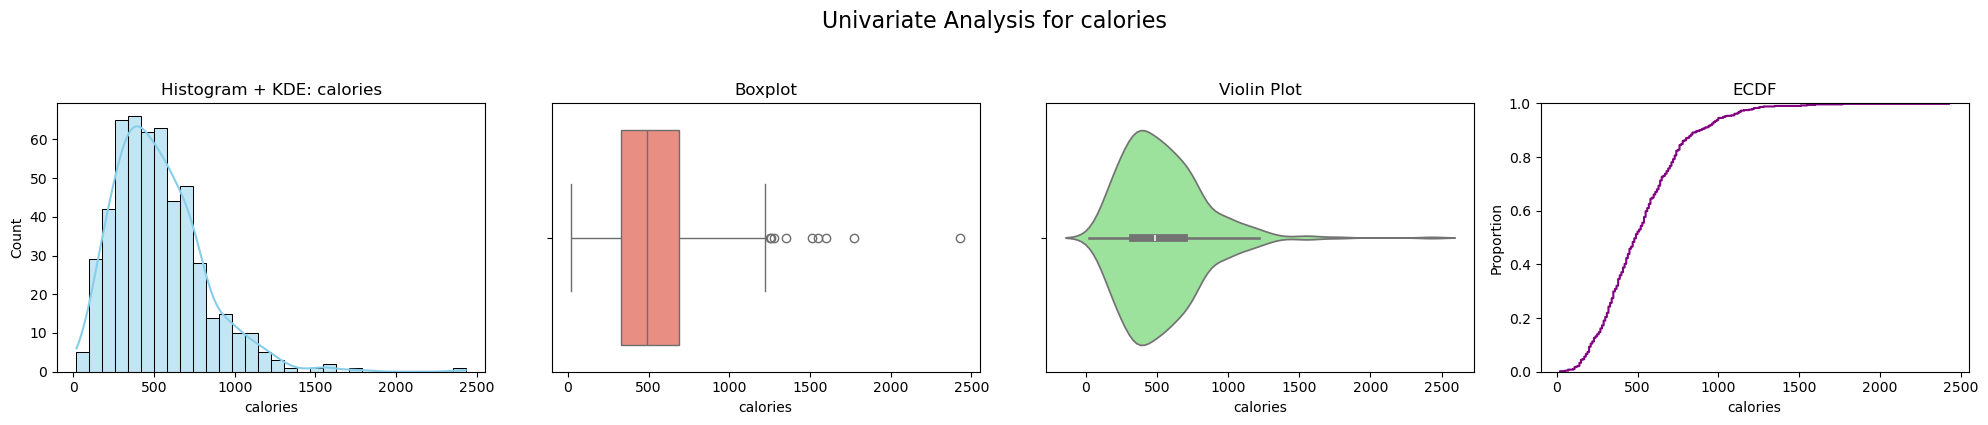

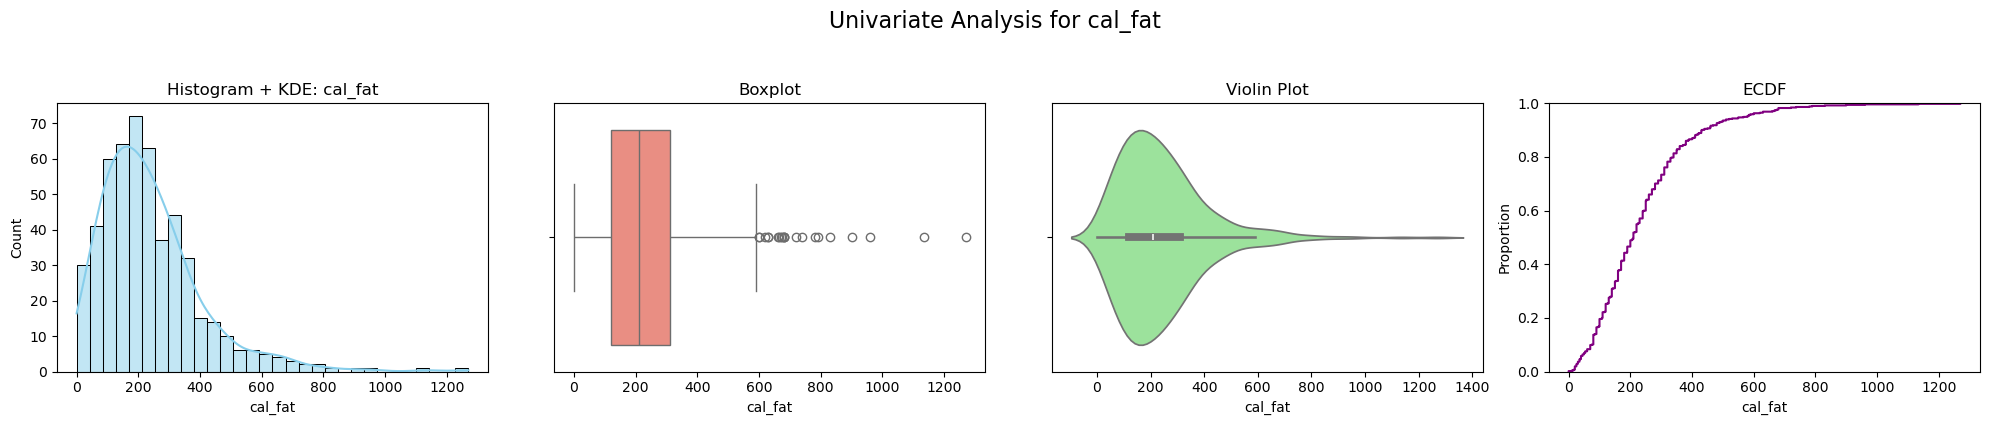

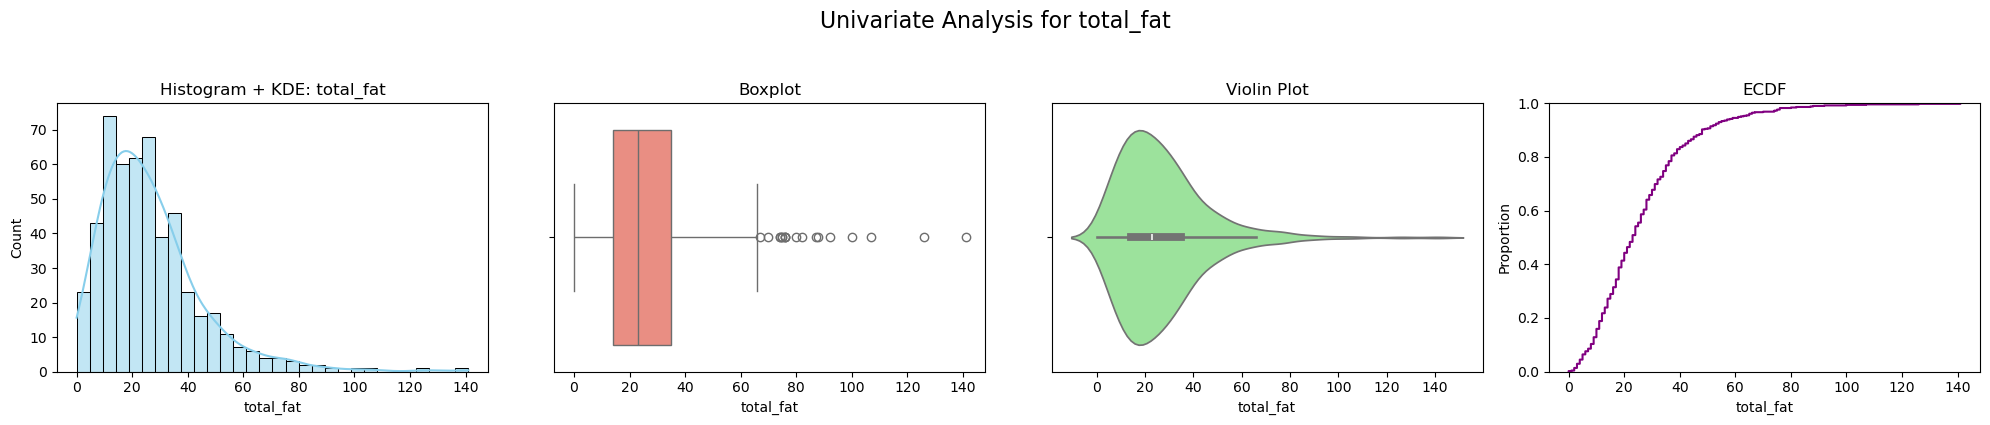

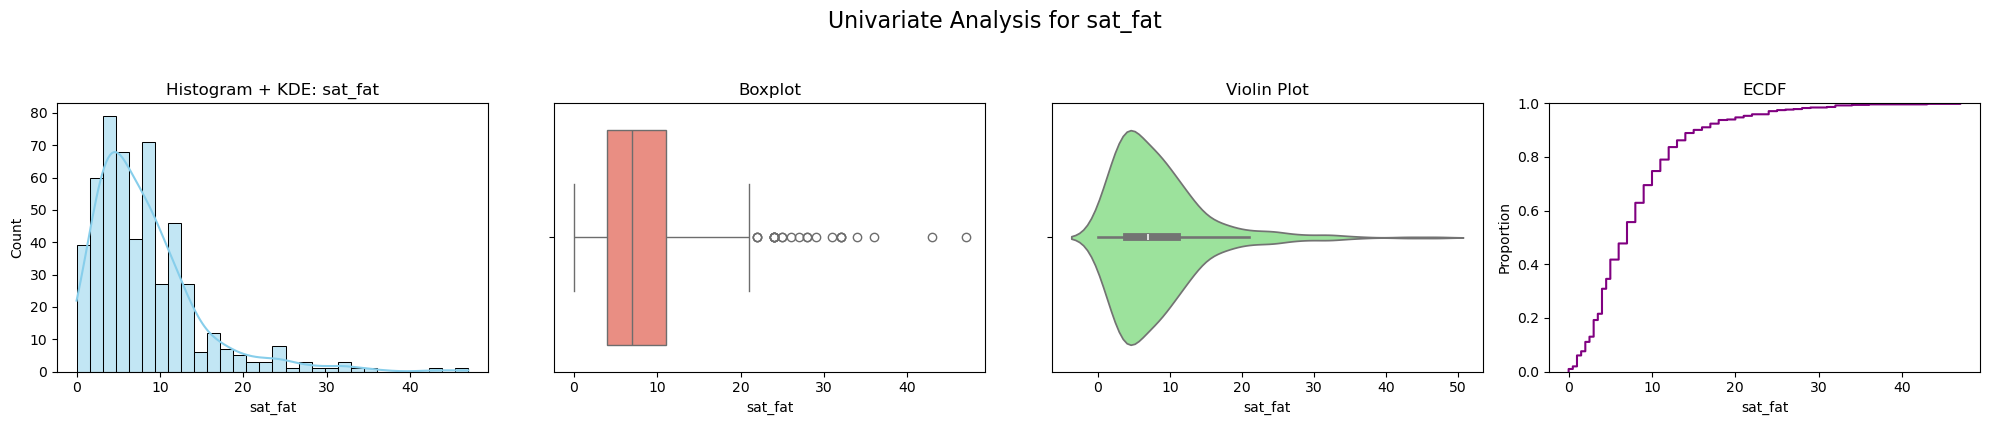

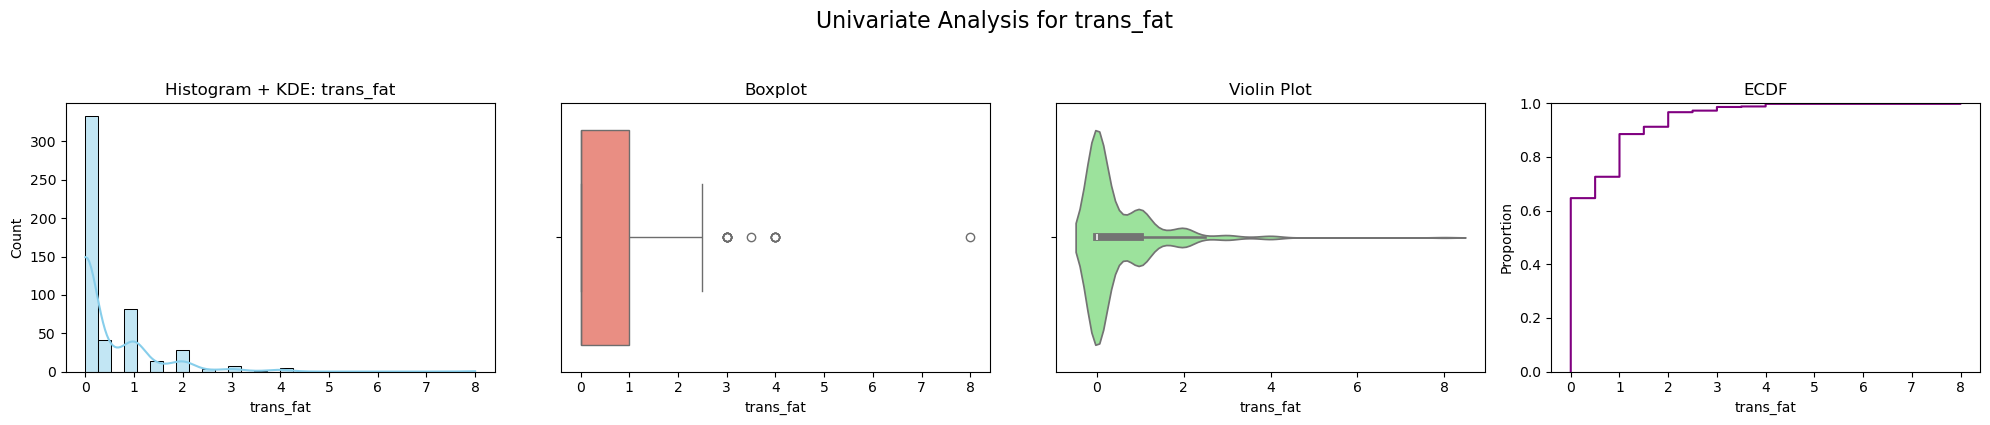

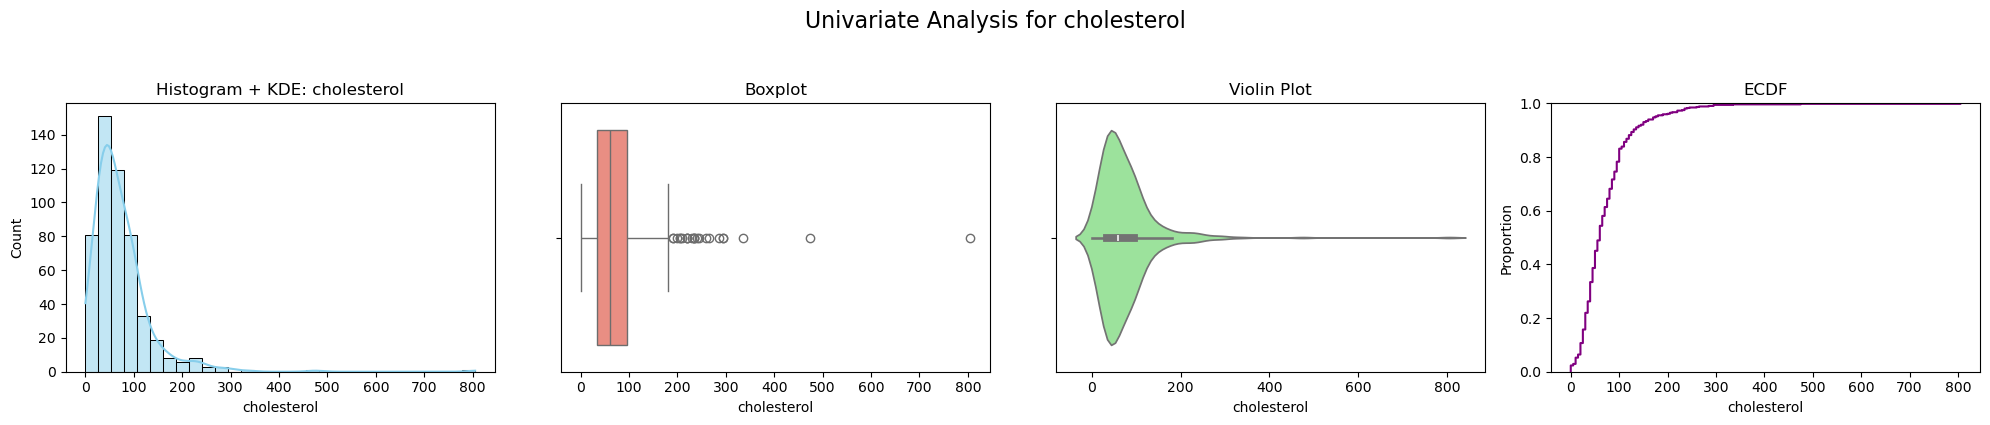

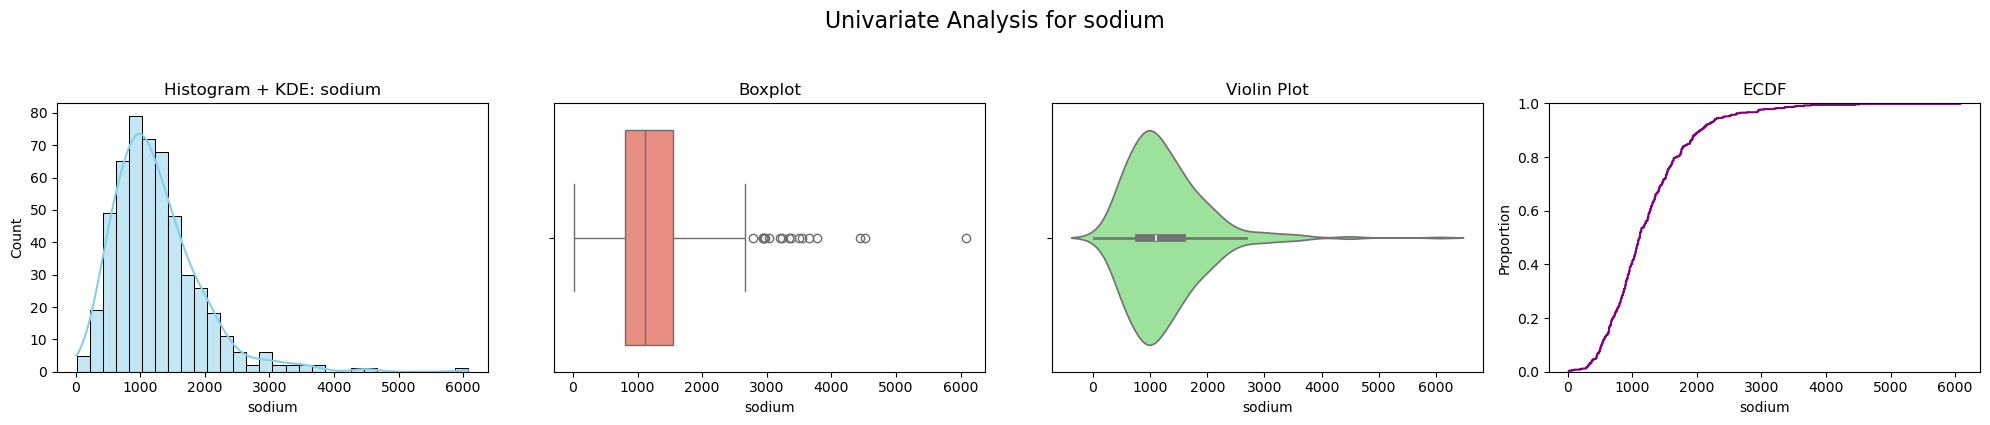

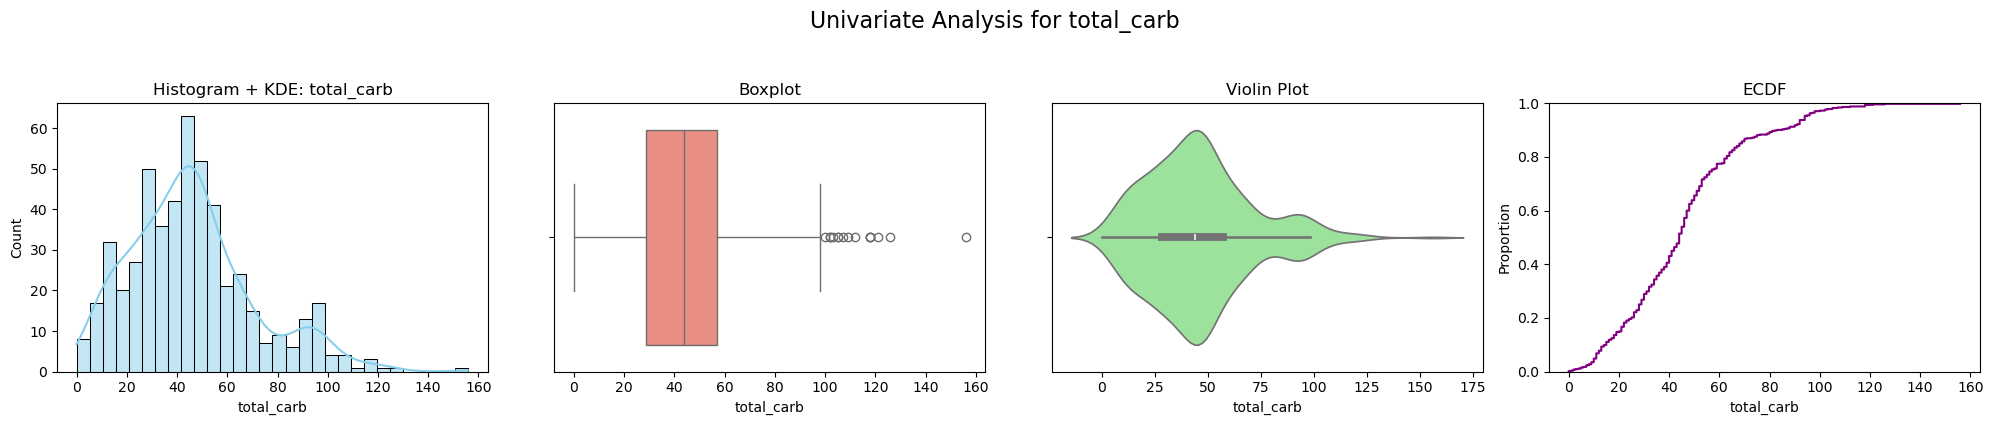

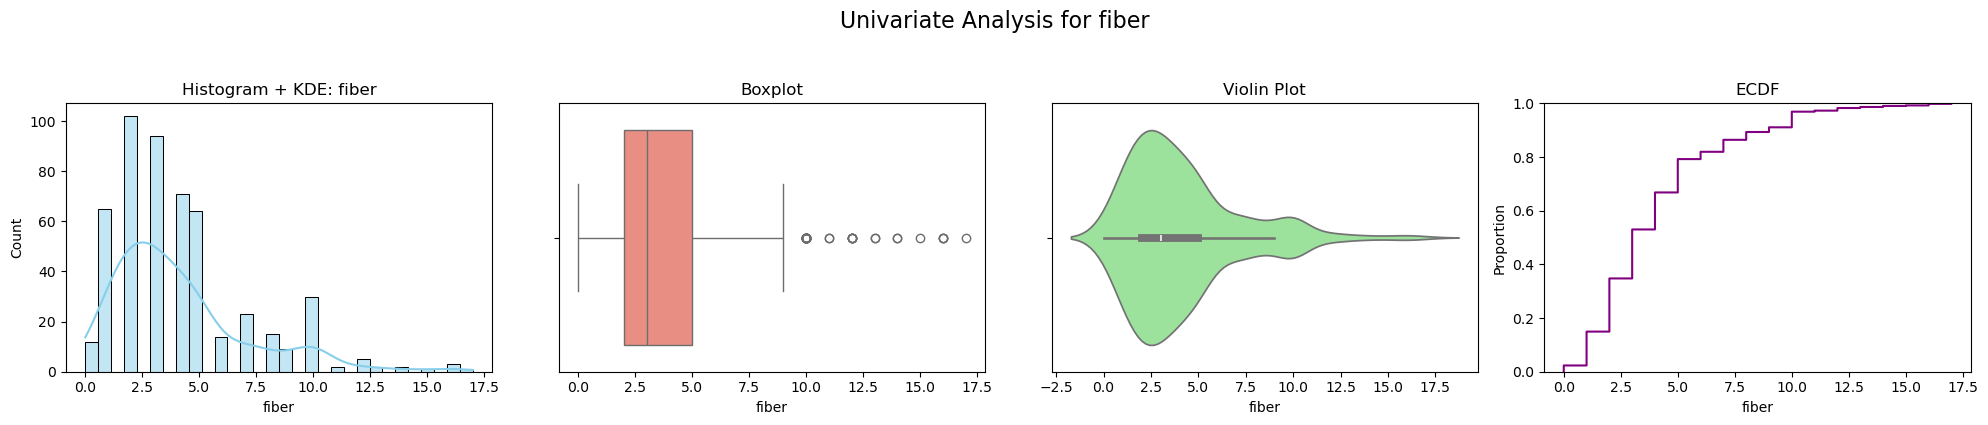

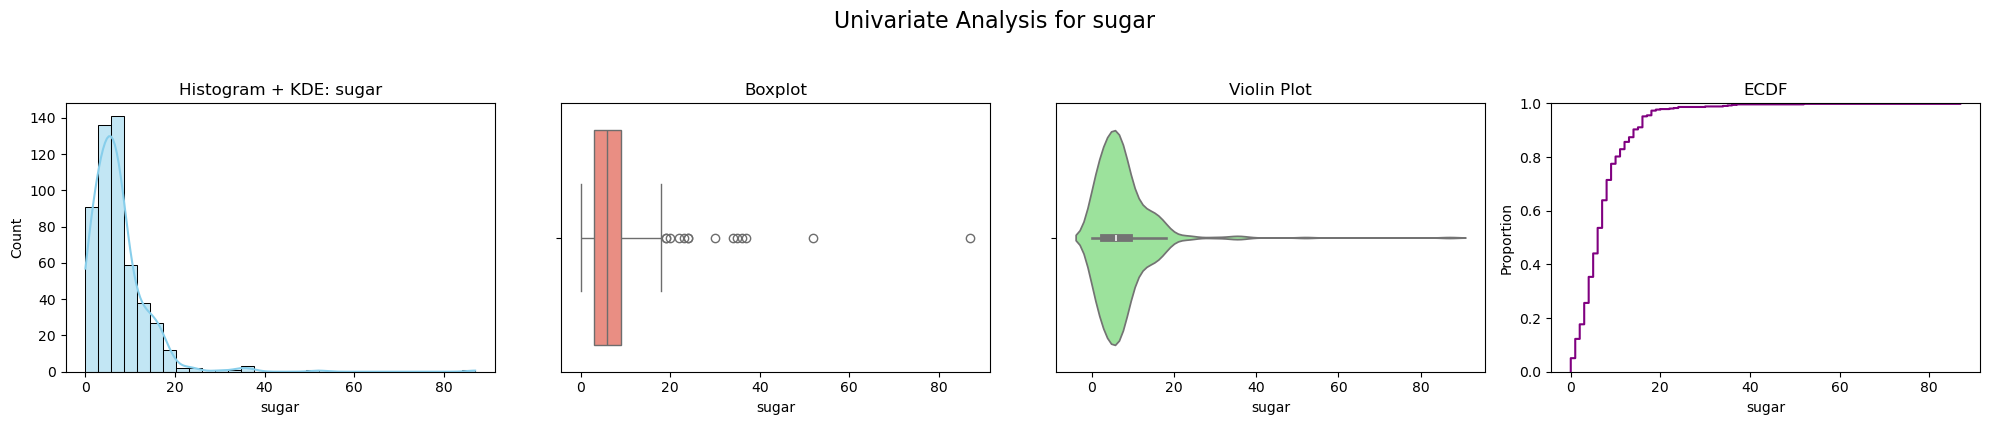

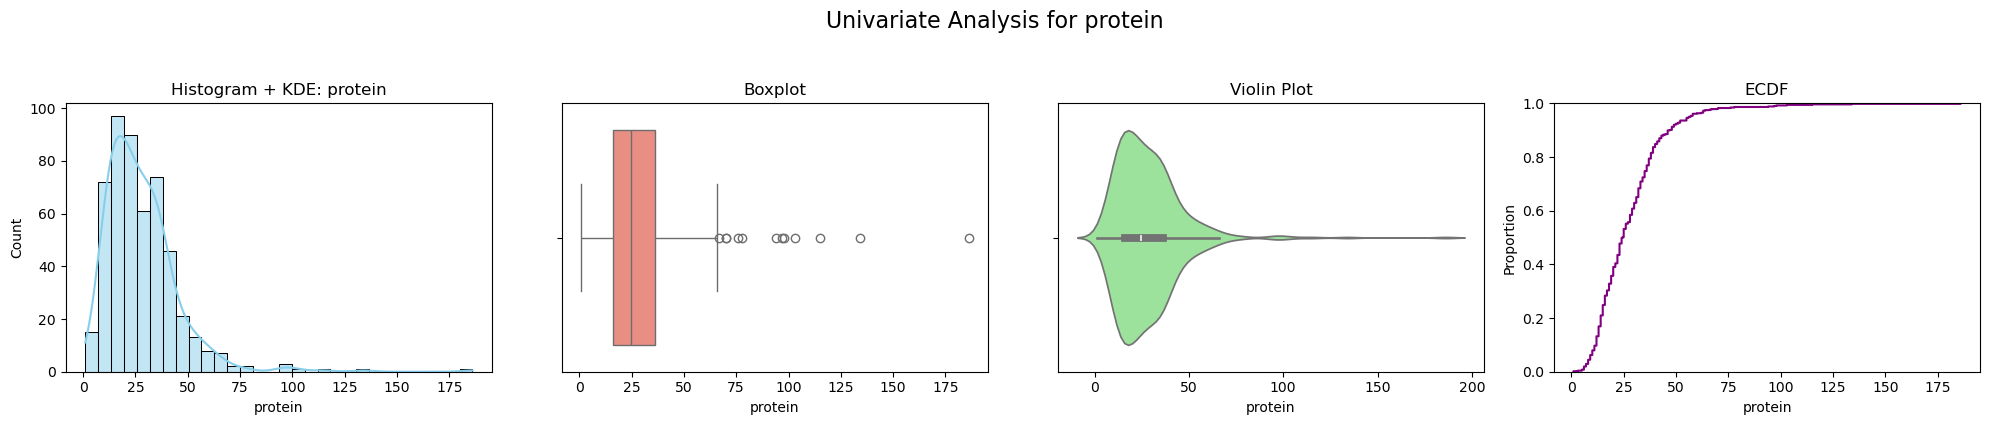

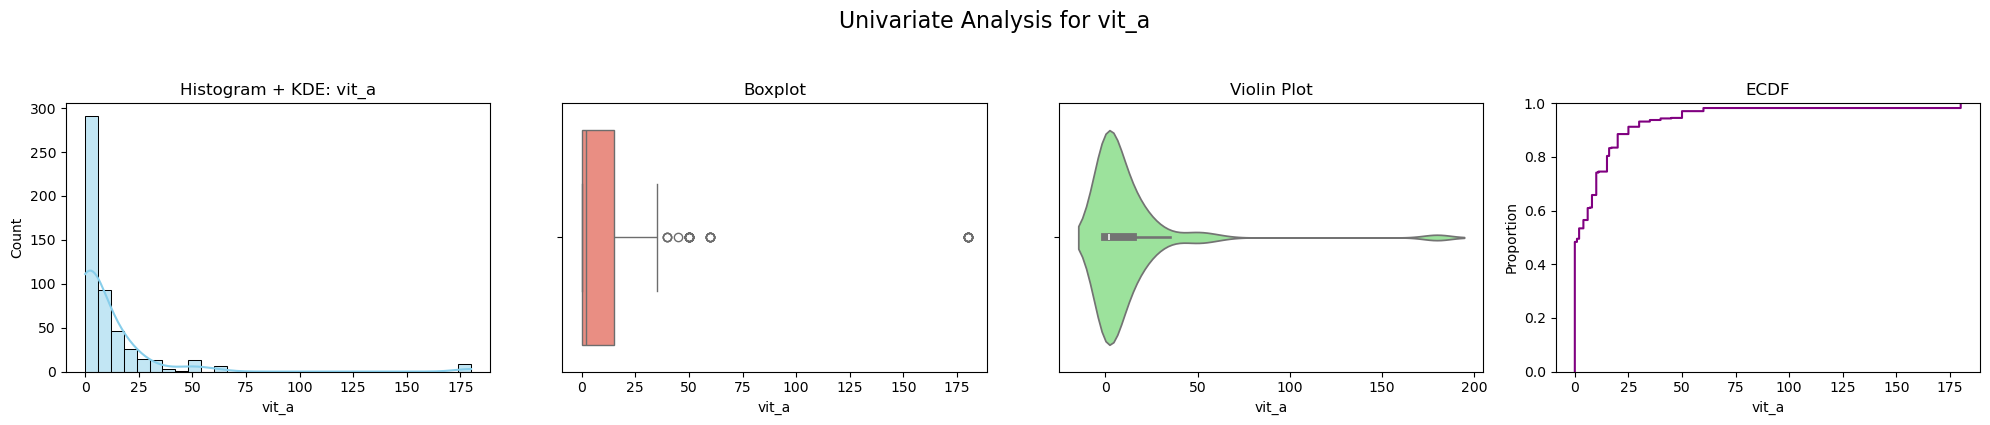

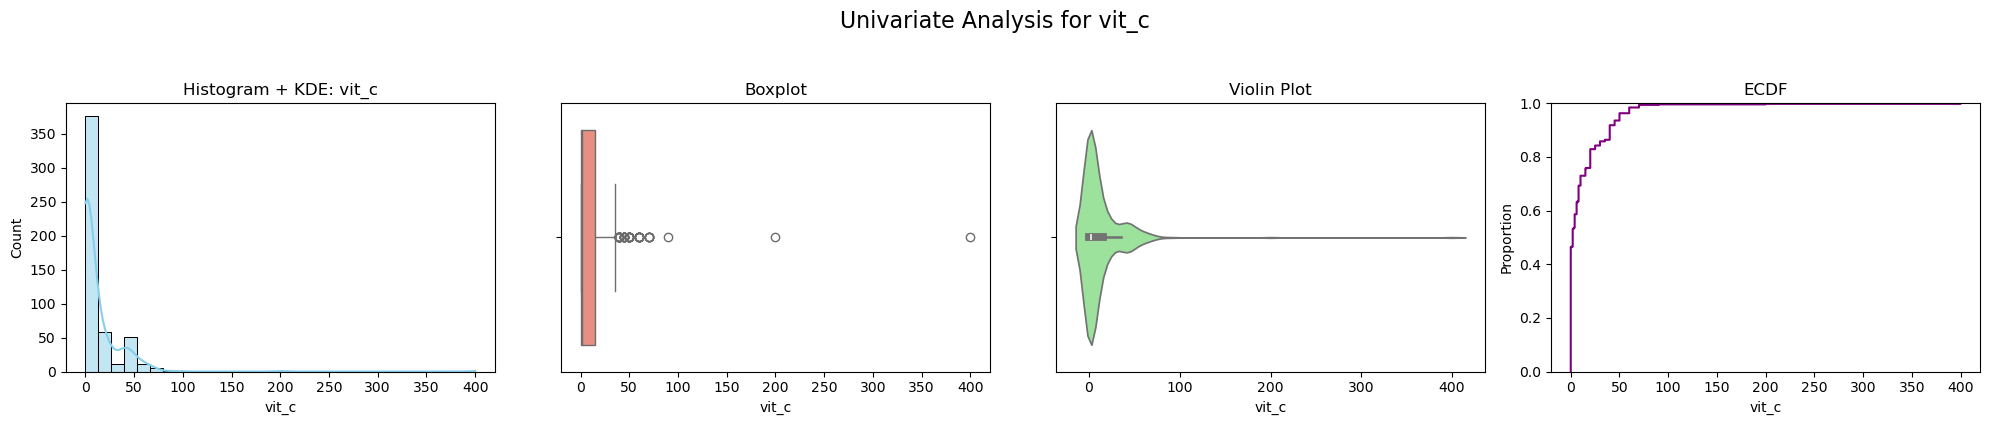

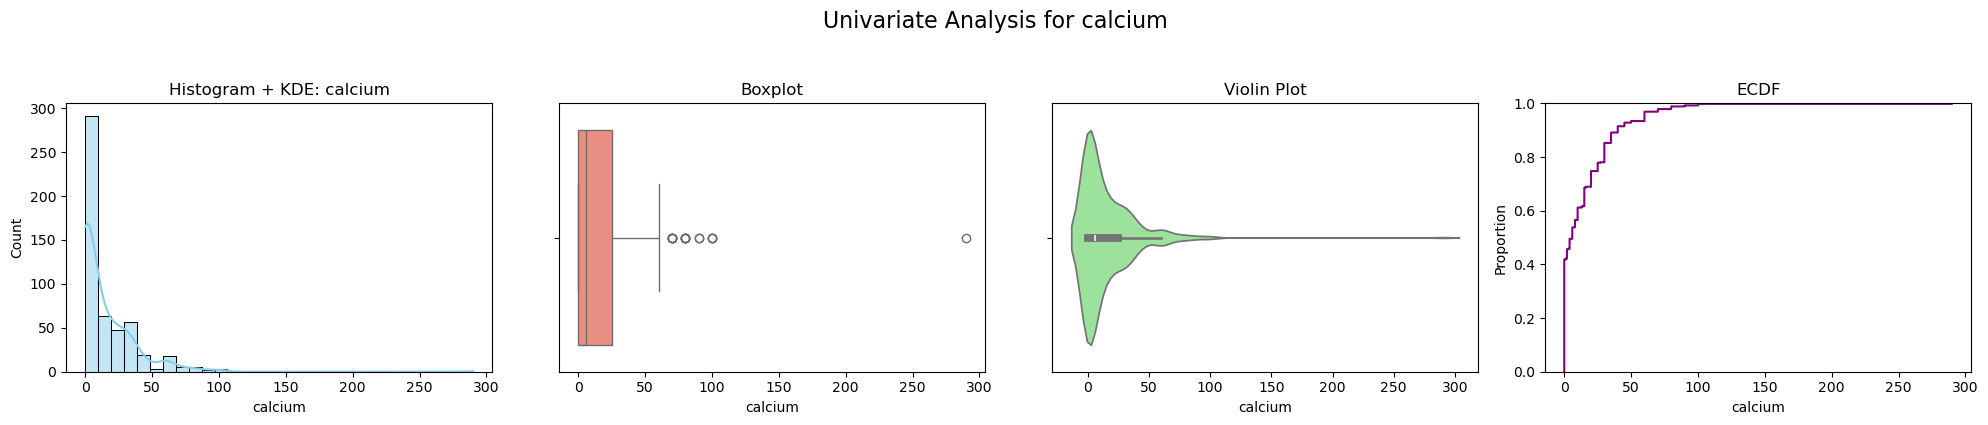

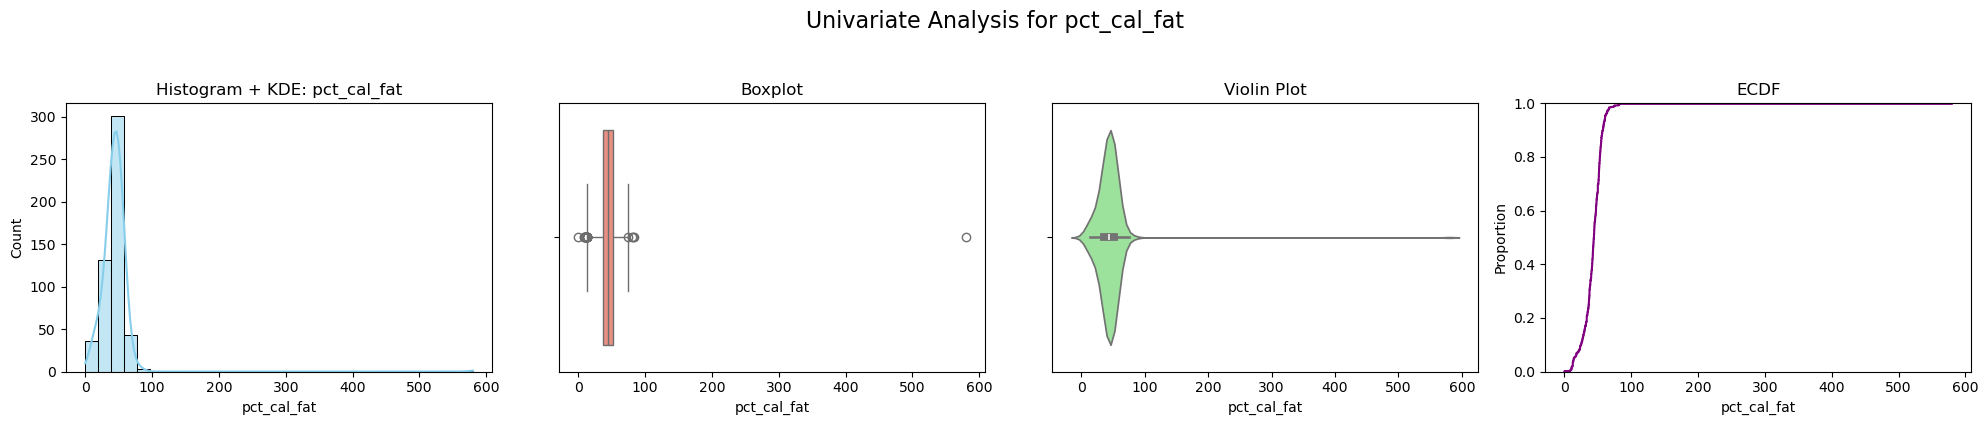

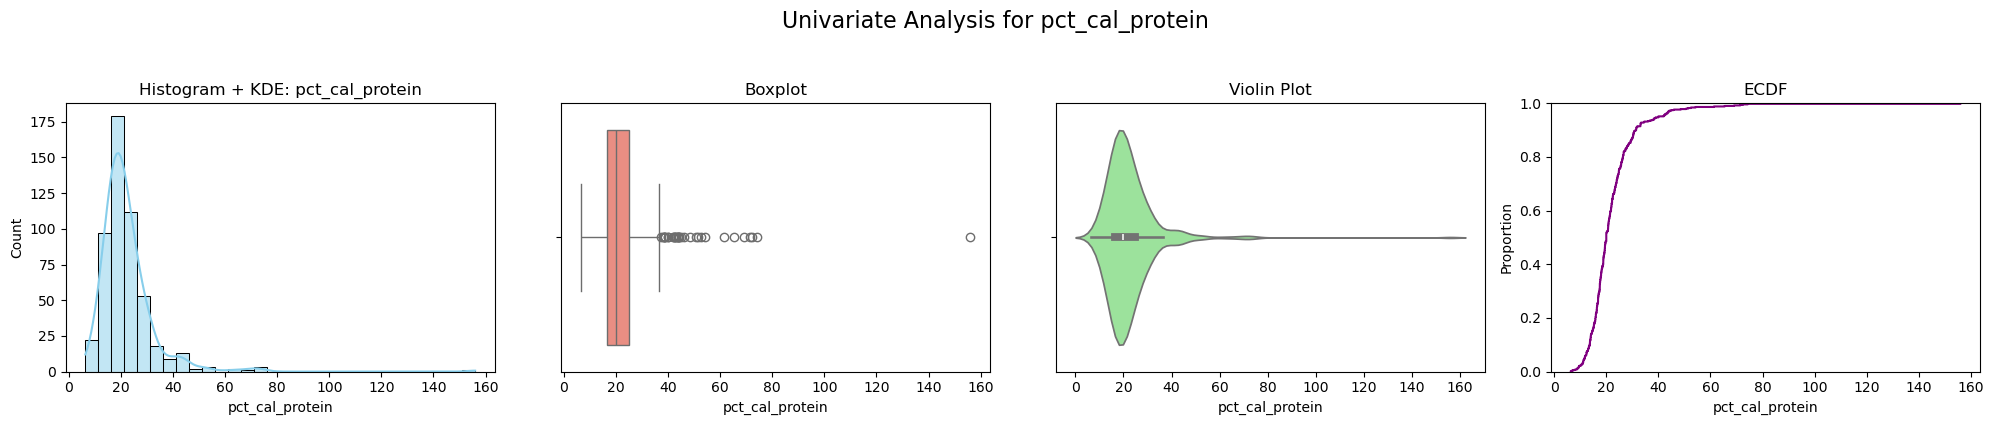

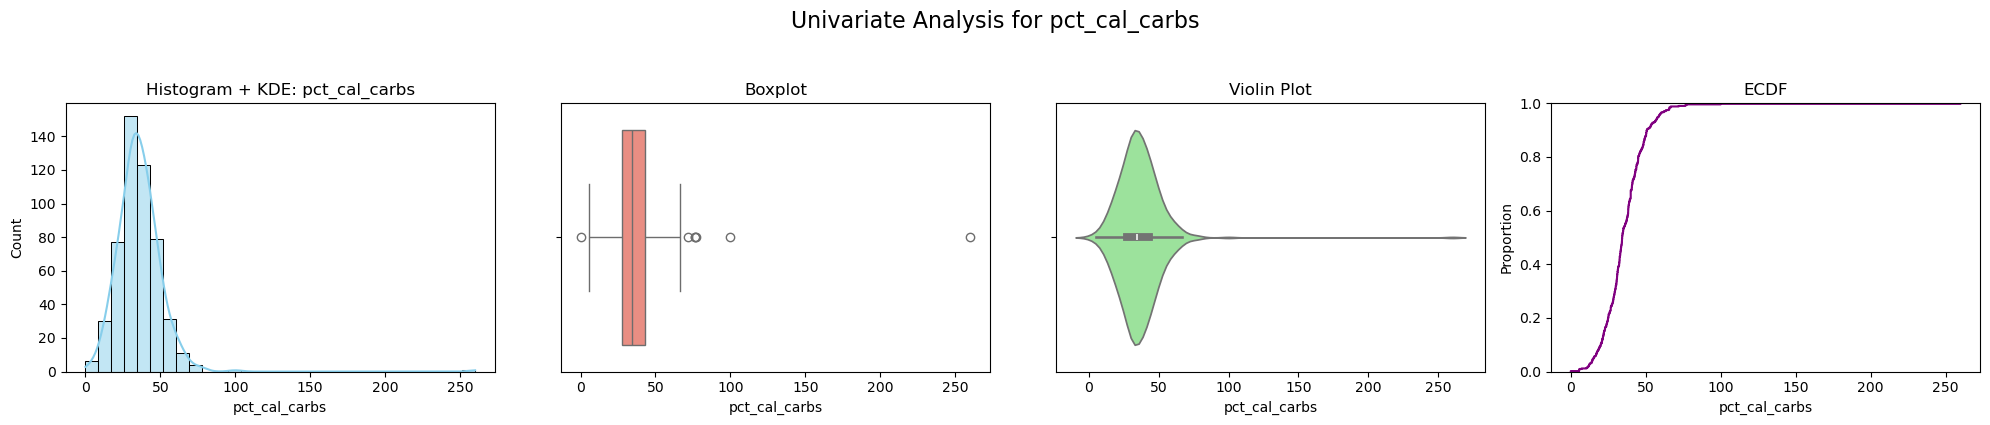

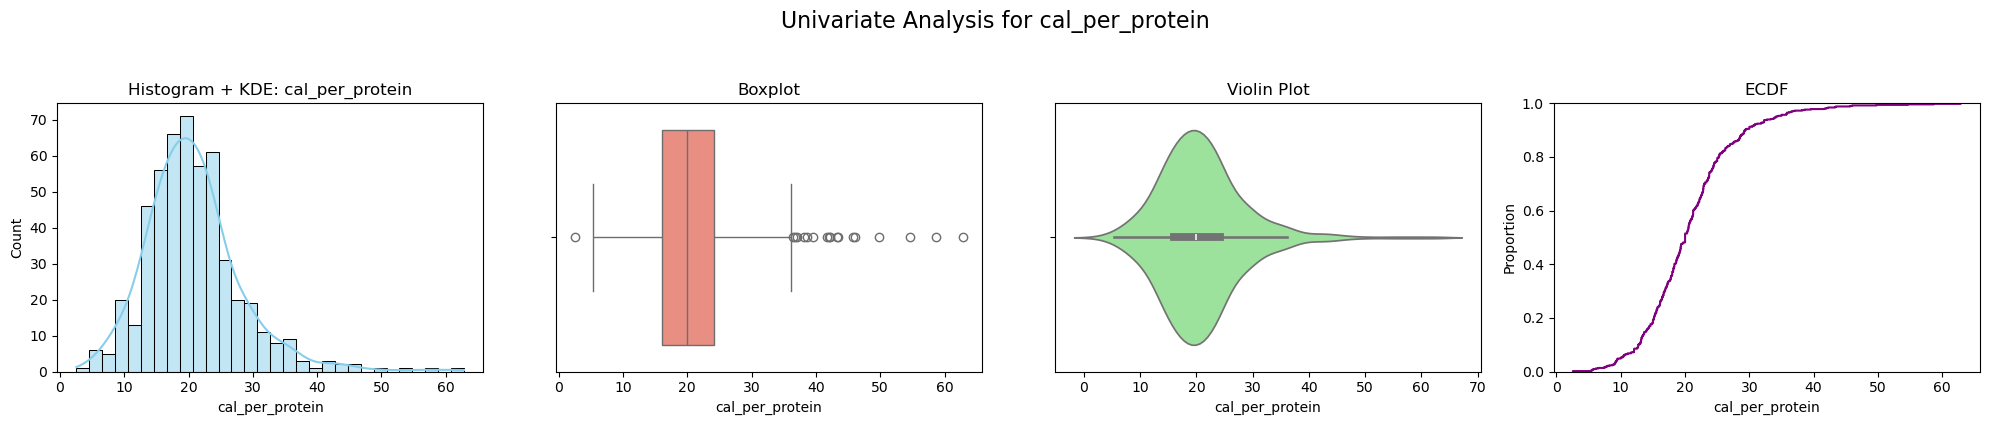

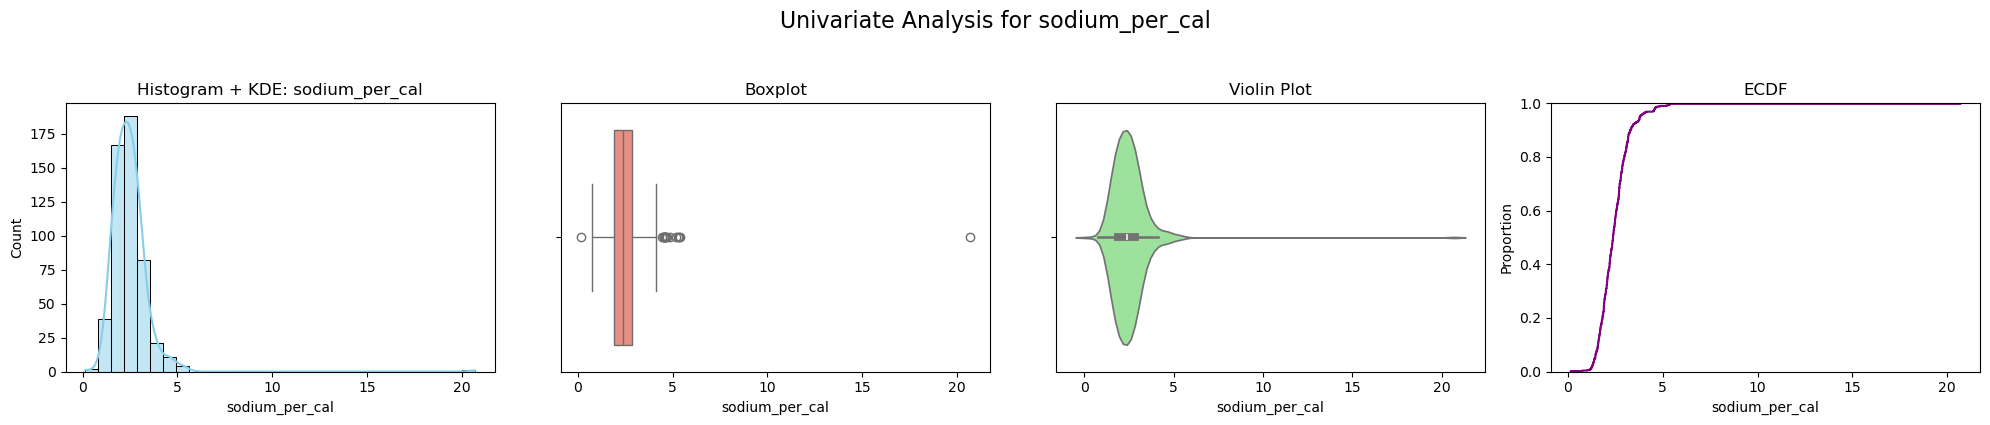

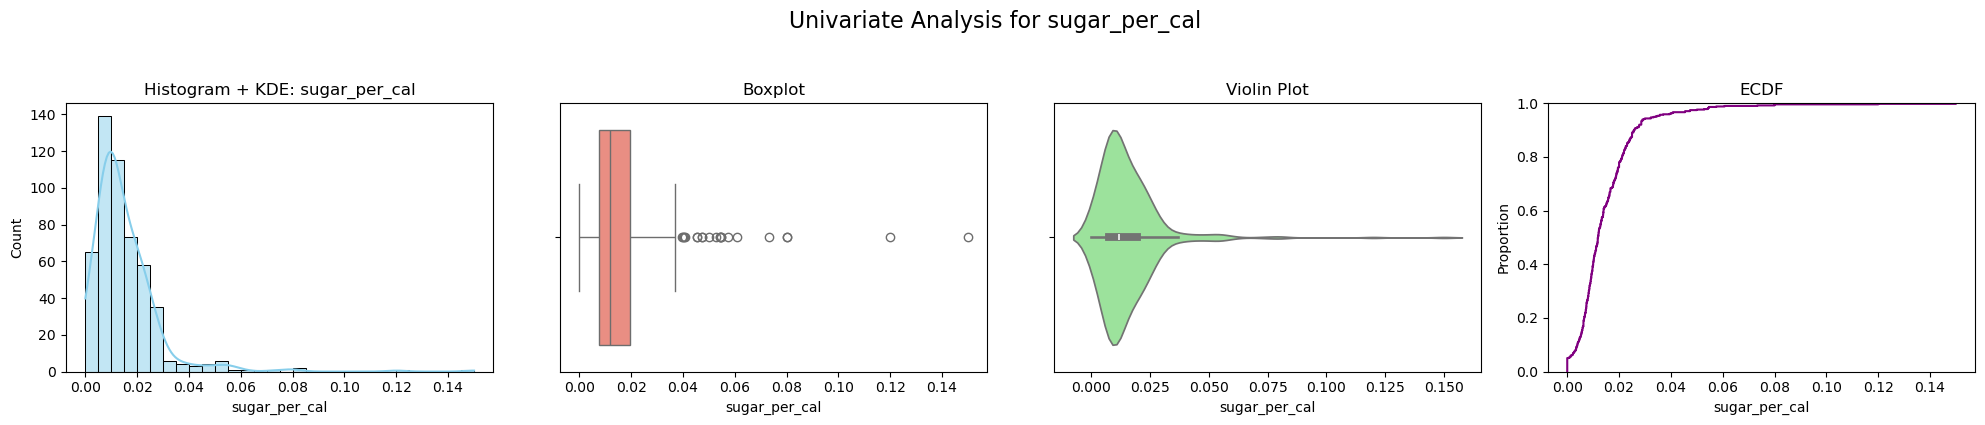

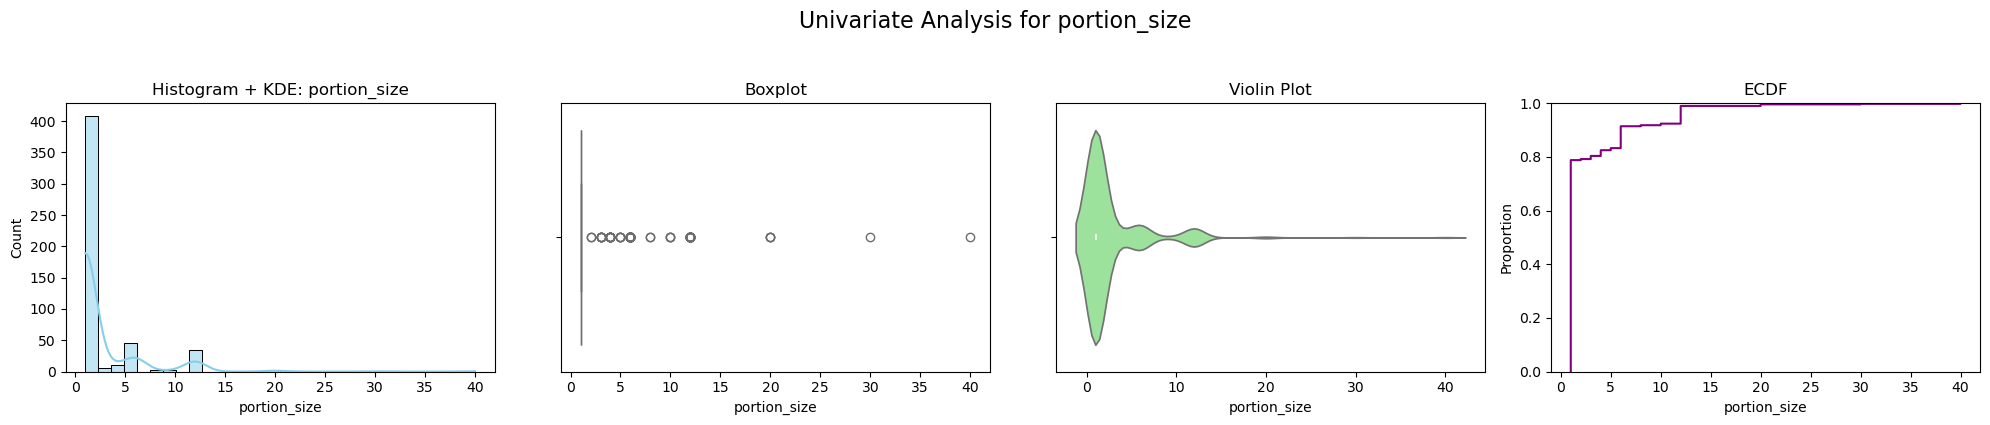

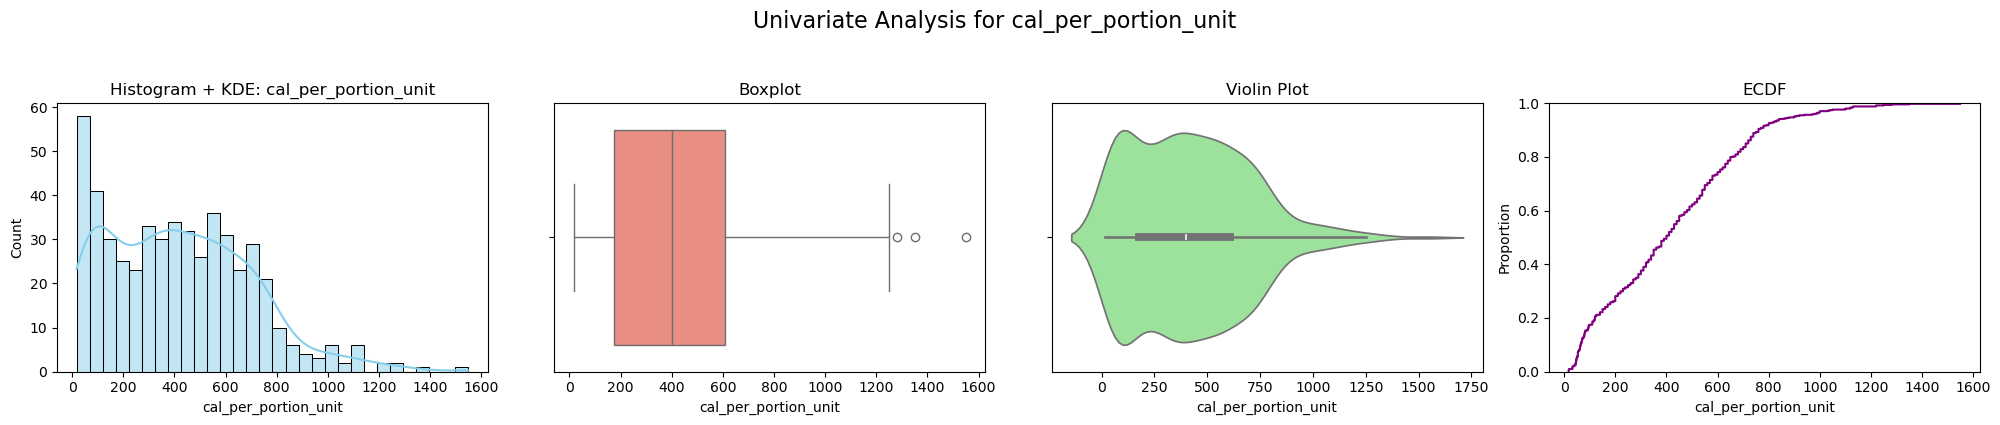

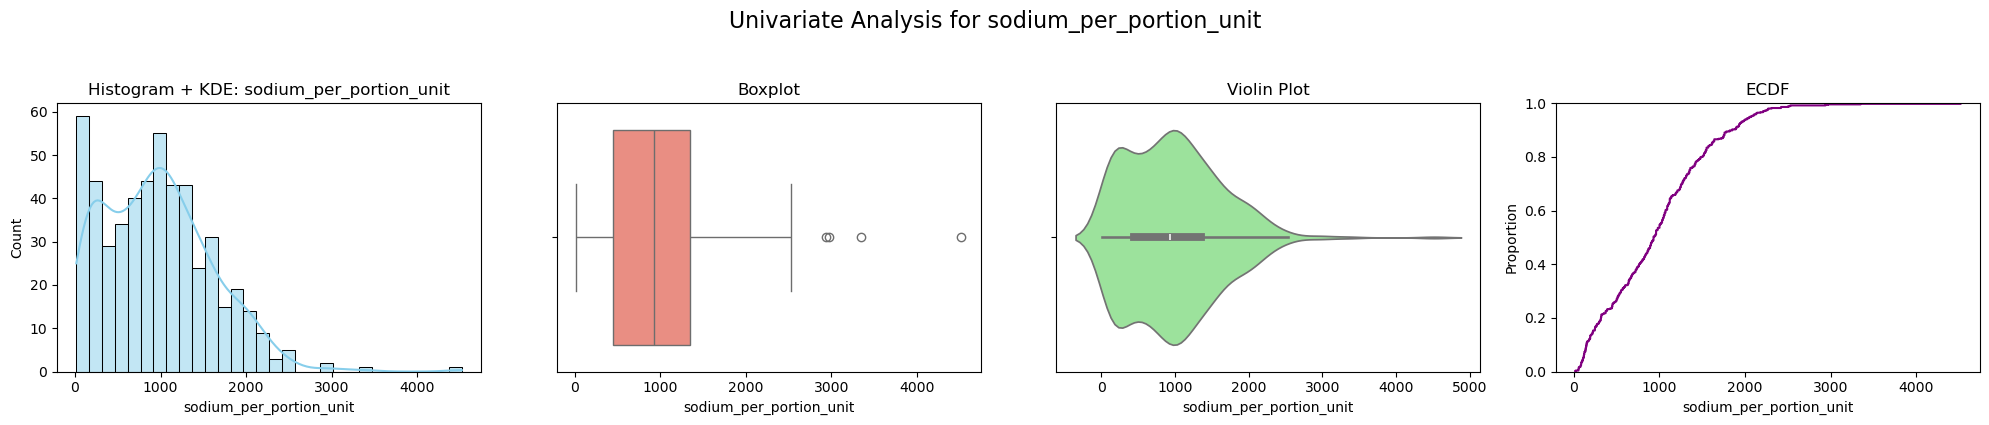

In [34]:
# I created a function
def univariate_numeric_plots_singlerow(df, num_cols, bins=30):
    """
    For each numeric variable, plot:
    1. Histogram + KDE
    2. Boxplot
    3. Violin Plot
    4. ECDF
    All in a single row of subplots.
    """
    for col in num_cols:
        fig, axes = plt.subplots(1, 4, figsize=(20, 4))

        # Histogram + KDE
        sns.histplot(df[col], kde=True, bins=bins, ax=axes[0], color="skyblue")
        axes[0].set_title(f"Histogram + KDE: {col}")

        # Boxplot
        sns.boxplot(x=df[col], ax=axes[1], color="salmon")
        axes[1].set_title("Boxplot")

        # Violin Plot
        sns.violinplot(x=df[col], ax=axes[2], color="lightgreen")
        axes[2].set_title("Violin Plot")

        # ECDF
        sns.ecdfplot(df[col], ax=axes[3], color="purple")
        axes[3].set_title("ECDF")

        # General formatting
        plt.suptitle(f"Univariate Analysis for {col}", fontsize=16, y=1.05)
        plt.tight_layout()
        plt.show()

# I executed the function
univariate_numeric_plots_singlerow(df, num_cols)

---
### Univariate Interpretations (Nutrition Perspective)

1. **% Calories from Protein (pct_cal_protein)**
- Histogram/KDE shows most items fall between 15–30% of calories from protein. This is within (and closer to the lower end of) the AMDR guideline (10–35%).
- A few extreme outliers (>60%, even up to 150%) likely represent very high-protein items, such as grilled chicken entrees or protein salads with little added carbs/fat.

Interpretation: Most items are okay in protein balance, but fast food rarely provides high relative protein unless designed as a "protein bowl/lean option."

---

2. Calories from Fat (cal_fat)
- Distribution is right-skewed, with most items providing 100-400kcal from fat.
- Boxplot shows many outliers above 600kcal (these are the “mega burgers / loaded sandwiches”).
- Since fat = 9 kcal per gram, this means some items easily pack 60-100g of fat.

Interpretation: Fat is the dominant calorie source in many fast-food items, which skews the overall diet high fat / high energy density.

---

3. Calories per Portion Unit (cal_per_portion_unit)
- Shows wide variability (100-800kcal per serving unit, long tails toward 1500).
- 6-inch subs, tenders, nuggets normalize per unit (50-100kcal each).
- Outliers are big entrees advertised as “deluxe/loaded” or portion outliers (Footlong subs, huge burgers).

Interpretation: Portion size drives calorie load. Per nugget/strip: consistent, but order more units = ↑ risk.

---

4. Calories per Gram Protein (cal_per_protein)
- Distribution peaks 18-22kcal per gram protein which is decently efficient (lean protein sources).
- Outliers (40-60kcal per gram protein) are calorie-dense desserts or fried fatty proteins (lots of fat/sugar relative to protein).

Interpretation: Grilled chicken items are efficient protein sources, while fried/cheesy options deliver poor “protein bang-for-calorie buck.”

---

5. Calcium
- Highly skewed, with almost all items providing little to no calcium, except some dairy-based items (200-300% DV).
- Missingness handled earlier led to many zeros representing non-reported.

Interpretation: Fast food is not a reliable calcium source, except for dairy-based desserts/shakes.

---

6. Calories
- Most items range 300-800kcal.
- Outliers exceed 2000+kcal (double/triple burgers, loaded Smokehouse).

Interpretation: Single items can meet an entire meal’s energy requirement, or in some cases nearly a full day’s worth (2000 kcal). Portion awareness is critical.

---

7. Cholesterol
- Most items sit between 20-120mg.
- Outliers >600-800 mg represent egg-heavy breakfasts or multi-meat products which is far above the typical daily intake suggested (300mg/day guideline for at-risk populations).

Interpretation: Excessive cholesterol is rare but still present in select high-meat menu items.

---
8. Fiber
- Distribution peaks around 2-5g.
- Very few items exceed 10 g (likely bean burritos or specific veggie-heavy products).
Recommendations: 25-30 g/day.

Interpretation: Fast food severely underdelivers fiber, making it unsuitable as a primary dietary staple without pairing with fruits/vegetables.

---

9. % Calories from Carbohydrates (pct_cal_carbs)
- Most items 35-55% of calories from carbs, pretty close to the guideline (45-65%).
- Outliers >100% carbohydrate are basically desserts, sodas, or condiments.

Interpretation: Fast foods generally provide carb-heavy meals but not excessively imbalanced, except sugary beverages/desserts that are “pure carbs.”

---

10. % Calories from Fat (pct_cal_fat)
- Majority cluster 30–50% fat (above the 20–35% guidelines).
- Outliers >60–90% fat from chicken wings, fried snacks, or extreme cheese/bacon items.

Interpretation: Fast food generally shifts the macronutrient balance too high toward fat, especially saturated fat.

---

11. Total Fat (g)
- Right-skewed: most items deliver 15-40 g fat, but outliers reach 120+ g.
- Guideline: 70 g total fat/day on a 2000 kcal diet.

Interpretation: Many items supply half the daily fat in just one serving, some deliver nearly the whole day’s worth.

---

12. Portion Size
- Most items are single-unit (1) foods (burgers, sandwiches, salads).
- Clear subgroups: 6 = nuggets / 6-inch subs, 12 = Footlong, 20–40 = large nugget boxes.

Interpretation: Per-unit calorie loads are consistent (nuggets all ~50 kcal each), but portion inflation is the real health risk.

---
13. Protein (g)
Most menu items: 15–35 g protein, but right tail extends >100 g (mega sandwiches/protein bowls).
This meets/exceeds typical per-meal protein needs (20–35 g).

Interpretation: Protein intake itself is adequate but often comes with excessive calories, sodium, and fat.

---

14. Saturated Fat (g)
- Clustered around 5-15 g, but outliers >40g.
- Dietary guideline: Saturated fat ≤ 20g/day.

Interpretation: One item can max out or exceed the daily limit in a single sitting.

---

15. Sodium per Calorie (mg/kcal)
- Clustered 1-3mg per kcal, with extreme outliers 10–20 mg/kcal.
- This means some foods are “salt bombs”, supplying sodium disproportionate to their energy value.

Interpretation: Patients eating fast food often hit sodium limits before hitting calorie needs.

---

16. Sodium (mg)
- Most items: 800-1600mg sodium.
- Outliers: >5000mg (3x WHO daily max).

Interpretation: Single fast-food items can exceed an entire day’s sodium limit.

---

17. Sugar per Calorie
Most cluster 0.01-0.03 (1-3% of calories from sugar).
Outliers: >0.1 (10% or more calories purely from sugar) from shakes/desserts.

Interpretation: Dessert-style products are dominated by sugar calories, providing “empty energy.”

---

18. Sugar (g)
- Typical entrees: 2–15 g sugar.
- Beverages/desserts: >80 g (20 teaspoons).

Interpretation: WHO recommends no more than 25 g added sugar/day but many shakes easily triple this.

---

19. Total Carbohydrate (g)
- Most items: 35-65g carbs (bread, tortillas).
- Outliers: >120g (burritos, fries + sodas).
Interpretation: Fits within meal ranges, but low fiber content = “fast carbs” spike glucose without nutritional balance.

---

20. Vitamin C (vit_c)
- Heavily right-skewed; most items contribute very little or 0-20%DV, but a few extreme outliers reach 200-400%DV.  
- Outliers are likely beverages, smoothies, or produce-heavy salads from certain chains.  

Interpretation: Fast food is generally not a consistent vitamin C source; contribution is incidental and menu-specific.

---

21. Trans Fat (trans_fat)
- Majority of items register around 0g (reflecting FDA/WHO ban on added trans fats).  
- A handful of items reach 24g, with an extreme near 8g.  

Interpretation: Even small amounts of trans fat significantly raise cardiovascular risk. The outliers highlight older formulations or fried items still containing trans fats. The best clinical advice is to avoid any item with measurable trans fats.


---

22. Vitamin A (vit_a)
- Most items again near 0-15%DV, with a long right tail up to 150-180% DV.  
- Sources are from items high in dairy (cheese, milkshakes) or salads with leafy greens.  

Interpretation: Fast food menus are sporadic and unreliable sources of Vitamin A, occasional items being enriched, but the overall contribution is minimal.

---

### Overall Insights (Univariate Analysis)

- **Calories:** Most items 300-800kcal, but some exceed 2000kcal, that is, single items can equal a full day’s intake.  
- **Fat & Saturated Fat:** Fat contributes heavily to energy; many items exceed daily sat-fat limits in one meal.  
- **Sodium:** The biggest concern as many items surpass the 2300mg daily max in just one serving.  
- **Sugar:** Entrees moderate, but desserts/shakes can contain >80g (3x daily WHO limit).  
- **Protein:** Adequate (15-35 g per item), but often coupled with excessive fat/sodium.  
- **Fiber & Micronutrients:** Very low across the board; fast food lacks vitamins and minerals essential for balance.  
- **Portion Sizes:** Nutrients per unit are consistent, but large packs (20 nuggets, Footlongs) drive dangerous totals.  

---

**In summary:** Fast food is energy-dense, high in sodium, fat, and sugar, while being poor in fiber and micronutrients. Portion inflation and preparation style (“crispy,” “loaded”) are the key nutritional risk drivers.

---

---

## Restaurant and Preparation Method Distribution

---

- First, I **dropped unwanted categorical columns** (`item` and `food_category`) from the list to keep only relevant features.  
- Then, I looped through each remaining categorical column and created **three visuals side by side** for better understanding:  
  1. **Vertical Countplot**: shows frequency of each category.  
  2. **Pie Chart**: shows relative proportions (%) of categories.  
  3. **Horizontal Countplot**: another view of category counts, easier when labels are long.  
This gives a **complete overview** of each categorical feature, both absolute counts and relative proportions in a clean and consistent way.

---

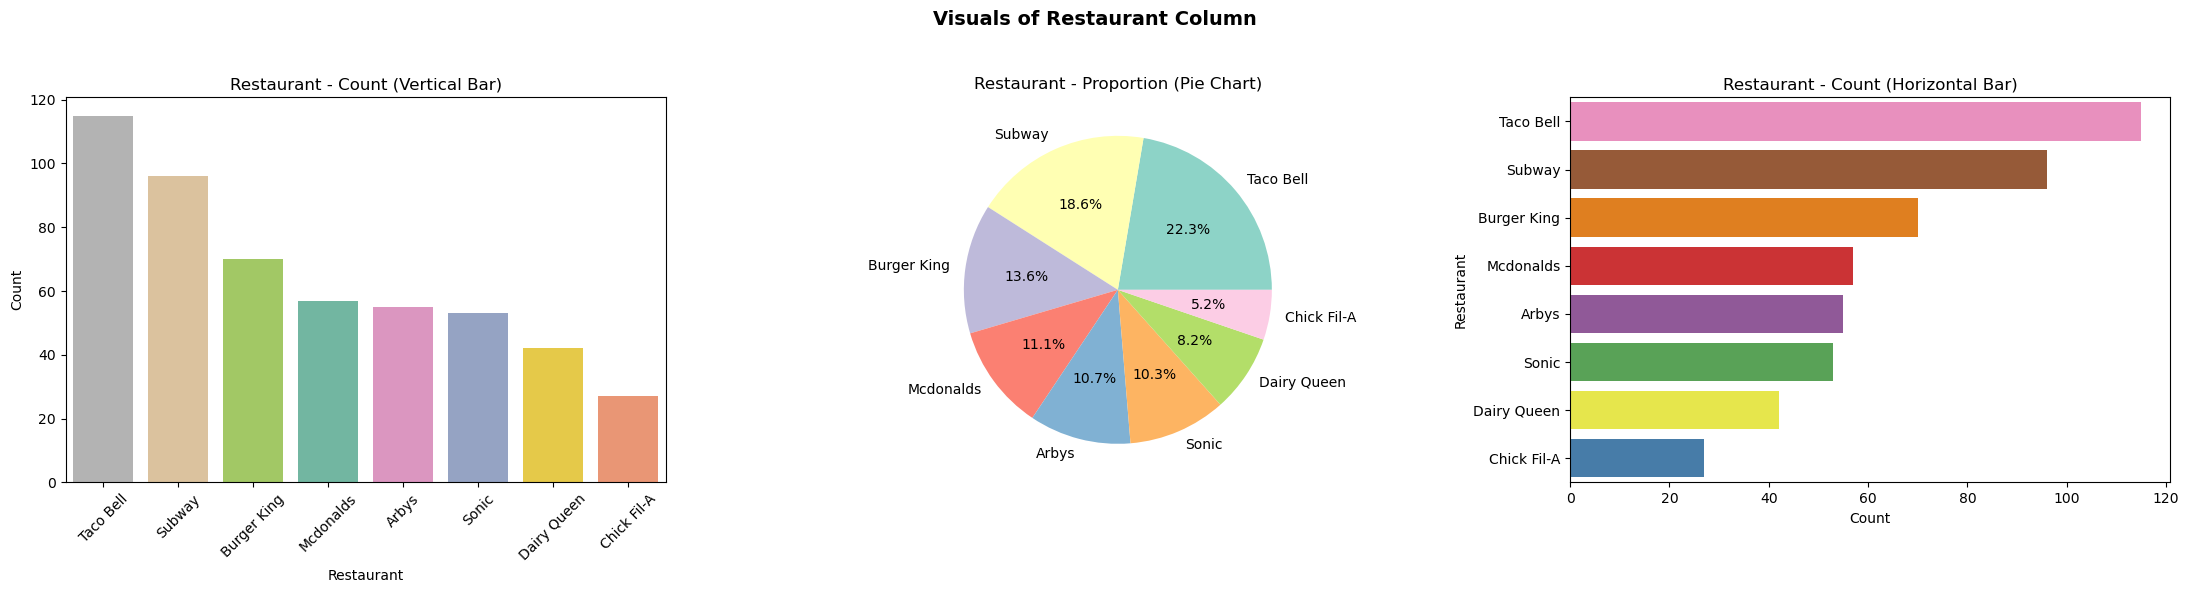

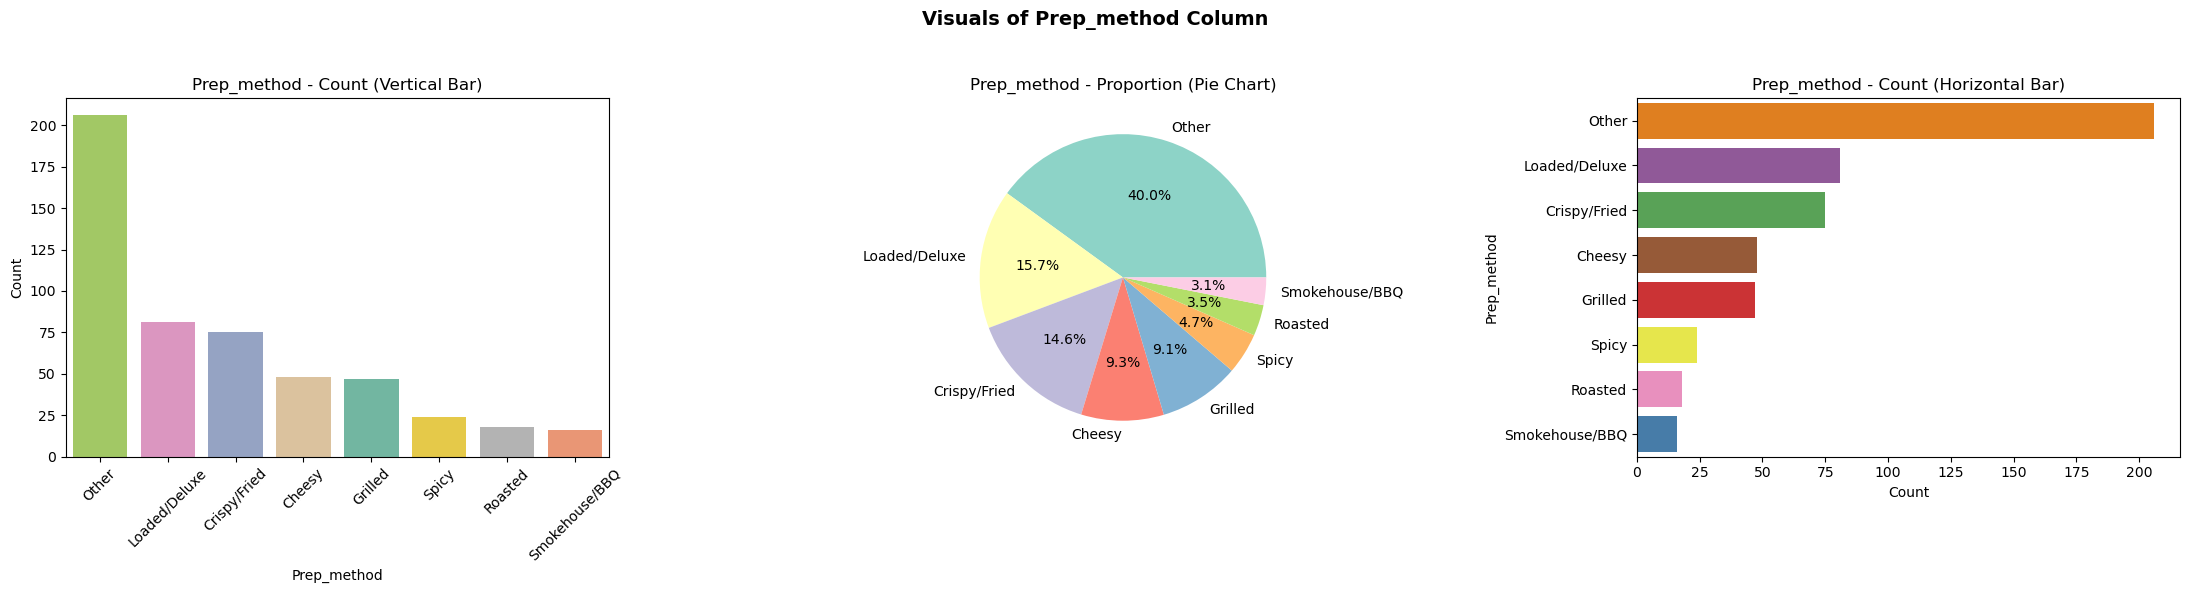

In [35]:
# I dropped unwanted categorical columns safely
for col_to_remove in ['item', 'food_category']:
    if col_to_remove in cat_cols:
        cat_cols.remove(col_to_remove)

# I looped through each categorical feature and visualize
for col in cat_cols:
    fig, axes = plt.subplots(1, 3, figsize=(22,6))
    
    
    # Vertical Count Plot
    sns.countplot(
        data=df,
        x=col,
        hue=col,                   
        dodge=False,               
        legend=False,              
        order=df[col].value_counts().index,  
        palette="Set2",
        ax=axes[0]
    )
    axes[0].set_title(f"{col.capitalize()} - Count (Vertical Bar)", fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].set_xlabel(col.capitalize())
    axes[0].set_ylabel("Count")
    
    # Pie Chart
    df[col].value_counts().plot(
        kind='pie',
        autopct='%1.1f%%',
        colors=sns.color_palette("Set3"),
        ax=axes[1]
    )
    axes[1].set_title(f"{col.capitalize()} - Proportion (Pie Chart)", fontsize=12)
    axes[1].set_ylabel("")  
    
    # Horizontal Count Plot
    sns.countplot(
        data=df,
        y=col,
        hue=col,
        dodge=False,
        legend=False,
        order=df[col].value_counts().index,  
        palette="Set1",
        ax=axes[2]
    )
    axes[2].set_title(f"{col.capitalize()} - Count (Horizontal Bar)", fontsize=12)
    axes[2].set_xlabel("Count")
    axes[2].set_ylabel(col.capitalize())
    
    # I adjusted layout and show the visual
    plt.suptitle(f"Visuals of {col.capitalize()} Column", fontsize=14, fontweight="bold")
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()


---

###  Interpretation of  Restaurant Distribution  

---
    
- **Taco Bell (22.3%) and Subway (18.6%)** dominate the dataset, meaning they contribute the most items overall.  
- **Burger King, McDonald’s, Arby’s, and Sonic** all have a moderate share (10-14%).  
- **Chick-Fil-A and Dairy Queen** have relatively fewer items.  
- This imbalance shows that nutritional risks we observe later may be strongly driven by Taco Bell and Subway, since they make up the largest share of the data.  

---

### Interpretation of Preparation Methods  

- The **"Other" preparation method** dominates at **40% of items**, suggesting many foods don’t fall into neat prep categories, this is worth noting when interpreting later prep‑method results.  
- Among clear categories:  
  - **Loaded/Deluxe (15.7%)** and **Crispy/Fried (14.6%)** are the next most common prep methods.  
  - **Cheesy (9.3%)** and **Grilled (8.3%)** follow.  
- Less frequent but still notable categories: Spicy, Roasted, Smokehouse/BBQ.  

---

### Overall Insight  

- The dataset shows a heavy skew towards **Taco Bell and Subway** in restaurant counts, and towards **energy-dense prep methods** like *Loaded/Deluxe* and *Fried*.  
- These imbalances are important context:  
  - Later sodium/sat-fat risks are amplified by the prevalence of **fried/loaded foods**.  
  - Chain comparisons need to be read carefully since some restaurants are simply more represented in the dataset.

---

---

## Food Category Distribution

---

For the **`food_category`** column, I explored how items are distributed across categories using different plots:  

- **Countplot (Horizontal)**: Shows the raw number of items in each food category.  
- **Percentage Barplot (Vertical)**: Shows the share (%) that each category contributes.  
- **Word Cloud**: Bigger words represent more frequent categories (dominant ones stand out).  
- **Treemap**: Uses box sizes to represent category frequency, so larger categories occupy more space.  

---
**In summary:** These plots give a clear picture of which food categories dominate (e.g., Sandwich, Burger, Mexican) and which are less common (e.g., Seafood, Wrap).  

---

In [36]:
# I installed necessary library

!pip install squarify

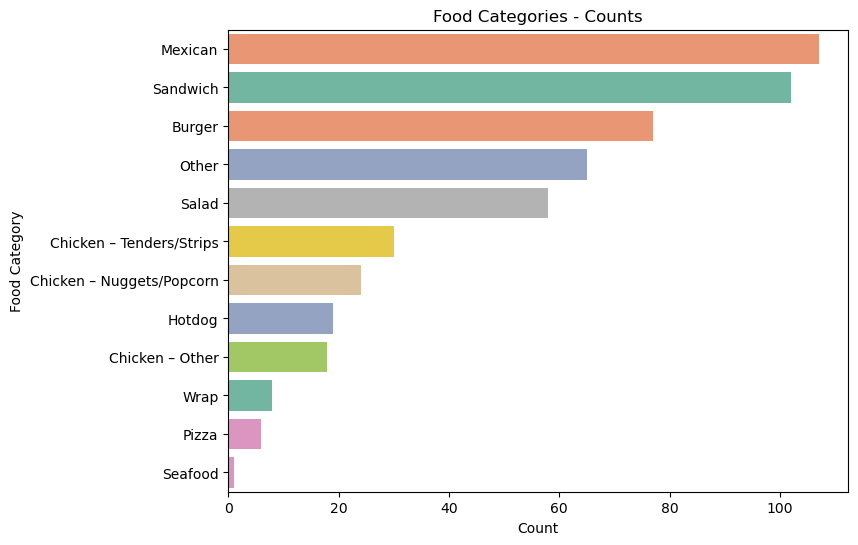

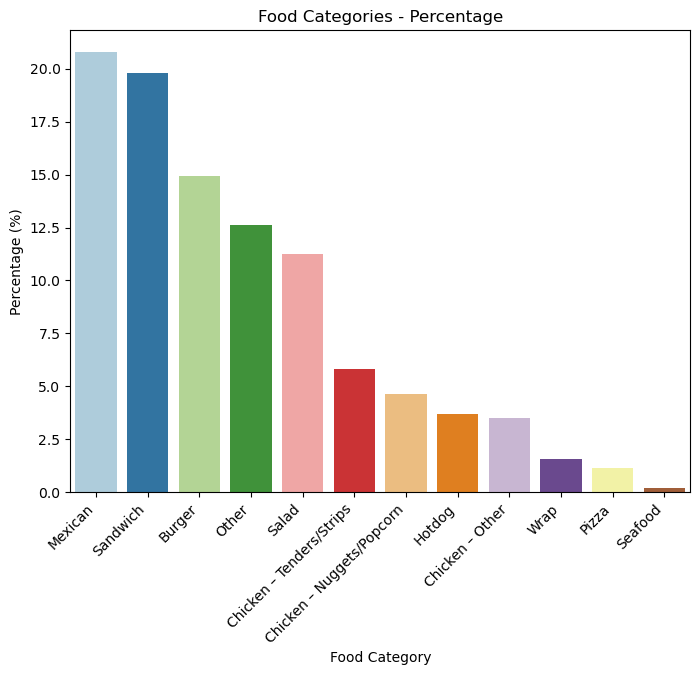

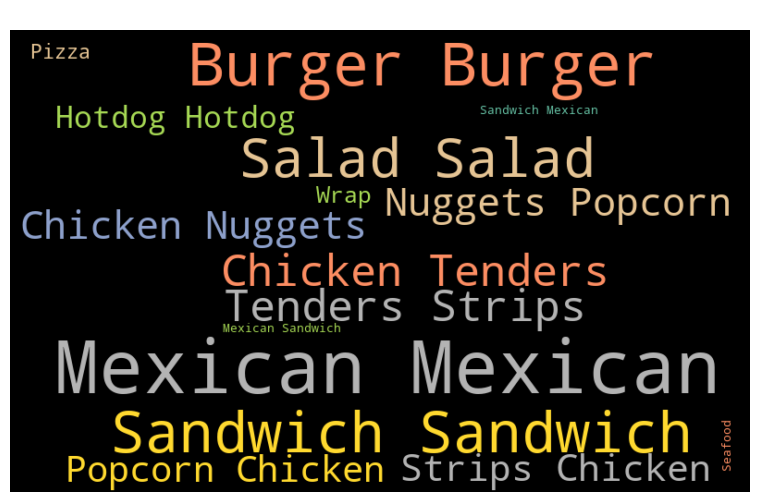

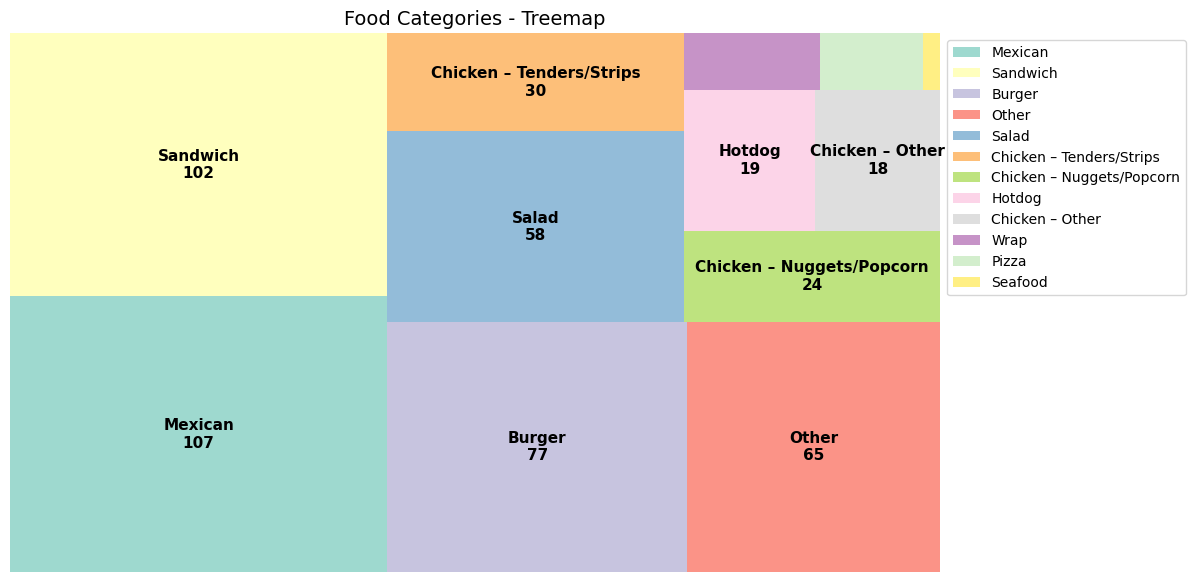

In [37]:
# I plotted an horizontal countplot
plt.figure(figsize=(8,6))
sns.countplot(
    data=df,
    y="food_category",
    order=df["food_category"].value_counts().index,
    hue="food_category",   
    palette="Set2",
    legend=False           
)
plt.title("Food Categories - Counts")
plt.xlabel("Count")
plt.ylabel("Food Category")
plt.show()


# I plotted a vertical percentage Barplot
cat_counts = df["food_category"].value_counts(normalize=True) * 100
plt.figure(figsize=(8,6))
sns.barplot(
    x=cat_counts.index,
    y=cat_counts.values,
    hue=cat_counts.index,    
    palette="Paired",
    legend=False           
)
plt.title("Food Categories - Percentage")
plt.ylabel("Percentage (%)")
plt.xlabel("Food Category")
plt.xticks(rotation=45, ha="right")
plt.show()



# I visualized word cloud with black background
from wordcloud import WordCloud
text = " ".join(df["food_category"])
wc = WordCloud(width=800, height=500, background_color="black",
               colormap="Set2").generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Food Categories - Word Cloud", color="white")
plt.show()


# I visualized treemap with squarify
import squarify

# I got the counts
cat_counts = df["food_category"].value_counts()
sizes = cat_counts.values
labels = cat_counts.index

# I only labelled if the value was big enough (e.g., > 15)
final_labels = [f"{lab}\n{val}" if val > 15 else "" 
                for lab, val in zip(labels, sizes)]

plt.figure(figsize=(12,7))
squarify.plot(
    sizes=sizes,
    label=final_labels,           
    alpha=0.85,
    color=sns.color_palette("Set3", len(sizes)),
    text_kwargs={'fontsize':11, 'weight':'bold'}
)

plt.axis("off")
plt.title("Food Categories - Treemap", fontsize=14)

# I added legend on the side for context (including small categories with no label inside)
plt.legend(labels, bbox_to_anchor=(1,1))
plt.show()

---

### Interpretationof Food Categories  

---

**1. Countplot (Absolute Counts)**  
- The largest categories are **Mexican (107 items)**, **Sandwich (102)**, and **Burger (77)**.  
- Mid-sized groups include **Other (65)** and **Salad (58)**.  
- Smaller groups include **Chicken subtypes, Hotdogs, Wraps, Pizza**, and **Seafood**, with **Seafood** being the rarest.  
**Mexican and Sandwich dominate the dataset**, while Pizza and Seafood are barely represented.  

---

**2. Percentage Barplot**  
- **Mexican (~21%)** and **Sandwich (~20%)** together make up more than **40% of all items**.  
- Burgers contribute about **15%**, with Salads around **11%**.  
- Smaller categories like Wraps, Pizza, and Seafood collectively make up **<5%**.  
In relative terms, the top three categories (Mexican, Sandwich, Burger) heavily outweigh the rest.  

---

**3. Treemap**  
- Larger boxes = categories with more items (Mexican, Sandwich, Burger, Other).  
- Tiny boxes = scarce categories like Wrap, Pizza, and Seafood.  
Clearly shows how a few categories dominate the dataset, while many are minor players.  

---

**4. Word Cloud**  
- Larger words = more frequent categories.  
- "Mexican," "Sandwich," and "Burger" appear biggest.  
- "Seafood" and "Pizza" are small, as expected.  
Reinforces the dominance of the top three categories.  

---

### Summary Insight  
- The dataset is dominated by **Mexican, Sandwich, and Burger items** (together nearly half of all foods).  
- **Salads, Chicken items, and Hotdogs** form a mid-tier group.  
- **Seafood, Pizza, and Wraps** are rare, making up only a tiny fraction.  
In simple terms: **Fast food here is mostly Mexican, Sandwiches, and Burgers,  the rest are just supporting roles.**  

---


---

## BIVARIATE VISUALIZATION
---

- I moved to **Bivariate Analysis** (Calories vs Fat, Sodium vs Calories, etc.) to reveal nutrient interactions.  
- I leveraged on engineered features (`food_category` & `prep_method`) to compare nutrition by type and preparation.  
- I ummarized health risks with **flag proportions** (e.g., % high sodium items).  
- I highlighted extremes with **leaderboards** (top calorie, sodium, sugar items).  

Together, these steps deepened the story from “what individual nutrients look like” to **“how nutrients interact, how categories differ, and which items are worst or best.”**

---

---

## Calories vs Total Fat (by Food Category)

---

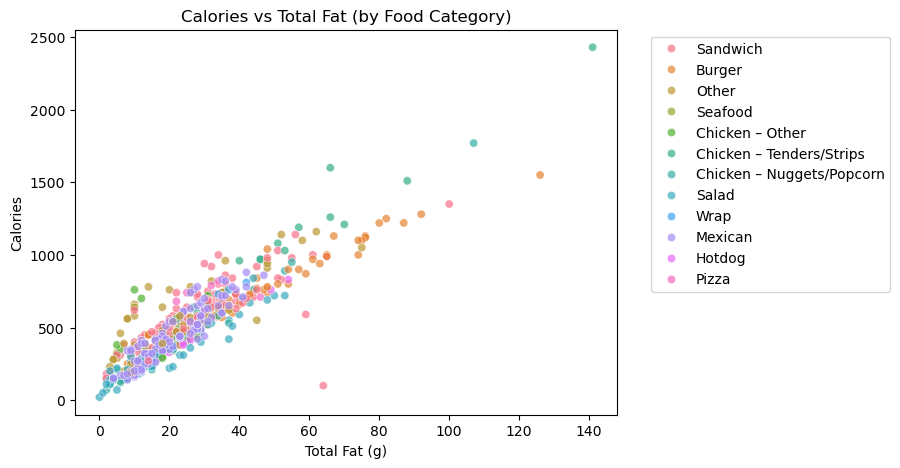

In [38]:
# Calories vs Total Fat

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="total_fat", y="calories", hue="food_category", alpha=0.7)
plt.title("Calories vs Total Fat (by Food Category)")
plt.xlabel("Total Fat (g)")
plt.ylabel("Calories")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

---

### Interpretation: Calories vs Total Fat (by Food Category)

---

**Strong Positive Correlation**  
  - The plot shows a clear upward trend: as total fat (g) increases, total calories increase proportionally.  
  - This makes sense nutritionally as fat is the most energy-dense macronutrient (9 kcal/g), so higher fat items almost always mean higher calorie items.  

---

**Category Spread**  
  - Most categories (burgers, sandwiches, Mexican, etc.) follow the same linear relationship.  
  - High-fat categories (burgers, loaded sandwiches, pizza) dominate the top-right region (>80g fat, 1500+ kcal).  
  - Lighter options (salads, wraps, seafood, small chicken items) cluster at the lower fat/lower calorie region.  


---

**Outliers**  
  - Some items exceed 100-140g fat and 2000+ kcal**. These are extreme "loaded/double" burgers or indulgent meals.  
  - These outliers distort balance, providing a single meal that exceeds an entire day’s worth of fat and calories.  

----

**Clinical Implications**  
  - This confirms fat is a major calorie driver in fast food.  
  - Choices labelled “crispy, loaded, deluxe” are very likely to land in the "danger zone" of this chart.  
  - Lower-calorie food categories (salads, wraps, grilled chicken) align with lower fat values, supporting dietary advice to pick these when possible.  

---

**Summary Insight:**  
Calories in fast food scale directly with fat content. High-fat items (burgers, loaded sandwiches, pizza) are the biggest caloric offenders, while grilled/lean foods (some sandwiches, seafood, salads) are at the lower end. For clients/patients, limiting “fat-heavy categories” is the most effective calorie control strategy.

---

---

## Calories vs Sodium (by Preparation Method)

---

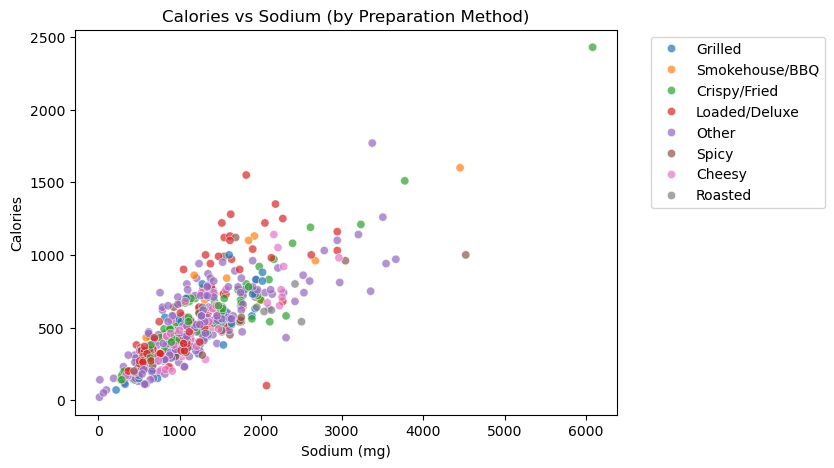

In [39]:
# Calories vs Sodium

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="sodium", y="calories", hue="prep_method", alpha=0.7)
plt.title("Calories vs Sodium (by Preparation Method)")
plt.xlabel("Sodium (mg)")
plt.ylabel("Calories")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

---

### Interpretation: Calories vs Sodium (by Preparation Method)

---

**General Trend:**  
  - There’s a loose positive relationship between sodium and calories as higher calorie foods tend to have higher sodium.  
  - However, the scatter is wide, meaning sodium often increases independently of calories. This reflects how sodium is heavily influenced by sauces, cheese, seasoning, and processing rather than just meal size.

---

**Preparation Method Insights:**  
  - **Crispy/Fried & Loaded/Deluxe items (greens, reds, oranges)** dominate the high-calorie and high-sodium region.  
  - **Grilled options (blues)** tend to cluster at lower calories and somewhat moderate sodium, though even grilled foods can reach >1500mg sodium.  
  - **Smokehouse/BBQ and Cheesy items** are consistently on the upper tiers of sodium, even when calories are moderate.  
  - **Spicy items** often carry extra sodium load (due to sauces/seasonings), visible in mid-calorie but high-sodium points.

---

**Outliers:**  
  - Some items exceed 5000-6000mg sodium while being just 1500-1800kcal. That’s 2–3 times the daily sodium recommendation in a single item, posing a critical health risk.  


---

**Clinical Implication:**  
  - Sodium does not scale linearly with meal size; even lower-calorie foods can be dangerously salty.  
  - Patients choosing "lighter" options may still exceed sodium limits if prep methods involve sauces (BBQ, spicy seasonings, cheese).  
  - Fast food sodium content is a hidden risk factor independent from calories.

---

**Summary Insight:**  
While calories and fat scale together, sodium is less predictable as it spikes across all prep methods. “Grilled” is safer for calories, but for sodium even grilled items can exceed recommended limits. Words like “Loaded,” “Cheesy,” “BBQ” almost guarantee high sodium regardless of calories.

---

---

## Calories vs Protein (by Restaurant)

---

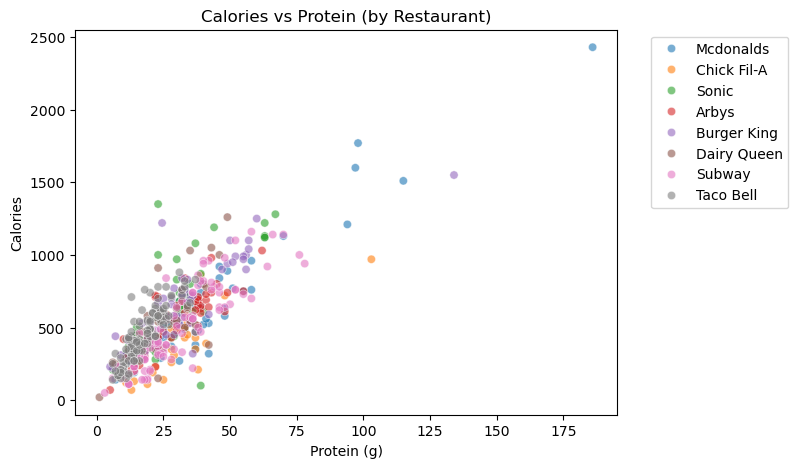

In [40]:
# Calories vs Protein

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="protein", y="calories", hue="restaurant", alpha=0.6)
plt.title("Calories vs Protein (by Restaurant)")
plt.xlabel("Protein (g)")
plt.ylabel("Calories")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

---

### Interpretation: Calories vs Protein (by Restaurant)

---

**General Trend:**  
  - There is a clear positive relationship: items with higher protein usually have higher calories.  
  - However, the slope is uneven as some foods deliver protein very efficiently (more protein per calorie), while others are calorie-heavy with only modest protein gains.  

---

**High-Protein Outliers:**  
  - A few items reach 100-180g protein and 1500-2400kcal.  
  - These are likely extreme portions (multi-patty burgers, double chicken subs, protein-stacked sandwiches).  
  - While they technically provide ample protein, the associated calorie load is unsustainably high for a single meal.  

---

**Restaurant Spread:**  
  - **Subway (pink dots)** and **Chick-fil-A (green dots)** items tend to sit higher in protein relative to calories, especially grilled chicken or protein bowls.  
  - **McDonald’s, Burger King, and Sonic (blue, brown, orange)** cluster in the middle as calories rise steeply, but the protein gain is moderate.  
  - **Taco Bell (light purple)** and **Dairy Queen (grey)** cluster lower as many items have fewer protein grams despite still having hefty calories (poor “protein bang-for-calorie buck”).  

---

**Clinical Implications:**  
  - Not all calories are equal: some restaurants (e.g., Subway, Chick-fil-A grilled items) give more protein for the calorie trade-off.  
  - Items from Taco Bell and Dairy Queen often show calorie-heavy but protein-light patterns, meaning they mostly contribute fat/carbs, not lean mass support.  
  - Foods marketed as “protein-packed” (subs, grilled chicken) can be reasonable choices if portions are controlled, whereas double/triple burgers give protein but also massive fat, sodium, and sat-fat loads.  

---

**Summary Insight:**  
Calories generally rise with protein, but efficiency differs greatly by restaurant. Subway and Chick-fil-A offer relatively higher protein per calorie, while Taco Bell and Dairy Queen lag behind. Mega-burgers and loaded sandwiches give extreme protein, but at the cost of excessive energy, fat, and sodium intake.

---

---
## Sodium across Food Categories

---

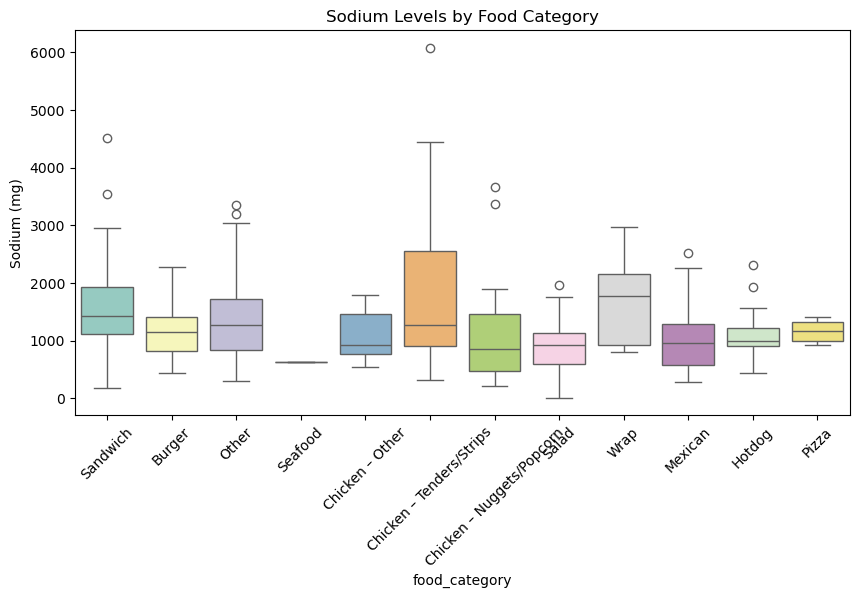

In [41]:
# Sodium across Food Categories

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="food_category", y="sodium", hue="food_category", palette="Set3", legend=False)
plt.title("Sodium Levels by Food Category")
plt.xticks(rotation=45)
plt.ylabel("Sodium (mg)")
plt.show()

---

### Interpretation: Sodium Levels (by Food Category)

---
    
**Overall Pattern:**  
  - Every food category shows substantial sodium content, with medians generally clustered between 800-1600mg per item.  
  - The WHO daily safe limit for sodium is 2300 mg/day meaning a single item from nearly any category can provide half or more of the daily recommended intake.  

---
 
 **Highest Sodium Categories:**  
  - **Chicken – Tenders/Strips** show the widest spread, with items exceeding 5000-6000mg sodium. These are extreme outliers and some of the saltiest items in the dataset.  
  - **Sandwiches, Burgers, and Pizza** consistently trend high as well, with many items crossing 2000-3000mg sodium.  
  - **Wraps** display a wide range, with some entries rivaling sandwiches in sodium load.  

---

**Moderate Categories:**  
  - **Salads, Mexican, Hotdogs, and Chicken Nuggets/Popcorn** have slightly lower medians compared to the “big three” (burgers, sandwiches, pizza).  
  - However, many still exceed 1000mg sodium per item, especially if topped with crispy chicken, cheese, or dressing.  


---

**Lower Category:**  
  - **Seafood** generally shows the lowest sodium medians, but even here, levels are far from “low sodium” (<150 mg).  

---

**Clinical Implications:**  
  - Sodium is elevated across all categories, making it impossible to avoid without conscious selection.  
  - Simply “choosing a different type of food” (e.g., nuggets vs sandwiches) does not guarantee safety as many still exceed the 50-75% of the daily guideline.  
  - The data shows portion size and preparation method (crispy/loaded) are stronger sodium risk drivers than category alone.  

---

**Summary Insight:**  
Fast food items, regardless of category, are consistently sodium-heavy. Chicken Tenders/Strips, Sandwiches, Burgers, and Pizza*are among the most sodium-dense categories, often putting consumers over daily sodium limits in a single serving. Even “lighter” foods (Salads, Wraps) can be sodium traps when paired with crispy proteins or heavy dressings.

---

---

## Calories across Preparation Methods (by Preparation Method)

---

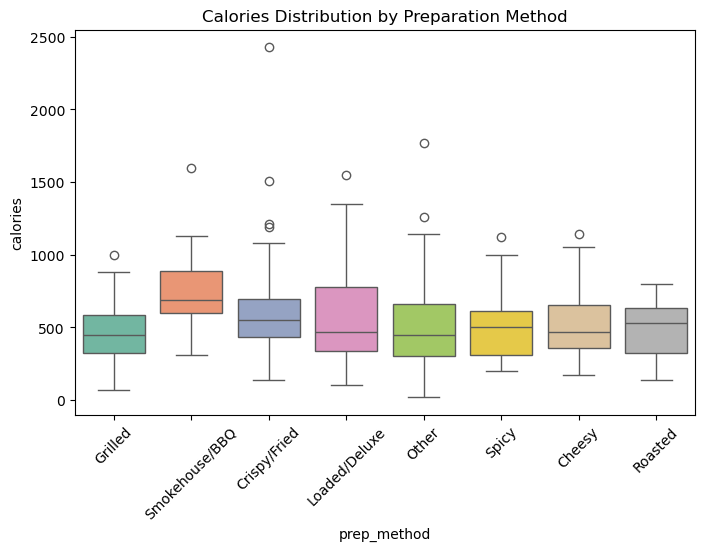

In [42]:
# Calories across Preparation Methods

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="prep_method", y="calories", hue="prep_method", palette="Set2", legend=False)
plt.title("Calories Distribution by Preparation Method")
plt.xticks(rotation=45)
plt.show()

---

### Interpretation: Calories Distribution (by Preparation Method)

---

**Grilled Foods**  
  - Median calories are lowest (350-450kcal).  
  - Interquartile range is tight (most items under 600kcal).  
  - Outliers exist, but these are generally lighter options compared to other prep methods.  

Clinical implication: Grilled remains the safest calorie choice.

---

**Smokehouse/BBQ & Loaded/Deluxe Items**  
  - Among the highest calorie medians (750-900kcal) with wide spreads.  
  - Outliers exceed 2000+ kcal per item, especially in stacked burgers, BBQ-loaded meals, and “deluxe/king” sandwiches.  

Clinical implication: These menu keywords essentially signal high-risk, calorie-dense foods.

---

**Crispy/Fried Items**  
  - Median higher than grilled (600–700 kcal) with many outliers above 1000 kcal.  
  - Crushing consistency: virtually all crispy options are calorie-heavy.  

Clinical implication: Clearly more calorie-dense than their grilled equivalents.

---

**Cheesy & Roasted**  
  - “Cheesy” items tend toward higher medians (600-700kcal), creep upward with toppings.  
  - “Roasted” items cluster closer to grilled, but still variable based on portion size and added sauces.  

---

**Spicy/Other**  
  - Sit in between crispy and grilled, usually moderate calories (400-700kcal), but variation depends on whether “spicy” is paired with fried vs grilled preparation.  

---

Summary Insight
- **Grilled = lowest calorie baseline** making it the best option for calorie-conscious eating.  
- **Crispy, Cheesy, BBQ/Smokehouse, and especially Loaded/Deluxe = the worst offenders**, consistently associated with high calorie content and wide ranges.  
- Menu descriptors are **nutritional warning labels in disguise**: if a food is marketed as “loaded,” “crispy,” “cheesy,” or “BBQ,” it almost always guarantees calorie excess.  

---

**Dietitian Insights:**  
Patients should be guided to **understand and read menu keywords** when choosing:  
- *Look for "grilled" or simple prep = lighter calorie load.*  
- *Avoid "crispy," "loaded," "cheesy," or "BBQ/Smokehouse" = calorie bombs every time.*  
This is the clearest visualization that food marketing terms directly map to nutrition risks.

---

---

## Calories vs Sugar (by Food Category)

---

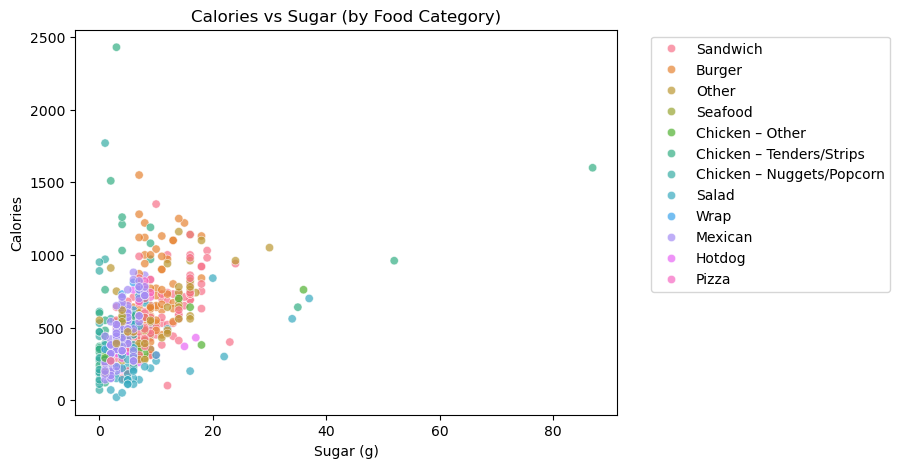

In [43]:
# Calories vs Sugar

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="sugar", y="calories", hue="food_category", alpha=0.7)
plt.title("Calories vs Sugar (by Food Category)")
plt.xlabel("Sugar (g)")
plt.ylabel("Calories")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()


---

### Interpretation: Calories vs Sugar (by Food Category)

---

**General Trend:**  
  - Most items have 0-20 g of sugar, clustering between 300-800 kcal.  
  - Calories do not strongly scale with sugar as many high-calorie entrées (burgers, pizzas, sandwiches) still have relatively low sugar content (5-15 g).  
  - This shows that in most fast-food items, fat and starch, not sugar, are the main calorie drivers.  

---

**Outliers:**  
  - A few items exceed 40-80g of sugar, while holding 600-1200kcal. These are beverages, shakes, and desserts.  
  - They represent “sugar bombs,” with sugar alone exceeding or tripling the WHO’s daily limit (25g added sugar/day).  

---

**Category Insights:**  
  - **Sandwiches, Burgers, and Mexican items** mostly sit in the low-sugar/moderate-calorie zone. Their calories come more from fats and refined carbs. 
  - **Salads** stay on the lower sugar end, unless paired with dressings.  
  - **Hotdogs and Pizza** cluster with low sugar but still moderate/high calories which reflects starch, sodium, and fat as key drivers instead.  
  - **Dessert-type or beverage categories (not shown clearly as a separate group here)** form outliers with both extremely high sugar and high calorie levels.

---

**Clinical Perspective:**  
  - Entrées: Calories are high even at modest sugar levels which means there are “hidden calories” from fat and starch.  
    - Desserts/Drinks: Deliver huge amounts of sugar, easily exceeding WHO daily limits in one serving.  

---

**Summary Insight:**  
Fast-food entrées (burgers, pizza, sandwiches) are calorie-dense but not high-sugar, while desserts and beverages are extreme outliers, combining high calories and excessive sugar. For clients, the biggest sugar risks come not from the meals but from drinks, shakes, and add-ons.

---

**Note:**
Most of the “carbohydrates” in fast-food entrées come from refined starches such as burger buns, tortillas, pizza crusts, and fries rather than fiber or fruits/vegetables. This matters clinically because refined starches:  
- Digest quickly and leads to spike blood glucose.  
- Provide calories without fiber or micronutrients and give poor satiety.  
- Contribute to overall calorie excess without the nutritional benefits of whole foods.

---

---

## Calories vs Total Carbohydrates (by Food Category)

---

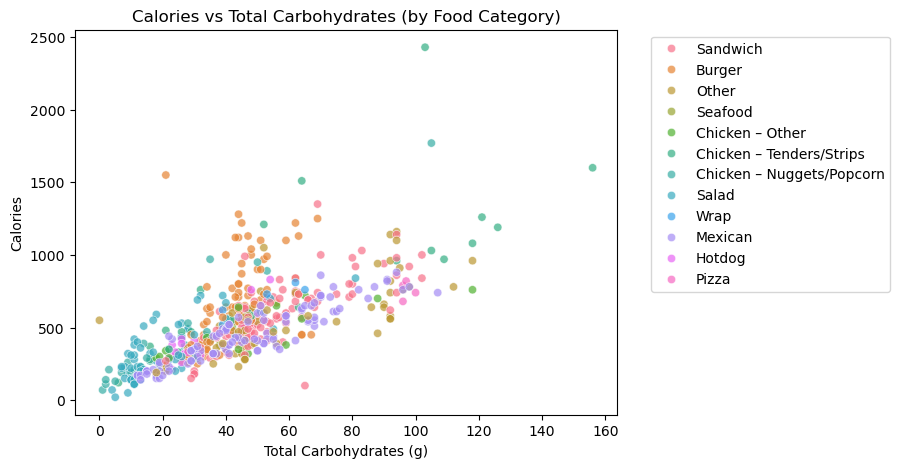

In [44]:
# Calories vs Carbohydrates

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="total_carb", y="calories", hue="food_category", alpha=0.7)
plt.title("Calories vs Total Carbohydrates (by Food Category)")
plt.xlabel("Total Carbohydrates (g)")
plt.ylabel("Calories")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

---

### Interpretation: Calories vs Total Carbohydrates (by Food Category)

---
**General Trend:**  
  - There is a positive relationship: as carbohydrate grams increase, calories also increase.  
  - However, calories are not determined by carbs alone as fat and protein also contribute. Many items with moderate carbs can still be very high in calories.

---

**Clusters by Category:**  
  - **Pizza, Mexican, and Sandwiches** are strongly carb-driven categories → often 50–100+ g carbs and 600-1200kcal.  
  - **Burgers** show moderate carb counts (mostly from buns and sides) but still high calorie totals, showing a larger fat contribution.  
  - **Chicken items (nuggets, tenders, other)** tend to cluster lower in carbs (10-40 g) but still fairly high in calories as the calories mostly come from fat.  
  - **Salads** sit at the lower-carb end unless loaded with toppings or croutons.  
  - **Wraps** and **Hotdogs** fall into the low-to-moderate carb range (20-50g), but calories vary with fillings and added fats.  

---

**Outliers:**  
  - A few extreme carb-heavy items reaching >150 g carbs (e.g., Mexican burritos, mega-sized sandwiches/pizzas). These also top 2000+ kcal, making them major calorie contributors in the dataset.  

---

**Clinical Implications:**  
  - **High-carb items** (burritos, pizzas, subs) lean toward refined starches i.e, high energy density with poor fiber.  
  - **Low-carb entrées** (like fried chicken or burgers without sides) are not necessarily healthier, since they compensate with calories from fat.  

---

**Summary Insight:**  
Calories scale with carbs, but the source of calories differs by food type. Carb-heavy categories (Mexican, Pizza, Sandwiches) pile on starch, while Burgers and Chicken derive calories more from fat. Portion size and carb source (refined vs fiber-rich) are the key nutrition levers here.

---

---

## Sodium vs Protein (by Preparation Method)

---

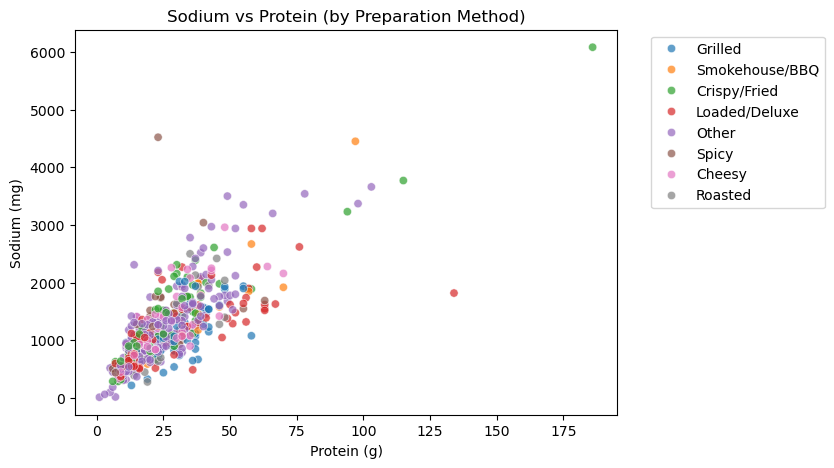

In [45]:
# Sodium vs Protein

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="protein", y="sodium", hue="prep_method", alpha=0.7)
plt.title("Sodium vs Protein (by Preparation Method)")
plt.xlabel("Protein (g)")
plt.ylabel("Sodium (mg)")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

---

### Interpretation: Sodium vs Protein (by Preparation Method)

---

**General Trend:**  
  - There is a clear upward association: as protein increases, sodium also tends to increase.  
  - However, sodium climbs much faster than protein in many menu items. In other words: to get more protein at fast food chains, you almost always pay the price in sodium.  

---

**Preparation Method Insights:**  
  - **Grilled items (blue)**: Show moderate protein (20-50g) but still fairly high sodium, often in the 1000-2000mg range. Even healthier cooking methods come with a lot of seasoning/sauces.  
  - **Crispy/Fried (green)**: Show similar or slightly higher sodium loads compared to grilled, but calories are also higher (because fried = fat + sodium).  
  - **Loaded/Deluxe (pink) and Smokehouse/BBQ (orange):** These dominate the upper right quadrant. They pack ≥50 g protein but often 2000-4000mg sodium** in a single meal.  
  - **Cheesy (brownish)**: Add-ons like cheese escalate sodium even in items that aren’t high protein.  
  - **Spicy/Other/BBQ flavors:** Often amplify sodium even more as flavor = salt + sauces.  

---

- **Outliers:**  
  - Some extreme items exceed 150-180g protein and >5000mg sodium.  
  - These are enormous sandwiches, family meat platters, or multi-patty “stacker” burgers. These are essentially a full day’s sodium in a single dish.  

---

- **Clinical Implications:**  
  - Most high-protein fast-food items are sodium bombs.  
  - Choosing grilled over fried saves calories/fat, but does not save sodium as seasoning and sauces keep sodium dangerously high.  

---

**Summary Insight:**  
At fast-food restaurants, more protein almost always means more sodium. Grilled protein is nutritionally better for fat and calories, but sodium overload is nearly unavoidable across prep types. “High protein” in fast food equals hidden high sodium risk.

---

---
## Sugar vs Sodium ( by Food Category)

---

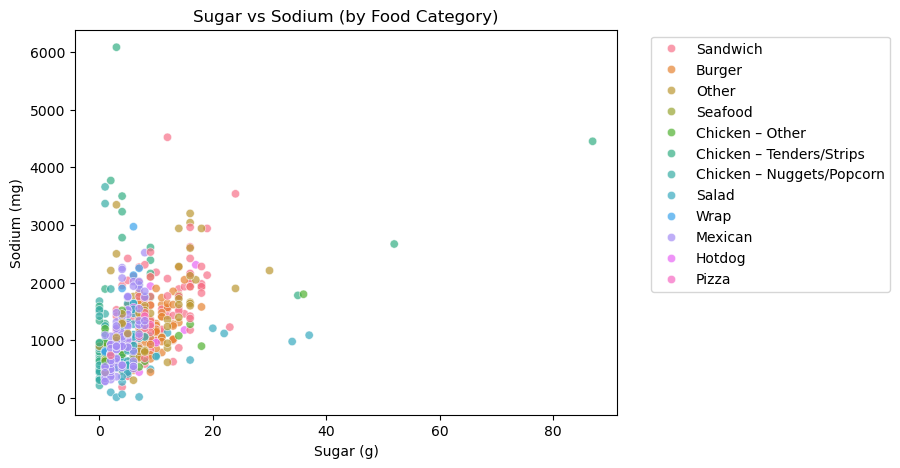

In [46]:
# Sugar vs Sodium

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="sugar", y="sodium", hue="food_category", alpha=0.7)
plt.title("Sugar vs Sodium (by Food Category)")
plt.xlabel("Sugar (g)")
plt.ylabel("Sodium (mg)")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

---

### Interpretation of Sugar vs Sodium ( by Food Category)

---

**General Pattern:**  
  - Most items cluster with low sugar (0-15g) but high sodium (800-2000mg).  
  - A smaller group of outliers have very high sugar (>40-80g) but relatively low sodium.  
  - This shows two distinct risk types:  
    - **Entrées = Sodium bombs**
    - **Desserts/Drinks = Sugar bombs**

---

**Category Insights:**  
  - **Sandwiches, Burgers, Pizza, Mexican, Chicken items** are concentrated in the high-sodium, low-sugar zone. Calories in these categories come mainly from fat + starch with heavy salt.  
  - **Salads** vary: when topped with crispy chicken or dressings they move into the high sodium cluster, but sugars stay low. Dressings may push a little sugar, but sodium dominates.  
  - **Dessert/drink outliers** (milkshakes, sweetened drinks, some wraps with sauces) show 80+g of sugar but sodium much lower (under 1000mg).  

---

**Outliers:**  
  - **Ultra-salty entrées**: Some chicken strip/tender meals exceed 5000–6000 mg sodium despite low sugar (<10g).  
  - **Sugar bombs**: Some outliers like shakes cross 80g sugar (20 teaspoons) in one serving, exceedimg the WHO 25 g/day limit.

---

**Clinical Implications:**  
  - Most fast food entrées overload sodiumbut don’t look high in sugar. Patients may believe “it’s not sweet, so it’s healthier” but the salt content is extreme.  
  - Desserts and beverages flip the risk: very high sugar, less sodium, but still poor for cardiometabolic health.  

---

**Summary Insight:**  
Fast food falls into two camps:  
- **Meals** = sodium bombs (low sugar, high salt).  
- **Drinks/Desserts** = sugar bombs (high sugar, moderate salt).  

Neither is nutritionally safe, they just harm health in different ways (hypertension vs diabetes/weight gain).\

---

---

## Fiber vs Carbohydrates (by Food Category)

---

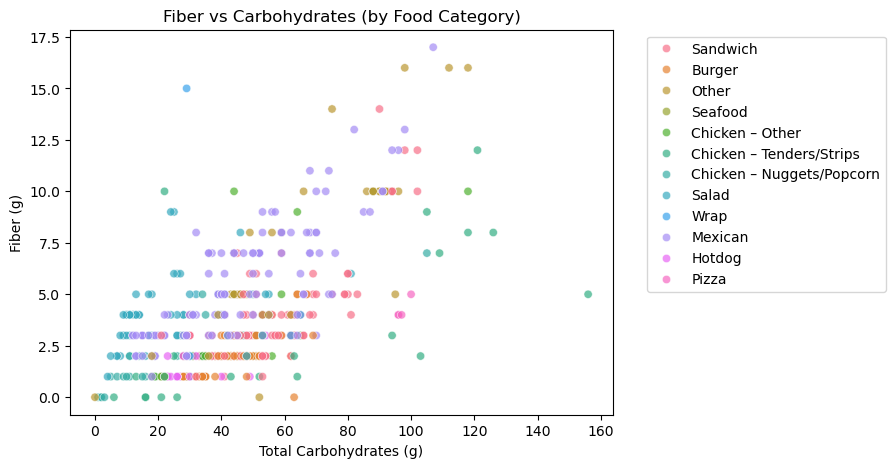

In [47]:
#  Fiber vs Carbohydrates

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="total_carb", y="fiber", hue="food_category", alpha=0.7)
plt.title("Fiber vs Carbohydrates (by Food Category)")
plt.xlabel("Total Carbohydrates (g)")
plt.ylabel("Fiber (g)")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

---

### Interpretation: Fiber vs Carbohydrates (by Food Category)

---

**General Trend:**  
  - Most items are low in fiber despite high carbohydrate content.  
  - The majority cluster between 30-80g carbs with only 2-5g fiber. This shows that fast‑food carbs are primarily refined starches (white breads, buns, tortillas, crusts, fries) rather than whole-food, high-fiber sources.  

---

**Positive Outliers:**  
  - A few items (likely bean burritos, veggie-heavy wraps, or certain salads) contain 10–15+g fiber, with carb content also high.  
  - These are rare exceptions and not representative of the menu at large.  

---

**Category Insights:**  
  - **Sandwiches, Pizza, Mexican foods**: Tend to have high carbs (50-100g) but fiber rarely over 5-7 g. This means refined flour base with little whole grain. 
  - **Salads and wraps**: Sometimes show slightly better fiber ratios but still often under expectations unless intentionally “veggie-heavy.”  
  - **Burgers and chicken items**: Generally low carb/low fiber unless paired with starchy buns/fries.  

---

**Clinical Implications:**  
  - The carb-to-fiber ratio here is very poor. Nutritionally, healthy carb sources should have at least 1 g fiber per 10 g carbs.  
  - In fast food, the carbs are usually without fiber, which promotes blood sugar spikes and low satiety.  
  - Patients eating fast food will struggle to reach recommended fiber intake (25-30g/day) unless they supplement heavily with fruits, veggies, and whole grains elsewhere.

---

**Summary Insight:**  
Most fast‑food carbohydrate items are nutritionally poor quality carbs: high starch, low fiber. While a few exceptions (bean burritos, veggie wraps, fiber-rich salads) provide meaningful fiber, the majority of items deliver carbs without benefits, reinforcing the dietitian message: *fast food = refined carbs that don’t keep you full or support long‑term digestive health.*

---

---

## Calories vs Portion Size (by Food Category)

---

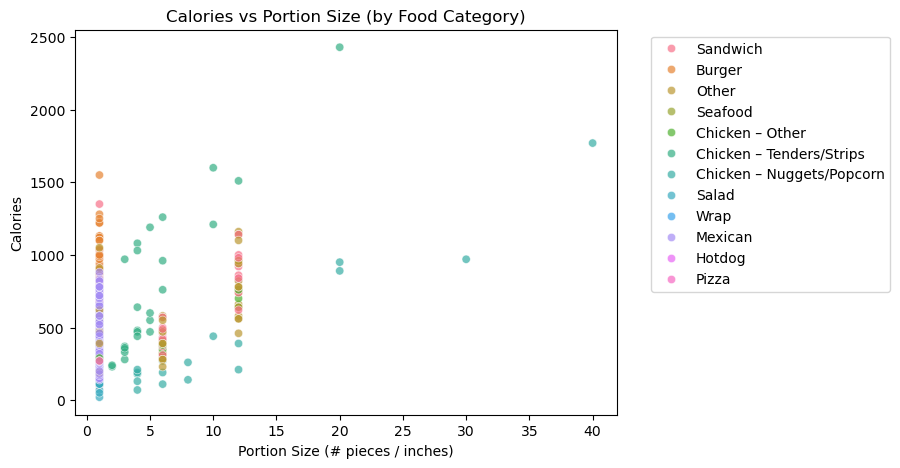

In [48]:
# Calories vs Portion Size

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="portion_size", y="calories", hue="food_category", alpha=0.7)
plt.title("Calories vs Portion Size (by Food Category)")
plt.xlabel("Portion Size (# pieces / inches)")
plt.ylabel("Calories")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

---

### Interpretation: Calories vs Portion Size (by Food Category)

---

**General Trend:**  
  - Clear upward relationship: as portion size increases, calories per item also increase.  
  - Larger packs (e.g., 10, 20, 30, 40 chicken nuggets/tenders, or footlong subs vs 6-inch) are direct calorie escalators.  

---

**Clusters:**  
  - Many standard single-serving items (portion size = 1) fall in the 400-800kcal range (burgers, individual sandwiches, salads, wraps).  
  - **Nuggets/strips** form distinct clusters at 4, 6, 10, 20 pieces, with calories climbing proportionally. For example:  
    - 6-piece = 300-500kcal  
    - 20-piece = 900-1200+kcal  
    - 40-piece outliers approach **2000+ kcal**.  
  - **Subway subs** show portion jumps: 6-inch vs 12-inch Footlong which is  almost exactly double the calories (portion equals linear calories).  

---

- **Outliers:**  
  - Mega-portion products (30-40 nuggets, extra-large value meals) push 1500-2500 kcal from sheer quantity, not recipe differences.  
- **Category Insights:**  
  - **Burgers, Pizza, Sandwiches, Wraps** → usually portion size = 1, but calories vary widely from 300 to 1500 depending on "regular vs deluxe/double stack."  
  - **Chicken categories (nuggets, strips, tenders)** → highlight the portion effect most clearly — calories rise with every extra piece ordered.  

---

- **Clinical Implications:**  
  - Nutrient density per piece/unit is fairly stable (a nugget equals 50 kcal), but ordering larger portions creates extreme caloric overload.  
  - This compromises appetite control as marketing large portions encourages overeating without changing the food itself.  

---

**Summary Insight:**  
Fast-food recipes are calorie-dense by default, but what truly drives extreme calorie intake is portion inflation. Whether it’s upgrading from 6 to 20 nuggets or from a 6-inch to a Footlong sub, doubling portion size almost always equal to doubling calories. The biggest calorie risks come not from individual items, but from bigger portion sizes marketed as “value.”

---

---

## Calories vs Fiber (by Food Category)

---

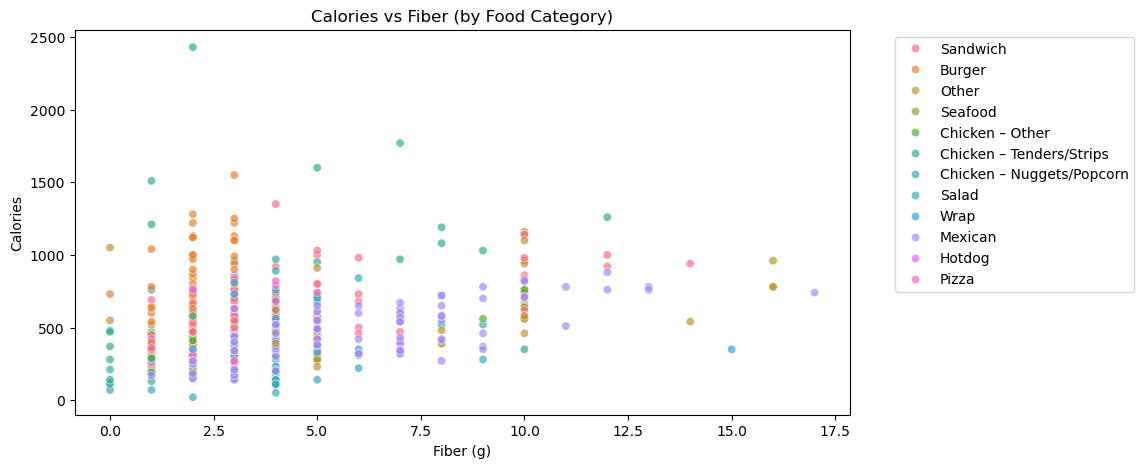

In [49]:
# Calories vs Fiber

plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="fiber", y="calories", hue="food_category", alpha=0.7)
plt.title("Calories vs Fiber (by Food Category)")
plt.xlabel("Fiber (g)")
plt.ylabel("Calories")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

---

### Interpretation: Calories vs Fiber (by Food Category)

---

**General Trend:**  
  - There is no strong positive relationship between calories and fiber.  
  - Many high-calorie items (>1000kcal) still provide only 2-5g of fiber, which is minimal compared to dietary needs.  
  - This disconnect highlights that higher-calorie foods rarely provide meaningful fiber benefits.  

---

**Clusters:**  
  - The majority of menu items cluster between 1-5g fiber and 300-800kcal (burgers, sandwiches, pizza, Mexican entrées).  
  - Salads and Mexican items (burritos, bean-based) show some higher-fiber outliers (10-16g), but these are exceptions rather than the norm.  
  - Burgers, Chicken, and Pizza remain consistently low in fiber despite varied calorie content.  

---

**Outliers:**  
  - A handful of items hit 10-17g fiber likely bean burritos, veggie wraps, or fiber-rich salads.  
  - However, these are rare; the vast majority of fast-food items fail to deliver even half a day’s recommended fiber.  

---

**Dietary Reference:**  
  - Adults should get 25-30g fiber/day. Most items here only provide about 10-20% of the daily requirement, and many provide almost none.  

---

**Clinical Implications:**  
  - Fast-food calories do not come with fiber and results in high energy intake without satiety.  
  - Long-term, this contributes to overeating, poor blood sugar control, constipation, and increased chronic disease risk.  

---

**Summary Insight:**  
Fast food is energy-rich but fiber-poor. Even high-calorie items do not deliver proportional fiber, with only a few bean/veggie-heavy products as exceptions. This confirms that fast food contributes calories without protective nutrients, reinforcing why it should be paired with fiber-rich whole foods outside of the menu.

---

---

## Calories vs Saturated Fat (by Food Category)

---

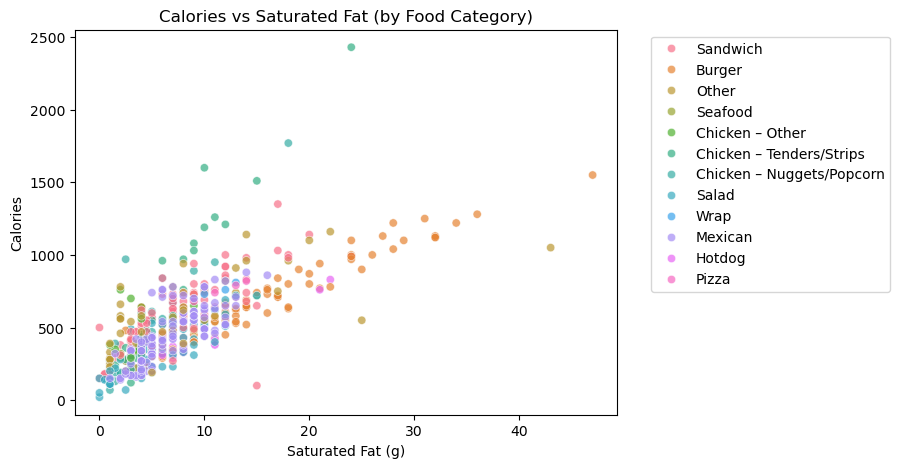

In [50]:
# Calories vs Saturated Fat

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="sat_fat", y="calories", hue="food_category", alpha=0.7)
plt.title("Calories vs Saturated Fat (by Food Category)")
plt.xlabel("Saturated Fat (g)")
plt.ylabel("Calories")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

---


### Interpretation: Calories vs Saturated Fat (by Food Category)

---

**General Trend:**  
- There is a strong **positive relationship**: as saturated fat increases, calories also rise.  
- This matches nutrition science since fat is the most calorie-dense macronutrient (9 kcal/g).  

---

**Clusters:**  
- **Salads & Seafood**: Tend to stay at the lower end (0–5 g saturated fat, 200–400 kcal).  
- **Sandwiches, Burgers, Pizza, Wraps, Hotdogs**: Spread across mid-to-high ranges of both calories and sat fat (400–1200 kcal, 5–25 g sat fat).  
- **Chicken items (nuggets, tenders, strips)**: Scatter widely in the middle; fried/breaded versions add higher fat and calories.  
- **Mexican entrées** → Often moderate-to-high calories with noticeable saturated fat, falling among burgers and pizza.  

---

**Outliers:**  
- A handful of extreme items exceed **2000+ calories** and **40+g saturated fat**, representing oversized combo meals, extra-cheese pizzas, or large burgers.  
- These outliers are far above typical daily recommended limits for saturated fat (20g/day for a 2,000kcal diet).  

---

**Category Takeaways:**  
- **Low sat fat & calories**: Salads, seafood, and some lighter chicken options.  
- **High sat fat & calories**: Burgers, pizza, hotdogs, and some Mexican entrées.  
- **Mid-tier but sneaky**: Sandwiches and wraps can range from light to deceptively heavy depending on fillings and sauces.  

---

**Clinical Implications:**  
- Saturated fat strongly drives up calorie load in fast food items.  
- Regular consumption of high-sat-fat meals increases risks for **weight gain, cardiovascular disease, and LDL cholesterol elevation**.  
- Even moderate-calorie meals may push daily sat fat intake past recommended limits if eaten multiple times in a day.  

---

**Summary Insight:**  
Fast food categories show a **calorie–fat gradient**:  
- Lighter options (salads, seafood) cluster at the low end.  
- Main entrées (burgers, pizza, Mexican, chicken) span a wide mid-to-high calorie and saturated fat range.  
- Extreme items (giant burgers/pizzas) become statistical and nutritional **outliers**, far exceeding healthy intake thresholds.  

In short: **the fattier the food, the heavier the calorie load and burgers/pizza are the biggest offenders**.

---

---

## Fiber vs Calories (by Food Category)

---

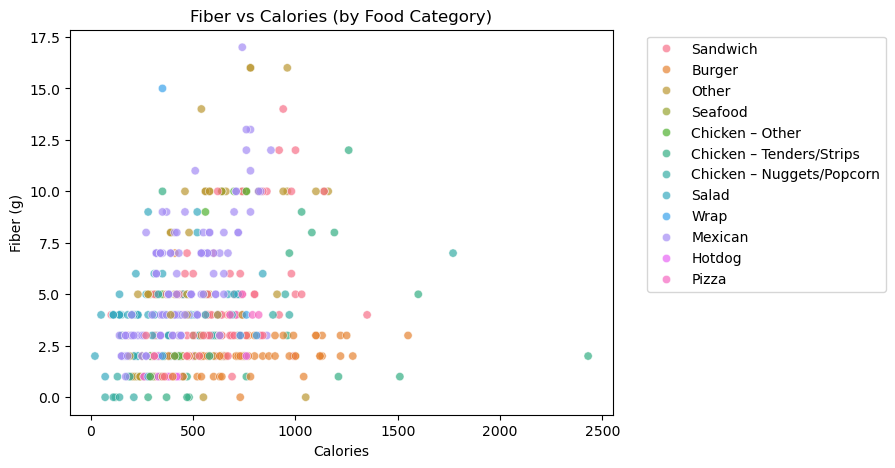

In [51]:
#  Fiber vs Calories

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="calories", y="fiber", hue="food_category", alpha=0.7)
plt.title("Fiber vs Calories (by Food Category)")
plt.xlabel("Calories")
plt.ylabel("Fiber (g)")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

---

### Interpretation: Fiber vs Calories (by Food Category)

---

**General Trend:**  
  - There’s no strong correlation between calories and fiber.  
  - Many calorie-dense foods (800-2000 kcal) still provide only 2-5g of fiber, which is minimal compared to daily needs.  
  - This shows that calorie increases in fast food do not translate into better nutrient density (more energy ≠ more fiber).  

---

**Clusters:**  
  - Most items cluster in the low fiber (0–5 g) range, across calorie levels from 300 up to 1500kcal.  
  - Even high-calorie burgers, pizza, and crispy chicken meals rarely exceed 5g of fiber.  
  - Mexican items and Salads are the main exceptions, occasionally reaching 10-17g of fiber, especially bean burritos or veggie-heavy entrées.  

---

**Outliers:**  
  - A few items with high fiber (12-17g) are likely bean-based burritos, fiber-rich wraps, or heavily veggie salads.  
  - However, these are rare compared to the volume of low-fiber items.  

--

**Dietary Reference Context:**  
  - Adults need 25-30g of fiber daily.  
  - Most fast-food items here contribute less than 20% of daily need, even when they provide a full meal’s worth of calories.  
  - Some large items actually provide a whole day’s worth of calories with less than 10% of daily fiber.  

---

- **Category Takeaways:**  
  - Burgers, Pizza, Sandwiches, Chicken items: Consistently poor fiber return for high calories.  
  - Salads & Mexican burritos (esp. bean-based): Can deliver moderate–high fiber but often still calorie-dense.  

---

**Clinical Implications:**  
  - Fast food is energy-dense but nutrient-poor, especially for fiber.  
  - Low fiber intake contributes to poor satiety, higher risk of overeating, elevated blood sugar swings, constipation, and cardiovascular risk.  


---

**Summary Insight:**  
Most fast-food items deliver high calories without fiber, reinforcing the concept of “empty calories.” Only bean- or veggie-rich items (burritos, salads, wraps) provide modest fiber, but these are exceptions. Clinically, this shows why relying solely on fast food makes it nearly impossible to meet recommended fiber intake.

---

---

## Sugar vs Calories (by Food Category)

---

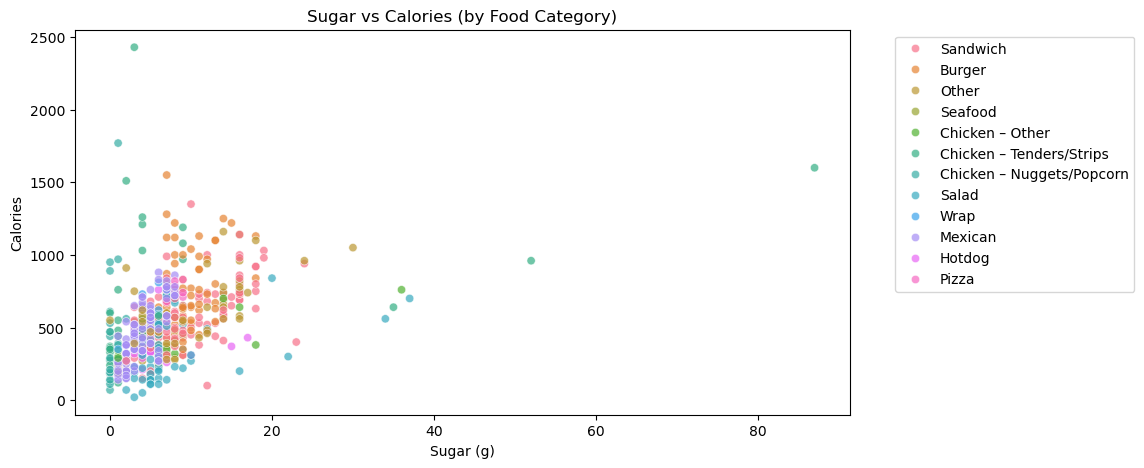

In [52]:
# Sugar vs Calories by Food Category (Grouped)

plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="sugar", y="calories", hue="food_category", alpha=0.7)
plt.title("Sugar vs Calories (by Food Category)")
plt.xlabel("Sugar (g)")
plt.ylabel("Calories")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

---

### Interpretation: Sugar vs Calories (by Food Category)

---
    
**General Trend:**  
  - Most fast-food items cluster at low sugar (0–15 g) regardless of calories.  
  - Many high-calorie entrées (600–1200 kcal) still have relatively little sugar. Their calories come mostly from fat and refined starch, not added sugars.  

---

**Clusters:**  
  - Sandwiches, Burgers, Pizza, Chicken items are crowded around lower sugar values but a wide calorie spread. Example:  
    - Burger with 800-1000kcal and only 8-12g sugar.  
    - Pizza slices and Mexican entrées similarly calorie-dense but low on sugar contribution.  
  - Salads are also in the low sugar range unless dressing adds lift.  
  - Dessert/drink items (the outliers) show very high sugar (40-80+g) and moderate-to-high calories (600-1000kcal).  

---

**Outliers:**  
  - One or two extreme items exceed 70-90g sugar, aligning with milkshakes, sundaes, or sweetened beverages.  
  - These single items surpass 3× the WHO daily sugar limit (25g/day).  

---

**Category Takeaways:**  
  - Entrées equals High calories, low sugar. “The fat/salt bombs.”  
  - Desserts/shakes equals High sugar, moderate calories. “The sugar bombs.”  
  - Rarely do items combine both very high calories and very high sugar, but the risk stacks when meals + drinks are paired.

---

**Clinical Implications:**  
  - Calories and sugar are generally not proportional in fast food as calories rise from fat/starch, while sugar spikes are concentrated in drinks/desserts.  
  - A consumer may think choosing a shake over a burger is “lighter,” but it still overshoots healthy sugar recommendations.  

---

**Summary Insight:**  
Fast food splits into two:  
- Main meals (burgers, pizza, Mexican, chicken, sandwiches): which are calorie-heavy but minimal sugar; risks come from fat and sodium.  
- Desserts & shakes:sugar-heavy, blowing past WHO limits in a single serving.  

Together in one sitting (e.g., burger + fries + soda), they create a full spectrum of health risks.

---

---

## Average Calories per Item (by Restaurant)

---

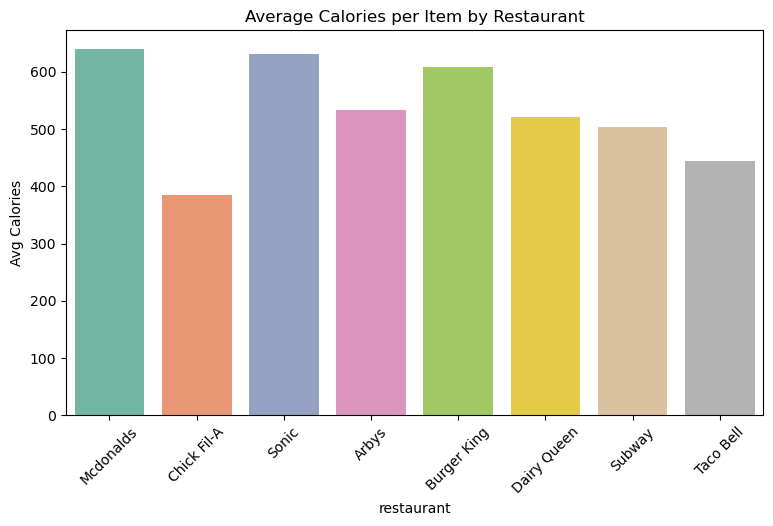

In [53]:
# Calories by restaurant

plt.figure(figsize=(9,5))
sns.barplot(data=df, x="restaurant", y="calories", estimator=np.mean, errorbar=None, hue="restaurant", palette="Set2", legend=False)     
plt.title("Average Calories per Item by Restaurant")
plt.xticks(rotation=45)
plt.ylabel("Avg Calories")
plt.show()

---

### Interpretation: Average Calories per Item by Restaurant

---
    
**General Pattern:**  
  - Average calories per menu item vary significantly by restaurant (roughly 380-650kcal).  
  - No chain is truly “low-calorie,” but some are less calorie-dense on average than others.  

---

**Highest Average Calories:**  
  - **McDonald’s (650kcal)** and **Sonic (630kcal)** top the list.  
     - McDonald’s: driven by burgers, loaded sandwiches, breakfast platters.  
     - Sonic: calorie-heavy shakes, burgers, and fried sides inflate averages.  
  - **Burger King (610kcal)** also shows consistently higher average calories per item, reflecting “king-size” and loaded sandwich design.  

---

**Lower Average Calories:**  
  - **Chick-Fil-A (380kcal)** has the lowest averages due to smaller portion chicken entrées and slimmer menu design.  
  - **Taco Bell (390kcal)** also averages lower, reflecting individually smaller items, though combos can easily exceed 1000 kcal.  

---

**Middle Range (500–550kcal):**  
  - **Arby’s, Subway, Dairy Queen** cluster in this zone.  
     - Arby’s: Roast beef sandwiches moderately high.  
     - Subway: Smaller 6-inch subs balance out with lighter items but can double to 12-inch high-calorie options.  
     - Dairy Queen: Mix of burgers, sandwiches, and ice creams average out.  

---

**Clinical Implications:**  
  - Even at the “lighter” chains (Chick-fil-A, Taco Bell), calories can scale up quickly with add-ons, combos, or upsized portions.  
  - Chains with higher averages (McDonald’s, Burger King, Sonic) make portion control more challenging by default.  

---

**Summary Insight:**  
On average:  
- **McDonald’s, Sonic, and Burger King** serve the highest-calorie items.  
- **Chick-fil-A and Taco Bell** average lower calories per item, but combining multiple small entrées adds up fast.  
- Nearly all chains position their menus so that **a single item = 1/3 of daily calorie needs**, reinforcing the importance of mindful portion choices.

---

---

## Average Sodium per Item (by Restaurant)

---

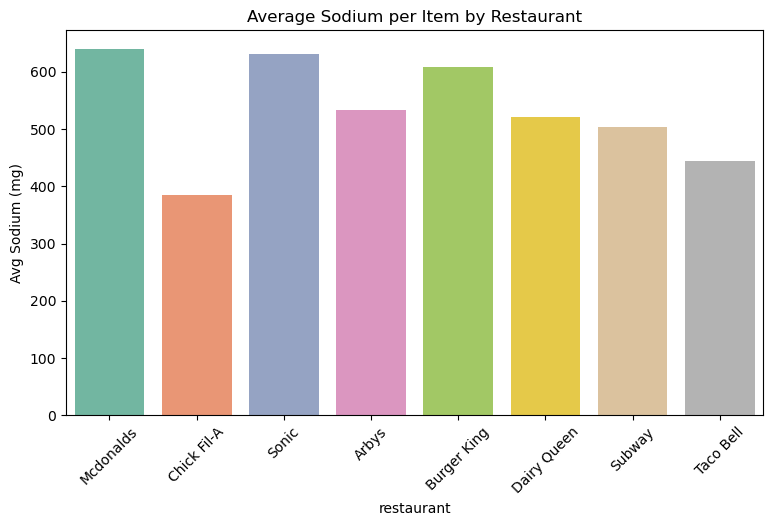

In [54]:
# Sodium by restaurant

plt.figure(figsize=(9,5))
sns.barplot(data=df, x="restaurant", y="calories", estimator=np.mean, errorbar=None, hue="restaurant", palette="Set2", legend=False)
plt.title("Average Sodium per Item by Restaurant")
plt.xticks(rotation=45)
plt.ylabel("Avg Sodium (mg)")
plt.show()

---

### Interpretation: Average Sodium per Item (by Restaurant)

---
    
**Overall Pattern:**  
 - All restaurants average **400–650mg sodium per item**, meaning each single item already contributes **20–30% of the daily recommended limit (2300mg/day)**.  
- Confirms sodium is **universally high across all fast-food chains** as no chain offers truly low-sodium items on average.

---
    
**Highest Sodium Averages (600-650mg):**  
- **McDonald’s & Sonic** are consistently the saltiest on average, with burgers, sides, and fried items pushing sodium levels upward.  
- **Burger King** also falls high due to sandwich builds, cheeses, and processed meats.

---

**Middle Range (500-550mg):**  
- **Arby’s, Dairy Queen, Subway** still very high, with cold cuts, sauces, roast meats, and fried foods keeping sodium heavy.  

---

**Lowest Relative Sodium (400–450mg):**  
- **Chick-Fil-A** and **Taco Bell** havesomewhat lower averages, but not genuinely “low” sodium. Small tacos or sandwiches reduce per-item averages, yet combo meals still pile sodium past safe levels.  

---

**Clinical Implications:**  
- Even the lowest averages still equal **20% of the daily sodium allowance in ONE item**.  
- A normal fast-food meal (entrée + side + drink) = **well above the daily sodium limit**.  

Conclusion: No chain is a safe sodium choice, the only real way to control is **portion size + skipping salty sides/sauces**.

---

**Summary Insight:**  
- **Most Salty:** McDonald’s, Sonic, Burger King.  
- **Somewhat Lower:** Chick-Fil-A, Taco Bell.  
- Regardless of brand, sodium remains **excessive**, and eating more than one item will **exceed daily safe intake levels**.

---

---

## Average Sugar per Item (by Restaurant)

---

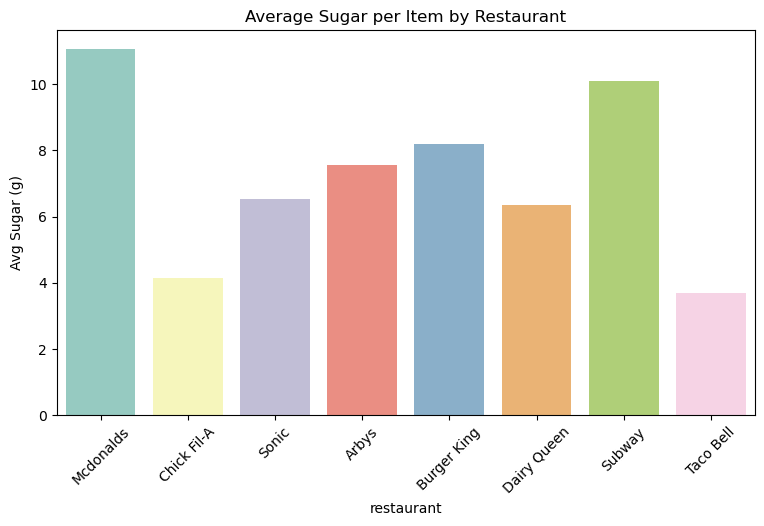

In [55]:
# Sugar by restaurant

plt.figure(figsize=(9,5))
sns.barplot(data=df, x="restaurant", y="sugar", estimator=np.mean, errorbar=None, hue="restaurant", palette="Set3", legend=False)   
plt.title("Average Sugar per Item by Restaurant")
plt.xticks(rotation=45)
plt.ylabel("Avg Sugar (g)")
plt.show()

---

### Interpretation: Average Sugar per Item (by Restaurant)

---
    
**General Pattern:**  
  - Sugar content varies more widely by chain compared to calories and sodium.  
  - Some restaurants average twice the sugar per item compared to others, largely due to menu mix (desserts vs entrées).  

---

**Highest Averages:**  
  - **McDonald’s (11g/item):** Driven by milkshakes, ice creams, desserts, sweetened buns, and sauces.  
  - **Subway (10g/item):** Sandwich sauces, sweet onion dressings, and bread recipes inflate sugar content even in savory items.  
  - **Burger King (8g/item):** Includes shakes, desserts, and sweet bread components.  

---

**Moderate Averages (6–8g):**  
  - **Arby’s and Dairy Queen:** Both balance salty entrées with dessert-heavy items, landing them in the mid‑sugar zone.  

---

**Lowest Averages:**  
  - **Chick‑Fil‑A (4g/item)** and **Taco Bell (~3–4 g/item):** Average lowest per item, reflecting menus more focused on savory starch and sodium than desserts.  
  - However, Taco Bell can still create sugar spikes in drinks/dessert add‑ons.  

---

**Clinical Implications:**  
  - Even “savory” meals can contain surprising sugar especially at McDonald’s and Subway, where sauces/breads add hidden sugar.  
  - WHO recommends ≤25 g added sugar per day. Eating just 2–3 average fast-food items at McDonald’s/Subway could exceed this, even before sodas/desserts.  

---

**Summary Insight:**  
- **McDonald’s and Subway** average the most sugar per item (hidden sugars in sauces, breads, and desserts).  
- **Chick‑fil‑A and Taco Bell** average the least, but remain risky due to high sodium/fat instead.  
- Sugar risks in fast food come not only from desserts and shakes but also from *stealth ingredients* in savory items.

---

---

## Proportion of Items Exceeding Health Limits (by Preparation Method)

---

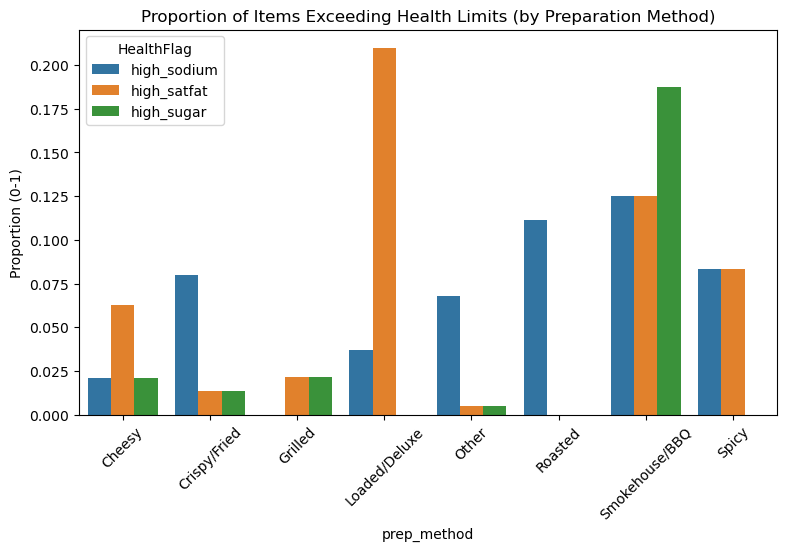

In [56]:
# Health Flags vs Prep Method

plt.figure(figsize=(9,5))
flag_counts = df.groupby("prep_method")[["high_sodium","high_satfat","high_sugar"]].mean().reset_index()
flag_counts_melt = flag_counts.melt(id_vars="prep_method", value_vars=["high_sodium","high_satfat","high_sugar"], var_name="HealthFlag", value_name="Proportion")
sns.barplot(data=flag_counts_melt, x="prep_method", y="Proportion", hue="HealthFlag")
plt.title("Proportion of Items Exceeding Health Limits (by Preparation Method)")
plt.xticks(rotation=45)
plt.ylabel("Proportion (0-1)")
plt.show()

---

###  Interpretation: Proportion of Items Exceeding Health Limits (by Preparation Method)

---

**General Context:**  
  - Three health flags are being tracked:  
    - **High Sodium (blue)** = >2,300mg sodium (daily WHO/CDC max).  
    - **High Saturated Fat (orange)** = >20g sat-fat (daily limit in a 2,000 kcal diet).  
    - **High Sugar (green)** = >25g sugar (WHO’s added sugar guideline).  
  - The chart shows proportion (0–1 scale), i.e., percentage of items in each prep group that exceeded those thresholds.

---

**Key Prep Method Risks:**  

1. **Loaded/Deluxe**  
   - The worst offender for **saturated fat** which has 20% of items exceeded the daily limit in one serving.  
   - Also contributed to high sodium, though less extreme compared to Smokehouse/BBQ.  
   
2. **Smokehouse/BBQ**  
   - High across *all three categories*:  
     - 13% exceed sodium,  
     - 13% exceed saturated fat,  
     - 18% exceed sugar (sauces and sweet marinades).  
Insight: BBQ-style foods are triple threats; **high salt, sugar, and fat**.

3. **Crispy/Fried**  
   - ~8% exceed sodium and ~6–7% exceed saturated fat.  
   - Sugar content not a major driver here.  
Insight: As expected, frying means fat + salt danger.

4. **Cheesy**  
   - A smaller proportion exceeded thresholds for sodium and saturated fat (6% and 2%).  
   - Still problematic when combined with other descriptors (like loaded/cheesy).  

5. **Spicy**  
   - Moderate risks: 8% sodium/sat fat excess, but fairly low sugar contribution.  
   - Salt-heavy sauces or breading typically drive the numbers here.  

6. **Grilled**  
   - Lowest risks overall, with tiny proportions above sodium or sat fat limits.  
Insight: Grilled items are the **safest prep method** nutritionally, though not sodium-free.  

7. **Roasted**  
   - Showed 11% sodium overage, but less fat/sugar risk.  
   - Suggests roasting is better than frying/loading, but sodium seasoning still pushes limits.

---

- **Clinical Implications (RDN Perspective):**  
  - **Loaded/Deluxe** items are the clearest cardiovascular danger, due to saturated fat overload.  
  - **Smokehouse/BBQ** items combine **all three risk factors**, a "perfect storm" of salt, sugar, fat.  
  - **Crispy/Fried** consistently increases saturated fat and sodium exposure.  
  - **Grilled and Roasted** are safest, still not perfect (sodium is ever-present), but far less risky than other prep methods.  

---

**Summary Insight:**  
Prep methods act like **nutritional warning labels**:  
- *Loaded/Deluxe* = saturated fat bombs.  
- *Smokehouse/BBQ* = triple risk: sodium + sugar + saturated fat.  
- *Crispy/Fried* = predictable salt/fat danger.  
- *Grilled and Roasted* = safest available options, but sodium remains an underlying risk across *all* methods.  

---

---

### Bivariate Analysis Status

- I have explored **all key nutrient pairings**: Calories vs fat, sugar, carbs, protein, sodium, cholesterol, fiber, sat-fat, and portion sizes.  
- I also compared **nutrients by food category, preparation method, and restaurant averages**.  
- Special insights included: 
  - Fat is the main calorie driver.  
  - Sodium overload is independent of calories.  
  - Desserts = sugar bombs, entrées = sodium/fat bombs.  
  - Portion inflation (20 nuggets, Footlongs) is the true calorie escalator.  
  - Prep methods (crispy, loaded, BBQ) act like “nutritional red flags.”  
  - Restaurant comparisons show brand-level risk patterns.  

This constitutes a **complete bivariate analysis**.  

Next logical stage: **Multivariate analysis** (correlation heatmap, pairplots, clustering) to capture all nutrient relationships together.

---


---

## MULTIVARIATRE ANALYSIS

---

---

## Correlation Heatmap of Nutrients

---

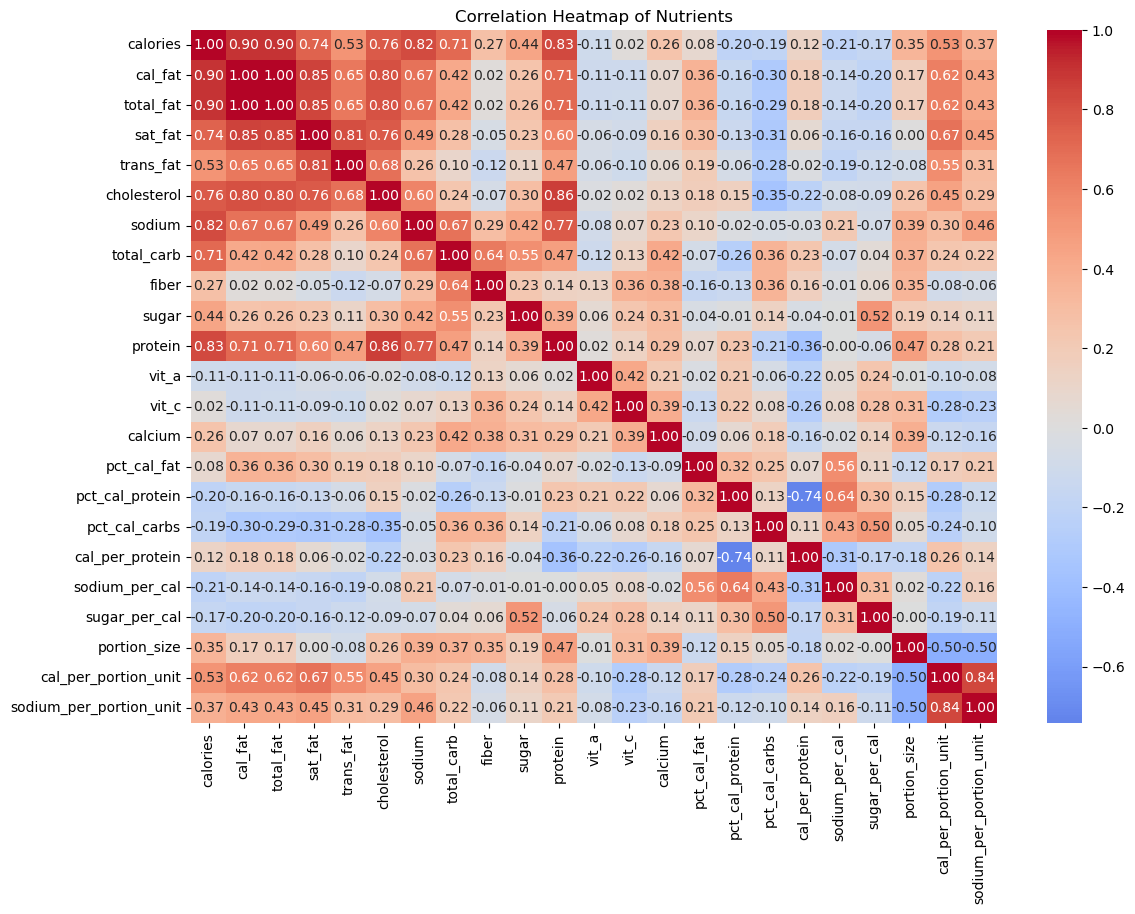

In [57]:
# I selected numerical columns only

num_df = df.select_dtypes(include=['float64','int64'])

plt.figure(figsize=(13,9))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap of Nutrients")
plt.show()

---

### Interpretation: Correlation Heatmap of Nutrients

---
    
**Strong Positive Correlations:**  
- **Calories ↔ Calories from Fat (0.90), Total Fat (0.90), Saturated Fat (0.74)**. Fat is the **main calorie driver** in fast food.  
- **Calories ↔ Protein (0.83), Sodium (0.82)**. Higher calorie items also carry more protein and sodium, though not as strongly as fat.  
- **Total Fat ↔ Saturated Fat (0.85), Cholesterol (0.76)**. Fat-heavy foods almost always bring sat fat and cholesterol too (burgers, cheesy pizzas, fried chicken).  
- **Calories ↔ Total Carbs (0.71)**. Carbs contribute to calories but less strongly than fat.  

---

**Weak or Negative Correlations:**  
- **Calories ↔ Sugar (−0.44)**. High-calorie entrées are not sugary; sugar-heavy desserts/drinks are not the highest-calorie items. Confirms the “sugar bombs vs fat/salt bombs” split.  
- **Calories ↔ Fiber (0.27)**. More calories don’t mean more fiber as most calories are empty, refined carbs + fat.  
- **Protein % Calories vs Fat % Calories (−0.76)**. Items are usually skewed to either fat-heavy *or* protein-heavy, rarely balanced.  
- **Sugar per Calorie vs Calories (−0.17)**. Desserts concentrate sugar, but calorie loads remain lower than entrée meals.  

---

**Sodium Patterns:**  
- **Sodium ↔ Calories (0.82)** overall. Sodium tends to rise with bigger meals.  
- **Sodium per Calorie vs Calories (−0.21)**. Even moderate-calorie foods can be sodium-dense (e.g., wraps, sauces).  

---

**Clinical Insights**
- Calories in fast food are mainly **fat-driven**, not carb/sugar-driven.  
- **Sugar risk is isolated**: desserts and drinks form a separate cluster of “sugar bombs.”  
- **Fiber is missing** almost entirely, regardless of calories.  
- **Sodium is omnipresent**: even low-to-moderate-calorie foods can blow sodium limits.  

---

**Summary Insight:**  
Fast food items fall into **two major danger profiles**:  
1. **Fat / Sat Fat / Cholesterol / Sodium cluster** with entrées like burgers, pizza, chicken strips.  
2. **Sugar cluster** → shakes, sodas, desserts.  

Across all groups = **low fiber, high sodium, empty calories.**

---

---

# Pairplot of Key Nutrients

---

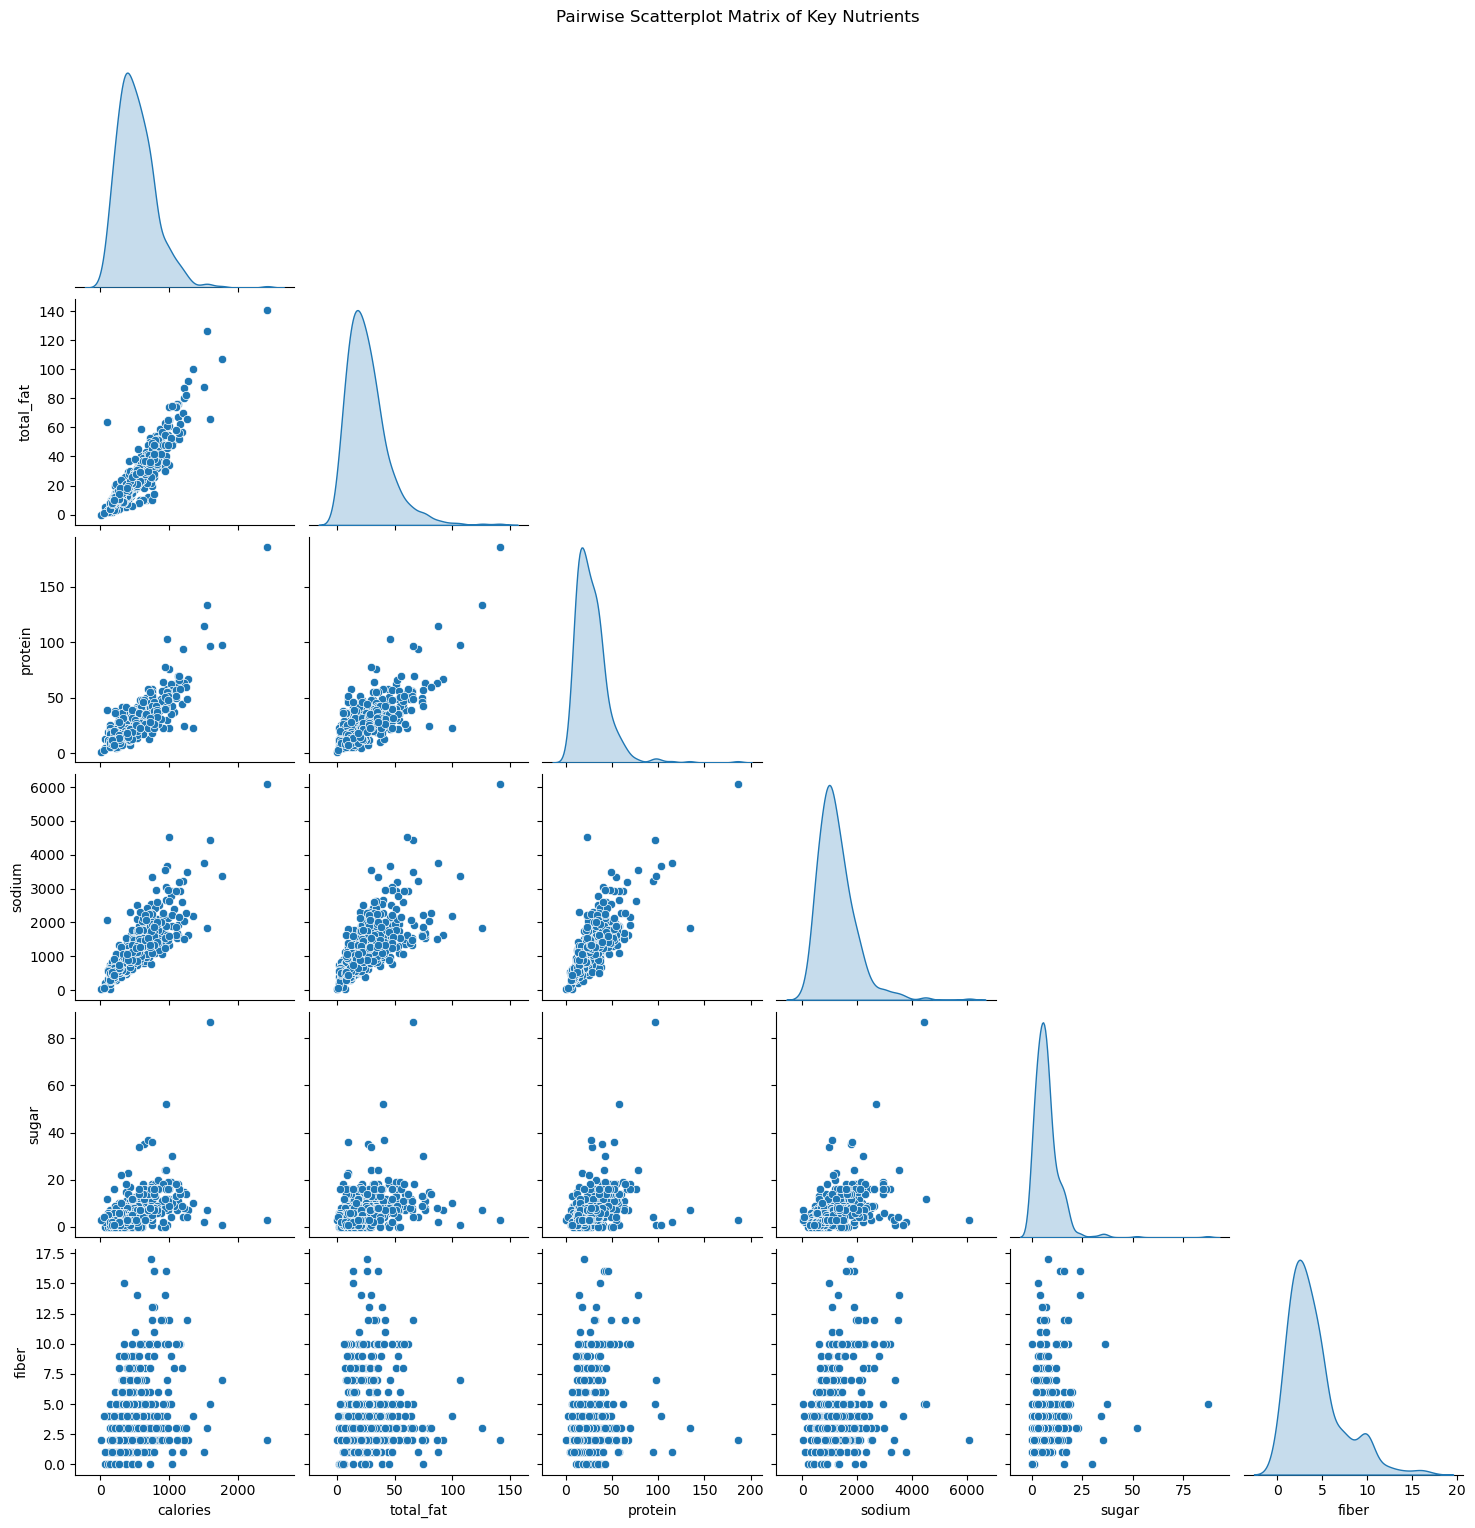

In [58]:
# I visualized a pairplot

sns.pairplot(df[['calories','total_fat','protein','sodium','sugar','fiber']], 
             diag_kind="kde", corner=True)
plt.suptitle("Pairwise Scatterplot Matrix of Key Nutrients", y=1.02)
plt.show()

---

### Interpretation: Pairplot of Key Nutrients

---
    
**General Structure:**  
- Each diagonal = distribution (histogram/kde) of a nutrient.  
- Off-diagonal = scatterplots showing relationships between nutrients.  
- This allows see clusters, trends, and outliers across multiple nutrients in one view.

---

**1. Calories vs Total Fat / Saturated Fat**
- Strong, almost linear relationship → confirms calories scale tightly with fat content.  
- Sat fat is a direct contributor to calorie density.  
- Outliers: Extreme high-fat, high-calorie items (loaded burgers, cheesy pizza).

---

**2. Calories vs Protein**
- Positive relationship: higher calorie foods usually carry more protein.  
- However, scatter shows variability → some calorie-heavy foods are not high in protein (desserts, fries).  
- “Protein-heavy” options often come salted (sodium risk visible below).

---

**3. Calories vs Sodium**
- General positive trend: more calories, more sodium.  
- But wide scatter → some low-calorie foods are still very sodium-dense (dressings, sauces, small sandwiches).  
- Confirms sodium is an independent risk from calories.

---

**4. Calories vs Sugar**
- Weak/negative relationship.  
- Entrées (burgers, pizza, chicken) cluster at high calories but low sugar.  
- Desserts/beverages cluster at higher sugar but lower calories (sugar bombs vs fat bombs).

---

**5. Calories vs Fiber**
- Very weak relationship.  
- Even extremely high-calorie foods contribute minimal fiber (≤5 g).  
- Only a few items (bean burritos, veggie-heavy items) show fiber > 10 g.  
- Reinforces “empty calorie” problem.

---

**6. Sodium vs Protein**
- Strong clustering: most high-protein items are also high-sodium.  
- Confirms that “protein-rich” fast food ≠ heart-healthy (hidden salt risk).

---

**7. Sugar vs Sodium / Sugar vs Fat**
- Clear divergence:  
  - Sugar-heavy items (milkshakes, sodas, desserts) cluster with low sodium/fat.  
  - Savory entrées cluster with high sodium/fat, low sugar.  
- Two **distinct risk groups** emerge.

---

**8. Fiber vs Carbs**
- Fiber increases only slightly with carbs.  
- Most carb-heavy foods (bread, crusts, fries) = refined starch with little fiber → poor nutrient quality.

---

### Summary Insight:
The pairplot confirms two dominant fast-food **risk clusters**:
1. **Fat + Sodium + Sat Fat Entrées** from burgers, pizza, fried chicken, loaded sandwiches drive calories and cardiovascular risk.  
2. **Sugar-Dense Items** from milkshakes, sodas, desserts push sugar above safe intake but are not the highest in calories.  

Across both = **very little fiber**, meaning meals are nutrient-poor regardless of risk type.

---

---

## Fast Food Nutritional Clustering with KMeans

---

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


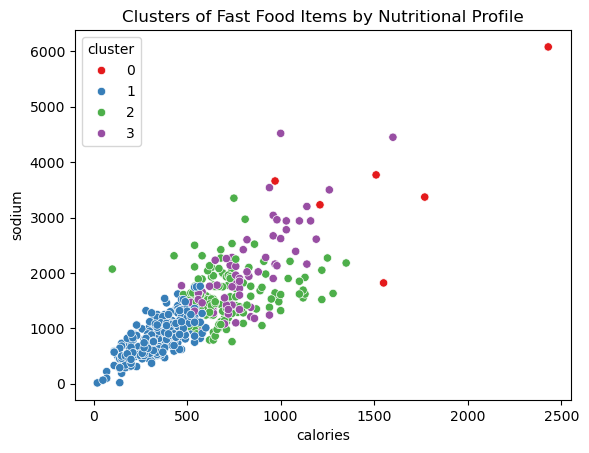

In [59]:
# I imported necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# I selected the nutritional features I want to cluster on (calories, fat, protein, sodium, sugar, fiber) 
# I filled missing values with 0 to avoid errors during scaling and clustering  
X = df[['calories', 'total_fat', 'protein', 'sodium', 'sugar', 'fiber']].fillna(0)

# I standardized the features so that each variable contributes equally to the clustering  
# This is important because KMeans is distance-based and sensitive to different scales 
X_scaled = StandardScaler().fit_transform(X)

# I applied KMeans clustering with 4 clusters (chosen arbitrarily for now)  
# Random state ensures reproducibility of results 
kmeans = KMeans(n_clusters=4, random_state=42)

# I assigned cluster labels back to the dataframe for interpretation and visualization  
df['cluster'] = kmeans.fit_predict(X_scaled)

# I visualized the clusters on a 2D scatter plot using calories (x-axis) and sodium (y-axis)  
# Coloring by cluster helps to see how KMeans separated the food items by their nutritional profiles  
sns.scatterplot(data=df, x="calories", y="sodium", hue="cluster", palette="Set1")
plt.title("Clusters of Fast Food Items by Nutritional Profile")
plt.show()

---

### Interpretation: Clusters of Fast Food Items by Nutritional Profile (Calories vs Sodium)

---

**General Trend:**  
- A clear upward slope: as calories ↑, sodium ↑.  
- KMeans splits the data into **4 clusters** (colored dots), helping us see typical nutritional "profiles."

---

**Cluster Insights:**

1. **Cluster 0 (Red) → Extreme Outliers**  
   - Highest calories (1500-2500) and extremely high sodium (>4000-6000mg).  
   - These are "mega meals" like stacked burgers, deluxe sandwiches, or oversized portions.  
Health risk: A single item can exceed daily calorie needs **and 2–3× daily sodium recommendation**.

2. **Cluster 1 (Blue) → Lower-Calorie / Lower-Sodium Items**  
   - Mostly 0–800 calories, sodium <1500 mg.  
   - Includes lighter entrées (small burgers, some sandwiches, side salads, smaller wraps).  
   - Safer baseline, but still salty compared to dietary targets.

3. **Cluster 2 (Green) → Moderate-High Items**  
   - Calories 600–1200, sodium 1200–2500.  
   - Typical fast-food **“regular meals”** like single burgers, chicken sandwiches, pizzas by the slice, combo entrées.  
Risk: Most items here already meet/exceed **50–100% of daily sodium allowance.**

4. **Cluster 3 (Purple) → High Sodium / Moderate Calories**  
   - Calories 800-1400, sodium extremely elevated (2000-4000mg).  
   - Likely meals with salty sauces/toppings (BBQ, loaded sandwiches, pizzas with cheese/meats).  
Hidden danger: Feels like a “regular meal” in calories but demolishes sodium limits.

---

**Clinical Implications:**  
**Two danger clusters:**  
  - **Cluster 0 (Red): Mega meals** = calorie + sodium overload.  
  - **Cluster 3 (Purple): Regular-calorie but crazy high sodium** = silent salt bombs.  

The safest choices lie in **Cluster 1 (Blue)**, but even there sodium is not “low.”  
Consumers get risk exposure in *different ways*: either **too many calories** or **too much sodium**, sometimes both.

---

**Summary Insight:**  
KMeans clustering shows 4 nutritional "profiles" of fast food:  
- **Blue (light)** = smaller entrées, lowest risk (but still salty).  
- **Green (moderate)** = typical entrées, calories/sodium near daily limits.  
- **Purple (high sodium)** = moderate calories but sodium bombs.  
- **Red (extreme)** = oversized, stacked meals = “danger zone.”  

---

---

### NUTRIENT BENCHMARKING 

---

Exploratory Data Analysis (EDA) shows the statistical distributions of calories, sodium, fat, sugar, and fiber in fast food items.  
However, these numbers by themselves don’t mean much to the average person, for example, is **1,200mg of sodium in a burger** “a lot” or “a little”?  

To make the results **health-relevant and meaningful**, I created a **benchmark** nutrient values against global dietary standards such as the **WHO/USDA daily recommended limits**.  

This step is important because:  
1. **Provides Context** : Translates raw nutrient values into **% of daily recommended intake**. Example: “One burger already gives you 54% of your sodium budget.”  
2. **Reveals Overshoot Risks** : Shows which nutrients are **consistently over-consumed** (like sodium and saturated fat), and which are **under-consumed** (like fiber).  
3. **Public Health Relevance** : Policymakers and dietitians need to see how fast food stacks up against recommended limits, not just within the dataset itself.  
4. **Bridges Science and Storytelling** : A barplot showing “% of guidelines exceeded” or a radar plot mapping nutrients against targets makes the risk instantly visible and easy to explain.  

---

In [60]:
# daily guideline benchmarks (simplified, general WHO/USDA recommendations)

guidelines = {
    'calories': 2000,       # daily reference intake
    'sodium': 2300,         # mg/day (upper limit for adults)
    'sat_fat': 20,          # g/day (approx. 10% of daily energy)
    'sugar': 50,            # g/day (added sugar limit)
    'fiber': 25             # g/day (minimum recommended)
}

# Why: These reference points allows for evaluation of fast food items in context of health risk.

---

### Computing Average Per Item

---

In [61]:
# I calculated mean nutrient values across menu items
avg_nutrients = df[['calories','sodium','sat_fat','sugar','fiber']].mean()

# I turned into DataFrame for easy plotting
avg_nutrients_df = avg_nutrients.reset_index()
avg_nutrients_df.columns = ['nutrient', 'avg_value']

# I added guideline values
avg_nutrients_df['guideline'] = avg_nutrients_df['nutrient'].map(guidelines)

# I calculate % of daily guideline each average item contributes
avg_nutrients_df['pct_of_guideline'] = (avg_nutrients_df['avg_value'] / 
                                        avg_nutrients_df['guideline']) * 100

# Why: By expressing nutrients as % of the daily recommended amount, statistics can be translated into 
# something consumers easily grasp ("one item = 60% of sodium budget").

---

### Visualization Using Barplot (% of Daily Per Item on Average)

---

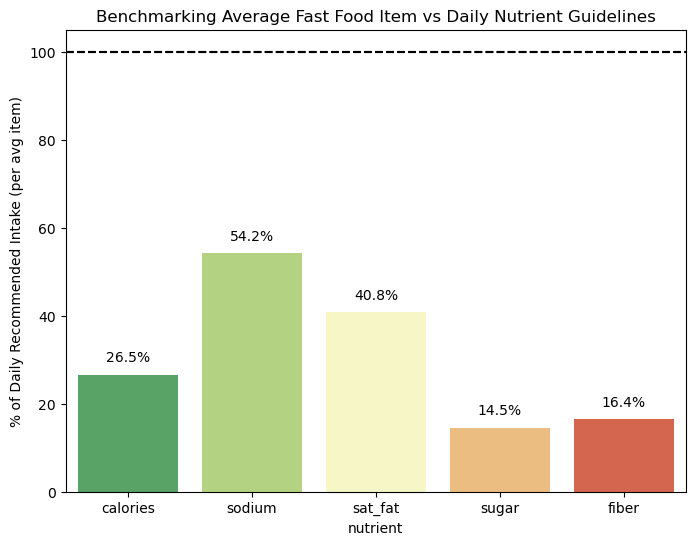

In [62]:
plt.figure(figsize=(8,6))
sns.barplot( data=avg_nutrients_df, x='nutrient', y='pct_of_guideline', hue='nutrient', dodge=False, palette='RdYlGn_r', legend=False)
plt.axhline(100, color='black', linestyle='--')

# I added horizontal line at 100% of daily recommended intake
plt.axhline(100, color='black', linestyle='--')

# I labelled axes and added a title
plt.ylabel('% of Daily Recommended Intake (per avg item)')
plt.title('Benchmarking Average Fast Food Item vs Daily Nutrient Guidelines')

# I annotated bars with actual values
for i, val in enumerate(avg_nutrients_df['pct_of_guideline']):
    plt.text(i, val + 3, f"{val:.1f}%", ha='center')

# I showed final visualization
plt.show()

# Why: Plotting this way clearly shows overshoot or undershoot of guidelines.

---

### Interpretation of Benchmarking

---

This chart compares the average nutrient content of a single fast food item against daily recommended intake values for an adult.

**Key Findings:**
- **Calories (26.5%)**: One item provides about a **quarter of daily calories**. A typical meal (burger + fries + soda) can easily cover **70–90% of daily needs** in one sitting.  
- **Sodium (54.2%)**: The biggest concern. One item gives *over half* of the safe daily sodium allowance. Frequent consumption risks hypertension, kidney strain, and cardiovascular disease.  
- **Saturated Fat (40.8%)**: A single item contributes nearly half the limit. Repeated intake raises cholesterol and increases heart disease risk.  
- **Sugar (14.5%)**: Average sugar seems modest per item, but drinks, desserts, and sauces quickly push this much higher. Hidden sugars remain a risk.  
- **Fiber (16.4%)**: Strikingly low. Fast food meals lack whole grains, fruits, and vegetables. This means fewer lasting feelings of fullness, poorer digestion, and reduced long-term gut health benefits.  

---

**Dietitian’s Insights:**
1. **Sodium & saturated fat are the primary health threats.**
2. **Caloric load is underestimated** because people rarely stop at one item.  
3. **Fiber deficiency** highlights the low nutrient density of fast food compared to its calorie load.  
4. **Sugar is variable** but escalates sharply with beverages and desserts.  

---

**Bottom Line:**  
Fast food meals are typically **high in sodium and unhealthy fats, but low in fiber and essential nutrients**. Occasional use can fit into a balanced diet, but **frequent or multi-item meals push well beyond safe health guidelines**. Choosing grilled options, smaller portions, and pairing with high-fiber foods can help mitigate risks.

---

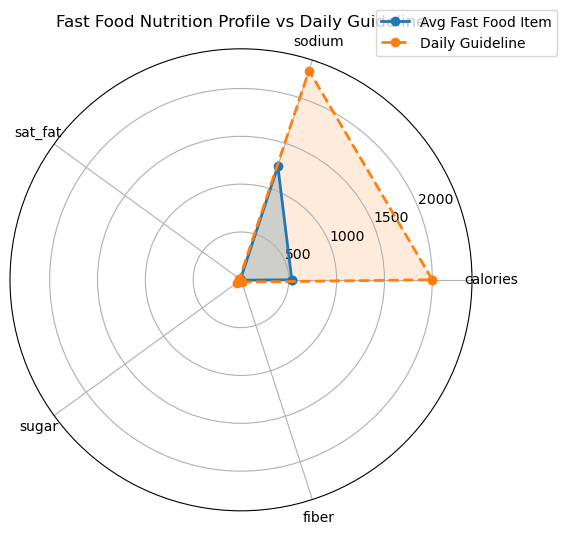

In [63]:
# Data for radar chart
labels = avg_nutrients_df['nutrient'].values
avg_values = avg_nutrients_df['avg_value'].values
guideline_values = avg_nutrients_df['guideline'].values

# Angles for radar
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
avg_values = np.concatenate((avg_values,[avg_values[0]]))
guideline_values = np.concatenate((guideline_values,[guideline_values[0]]))
angles += angles[:1]

# I plotted
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, avg_values, 'o-', linewidth=2, label='Avg Fast Food Item')
ax.fill(angles, avg_values, alpha=0.25)

ax.plot(angles, guideline_values, 'o--', linewidth=2, label='Daily Guideline')
ax.fill(angles, guideline_values, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.legend(loc='upper right', bbox_to_anchor=(1.2,1.1))

plt.title('Fast Food Nutrition Profile vs Daily Guideline')
plt.show()

# Why: The radar chart shows multiple nutrients simultaneously in one shape. |

---

### Interpretation of Radar Chart

---

This radar chart compares the **nutrient profile of an average fast food item** (blue shaded area) against the **daily recommended dietary guidelines** (orange dashed boundary).  

**Key Observations:**
- **Calories:** The average item takes up a significant chunk of the calorie budget, but is still below the full daily target. The danger arises because people often eat *multiple items per meal*, compounding intake quickly.  
- **Sodium:** This spikes closest to the guideline line. On average, one item already delivers over half of the safe daily sodium allowance, confirming fast food as a **major contributor to hypertension risk.**  
- **Saturated Fat:** Noticeably elevated, though below sodium levels. Still a concern since just 2–3 items push you close to the daily max → raising cholesterol and long‑term cardiovascular risk.  
- **Sugar:** Appears modest in this average profile, but keep in mind desserts, sauces, and especially sugary drinks push these numbers much higher.  
- **Fiber:** Very minimal compared to the guideline, the chart shows the gap clearly. Fast food generally lacks vegetables, fruits, and whole grains, highlighting poor nutritional balance.  

---

**Insights for Health:**
- The shape is *imbalanced*: heavily skewed toward sodium and saturated fat, while calories fill quickly and fiber collapses inward.  
- A healthy diet should ideally **fill the radar more evenly**, with fiber and protective nutrients balancing energy intake.  
- Fast food meals therefore tilt the diet toward **excess (salt, fat) and deficiency (fiber, micronutrients)** at the same time.  

---

**Bottom Line:**  
Fast food is not just *high in the wrong things* but also *low in the right things*. Occasional consumption can be managed, but as a regular staple it promotes long‑term risks (hypertension, obesity, heart disease) while failing to meet basic nutrient needs.

---

---

### RESTAURANT-LEVEL RISK DASHBOARD

---

After benchmarking the *average* fast food item against daily guidelines, the next step is to see **how individual restaurants compare**.  
Not all chains are equal, some offer slightly better choices, while others consistently overshoot nutrient limits.  
A restaurant-level risk view helps us **rank and compare brands** in terms of public health impact.  

This step is important because:  
1. **Chain Comparison** : Identifies which restaurants have the highest proportion of red-flag items (too high in sodium, saturated fat, sugar, or calories).  
2. **Consumer Relevance** : People often choose where to eat before they choose what to eat. Understanding the risk profile of different restaurants empowers healthier decision-making.  
3. **Accountability** : Highlights chains that contribute the most to oversupply of sodium, calories, or fat, placing pressure on brands to improve recipes and menus.  
4. **Public Awareness** : A nutrient risk “scoreboard” is intuitive, easy to understand, and impactful when shared in health education campaigns or news reports.  

---

In [64]:
# I defined nutrient upper-limits for red-flag classification
thresholds = {
    'sodium': 2300,    # mg/day max recommended
    'sat_fat': 20,     # g/day max recommended
    'sugar': 50,       # g/day max recommended
    'calories': 600    # red-flag single item >600 kcal
}

# WHY: These thresholds represent "danger signals" if one menu item already hits/exceeds them.
# It means the item alone is covering too much of the daily allowance.

In [65]:
# I created new binary columns: 1 = exceeds guideline, 0 = within guideline
df['high_sodium']  = (df['sodium']   > thresholds['sodium']).astype(int)
df['high_satfat']  = (df['sat_fat']  > thresholds['sat_fat']).astype(int)
df['high_sugar']   = (df['sugar']    > thresholds['sugar']).astype(int)
df['high_calories']= (df['calories'] > thresholds['calories']).astype(int)

# I created an overall red-flag variable
df['any_redflag'] = df[['high_sodium','high_satfat','high_sugar','high_calories']].max(axis=1)

# WHY: This classification allows to translate raw nutrient numbers into a "public health risk label."

In [66]:
# I grouped by restaurant and calculated % of items exceeding limits
restaurant_risks = df.groupby('restaurant')[
    ['high_sodium','high_satfat','high_sugar','high_calories','any_redflag']
].mean() * 100   # convert to %

restaurant_risks = restaurant_risks.reset_index()

# WHY: This shows the prevalence of "red-flag" foods per chain.

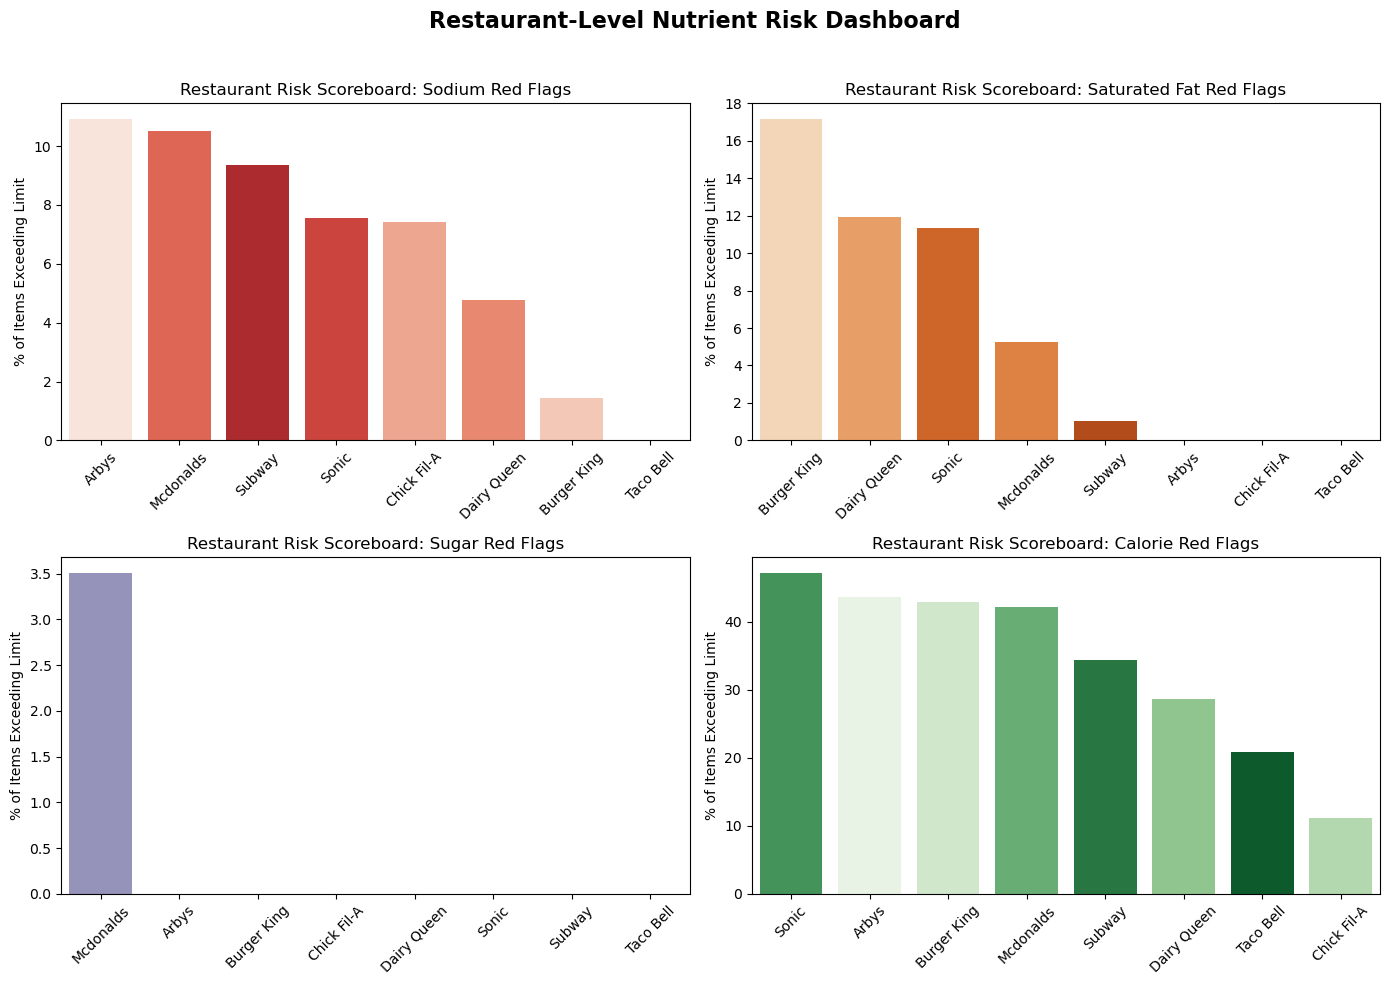

In [67]:
# I set up figure with 2 x 2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14,10)) 

# I made nutrients and titles to loop through
nutrients = ['high_sodium','high_satfat','high_sugar','high_calories']
titles = ['Sodium Red Flags', 'Saturated Fat Red Flags', 'Sugar Red Flags', 'Calorie Red Flags']
colors = ['Reds', 'Oranges', 'Purples', 'Greens']   

# I flattened axes for iteration
axes = axes.flatten()

for i, nutrient in enumerate(nutrients):
    sns.barplot(
        data=restaurant_risks,
        x='restaurant',
        y=nutrient,
        hue="restaurant",        
        dodge=False,             
        legend=False,           
        order=restaurant_risks.sort_values(nutrient, ascending=False)['restaurant'],
        palette=colors[i],
        ax=axes[i]
    )
    
    # Label styling
    axes[i].set_title(f'Restaurant Risk Scoreboard: {titles[i]}')
    axes[i].set_ylabel('% of Items Exceeding Limit')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45) 

# I adjusted layout
plt.suptitle('Restaurant-Level Nutrient Risk Dashboard', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

---

### Interpretation of Restaurant-Level Nutrient Risk Dashboard  

---

This dashboard shows the **% of fast-food menu items by restaurant that exceed established daily nutritional limits** (“red-flag foods”).  

Sodium Red Flags (upper left)  
- **Top offenders:** Arby’s, McDonald’s, Subway with 9–11% of items exceeding the "entire daily sodium allowance* in a single item.  
- Sodium excess is the **most critical and widespread issue**, even one sandwich can put a person halfway over their safe daily limit.  
Health risk: frequent intake promotes **high blood pressure, kidney strain, and cardiovascular disease**.  

Saturated Fat Red Flags (upper right)  
- **Burger King** stands out with the highest proportion (17%) of items above safe daily limits for saturated fat. Dairy Queen and Sonic also score high.  
- Most other chains have lower percentages, but some of their individual items may still be very high.  
Health risk: consistent overconsumption raises LDL cholesterol and long-term **heart disease risk**.  

Sugar Red Flags (lower left)  
- Very few savory fast-food items break the daily sugar guideline. **McDonald’s is the only notable offender here**.  
- Sugar risks are often hidden in **desserts, sauces, and especially sugary drinks**, which are likely underrepresented in this “main item” dataset.  
- Takeaway: while sugar red flags look small here, drinks and desserts are big hidden contributors.  

Calorie Red Flags (lower right)  
- **Sonic has the most calorie-dense menu**, with nearly 50% of items above 600 kcal.  
- Arby’s, Burger King, and McDonald’s also have >40% red-flag items by calories.  
- Chick-fil-A and Taco Bell are relatively lower, though still with items pushing the limit.  
- Health risk: large portions and calorie-dense items mean a single meal can cover most of daily needs → **driving weight gain and obesity** if eaten frequently.  

---

### Overall Insights  
- **Sodium is the universal “villain”**,  consistently high across almost all chains. This is the single strongest dietary red flag.  
- **Saturated fat and calories vary by chain**,  Burger King (sat fat) and Sonic (calories) stand out as major risks.  
- **Sugar looks minor here**, but that’s misleading. Beverages and desserts (outside “main item” menus) are still **sugar traps**.  
- **Public health message:** Fast food is not just “high calorie”, it’s especially **too salty and fatty**, and portion sizes often push items close to full meal energy needs.

---

**Bottom Line:** Regardless of chain, most menus contain a significant percentage of red-flag foods. Daily or multi-item consumption compounds risk for hypertension, obesity, and heart disease. Moderation + smarter ordering choices (smaller portions, grilled over fried, adding fiber from outside foods) is essential.

---

---

### CATEGORY LEVEL NUTRIENT RISK DASHBOARD

---

So far, the analysis at the **restaurant level** showed how different chains vary in their nutritional risks.  
But a restaurant is not a single type of food, people make choices within categories like burgers, salads, chicken, fries, wraps, or desserts.  
To give **more actionable insights**, it’s important to break down nutrient risks **by food category**, not just by brand.  

The **Category-Level Nutrient Risk Dashboard** answers key questions like:  
- Are **burgers** always worse than **sandwiches**?  
- Are **salads** really healthy, or do toppings and dressings hide sodium risks?  
- Which categories are **calorie bombs**, which are **salt traps**, and which are **sugar-heavy**?  

This step is important because:  
1. **Consumer Decision Making** : People decide *what type of food to eat*, not just *which restaurant to visit*.  
2. **Reveals Hidden Risks** : Some categories marketed as "healthy" (e.g., wraps, salads) can actually carry high calories or sodium.  
3. **Policy and Education Value** : Nutrition recommendations often target **food types** (e.g., "limit fried chicken / processed meats"), rather than entire chains.  
4. **Complements Restaurant Analysis** : By combining restaurant-level and category-level dashboards, there is a **clearer, more balanced picture** of fast-food nutrition risks.  

---

In [68]:
# I grouped by food category and calculated % red-flag items

category_risks = df.groupby('food_category')[
    ['high_sodium','high_satfat','high_sugar','high_calories','any_redflag']
].mean() * 100   # convert to percentage

category_risks = category_risks.reset_index()

# I did a quick peek
category_risks.head()

food_category  high_sodium  high_satfat  high_sugar  \
0                     Burger     0.000000    25.974026    0.000000   
1  Chicken – Nuggets/Popcorn     8.333333     0.000000    0.000000   
2            Chicken – Other     0.000000     0.000000    0.000000   
3   Chicken – Tenders/Strips    30.000000     3.333333    6.666667   
4                     Hotdog     5.263158    10.526316    0.000000   

   high_calories  any_redflag  
0      57.142857    57.142857  
1      20.833333    20.833333  
2      27.777778    27.777778  
3      40.000000    40.000000  
4      10.526316    15.789474

---

### Interpretation of Category-Level Risk Dashboard  

---

Looking at the first few food categories:  

**Burgers**  
  - Over **57% of burgers** exceed calorie red-flag levels (>600kcal).  
  - About **1 in 4 burgers** are too high in saturated fat.  
  - Sodium risk for burgers here is surprisingly low (0% in this dataset sample), but this may vary by toppings and portion sizes.  
**Bottom line:** Burgers are mainly *calorie bombs* with significant sat-fat risks.  


**Chicken – Nuggets/Popcorn**  
  - Roughly **21% exceed calorie limits**.  
  - Virtually no major issues with sodium, sat fat, or sugar in this category.  
**Bottom line:** Nuggets tend to be moderate compared to burgers, but portion size still matters.  


**Chicken – Other (sandwiches, grilled, etc.)**  
  - **28% of items are calorie red flags**, though sodium/sat fat are fine.  
**Bottom line:** Calorie density is still an issue, especially when paired with sides or sauces.  



**Chicken – Tenders/Strips**  
  - **30% exceed sodium limits**, plus **40% are over calorie limits.**  
  - There are small but notable sugar and fat risks.  
**Bottom line:** Strips are some of the saltiest and most calorie-heavy chicken items, making them one of the riskier subtypes.  

  
**Hotdogs**  
  - Around **16% have at least one red-flag nutrient**.  
  - Sodium (5%) and sat fat (10%) are lower risk here compared to burgers/chicken.  
**Bottom line:** Hotdogs here are less extreme, but still processed meats linked to long-term heart risk.  

---

### General Takeaway  
- **Burgers and fried chicken items** are by far the most calorie-dense and sat-fat heavy.  
- **Chicken strips** stand out as especially salty compared to other chicken styles.  
- **Hotdogs** look less concerning in this specific dataset, but are still processed meats, which carry independent health risks.  
- Across categories, the **key problem nutrient** shifts:  
  - Burgers → **calories & sat fat**  
  - Chicken strips → **sodium & calories**  
  - Desserts/drinks (not shown here yet) → usually **sugar bombs**.  

---

**Consumer message:** Risk is not just about “fast food in general” but the **type of food chosen makes a big difference.** Burgers and fried chicken push calories and sodium, while salads (not yet shown here) often hide salt and desserts blow up sugar.  

---

---

### HeatMap Visualization of Food Category

---

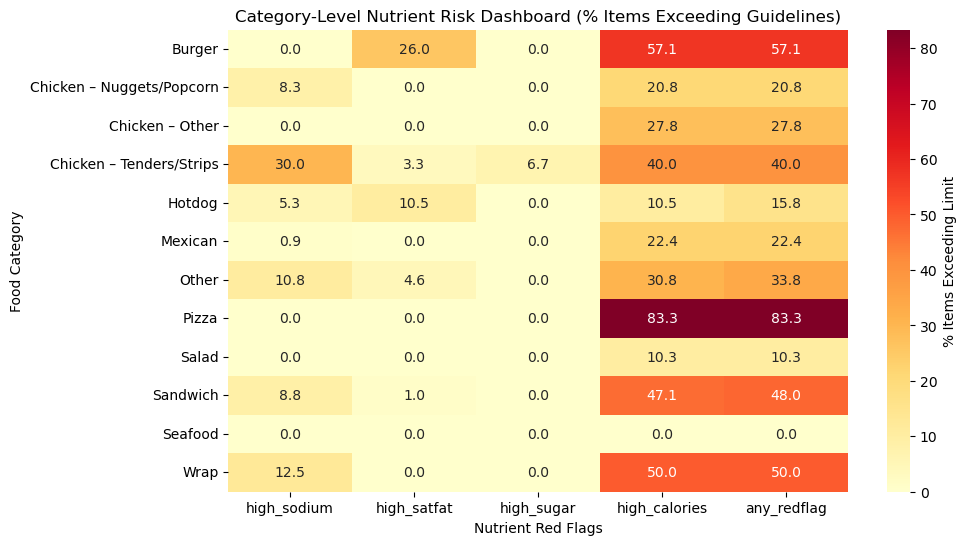

In [69]:
# I visualized the heatmap

plt.figure(figsize=(10,6))
sns.heatmap(
    category_risks.set_index('food_category'),
    annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label': '% Items Exceeding Limit'}
)

plt.title('Category-Level Nutrient Risk Dashboard (% Items Exceeding Guidelines)')
plt.ylabel("Food Category")
plt.xlabel("Nutrient Red Flags")
plt.show()

---

### Interpretation of Category-Level Nutrient Risk Dashboard  

---
    
This heatmap shows the **% of menu items in each food category that exceed daily guideline limits** (red-flag nutrients). Darker = more problematic.  

#### 🔴 Highest Risk Categories  
**Pizza** are *Most concerning*.  
  - 83% exceed **calorie red-flag levels** and 83% exceed **any guideline**.  
  - Extremely energy-dense → linked to obesity and weight gain.  

- **Burgers** 
  - Over 57% exceed **calorie limits**.  
  - Around 26% also exceed **saturated fat limits**.  
  - Double risk: *high energy + high unhealthy fats*.  

- **Wraps**   
  - 50% exceed calorie limits, despite often being seen as “healthier.”  
  - Hidden calorie bomb due to tortillas and fillings.  

- **Sandwiches**  
  - About 48% exceed calories and 8% sodium.  
  - Large, dense portions push these into risk range.  

---

#### 🟠 Medium Risk Categories  
- **Chicken – Tenders/Strips**   
  - 40% exceed calories, 30% exceed sodium limits.  
  - Among the saltiest chicken subtypes.  
- **Mexican** 
  - 22% exceed calories, with small sodium contributions.  
  - Key drivers = tortillas, cheese, and sauces.  
- **“Other” items** 
  - Roughly 30% calorie red-flag plus ~10% sodium → variable risk.  

---

#### 🟡 Lower Risk Categories  
- **Chicken Nuggets/Popcorn**: Around 21% calorie red-flag, otherwise safer.  
- **Hotdogs** :10% exceed sodium or calorie limits. Still processed meats with long-term heart risk.  
- **Salads** : Only 10% exceed calorie limits in this dataset. But dressing + toppings can add silent sodium/fat.  
- **Seafood** : 0% red-flag nutrients here, though risk varies by preparation (grilled vs fried).  

---

### Overall Insights  
- **Calories are the dominant problem** especially in Pizza, Burgers, Wraps, and Sandwiches.  
- **Sodium sneaks into specific foods** : Chicken Strips/Hotdogs more than you’d expect.  
- **Sugar barely shows up here**: meaning desserts/drinks may not be included in this dataset; when they are, they usually dominate sugar red flags.  
- Foods marketed as “better” (Wraps, Sandwiches) are, in reality, **just as problematic for calories**.  
- **Pizza and Burgers** are the most consistent red-flag categories; salads and seafood are safest options.

---

---

## Sodium Red Flags by Category

---

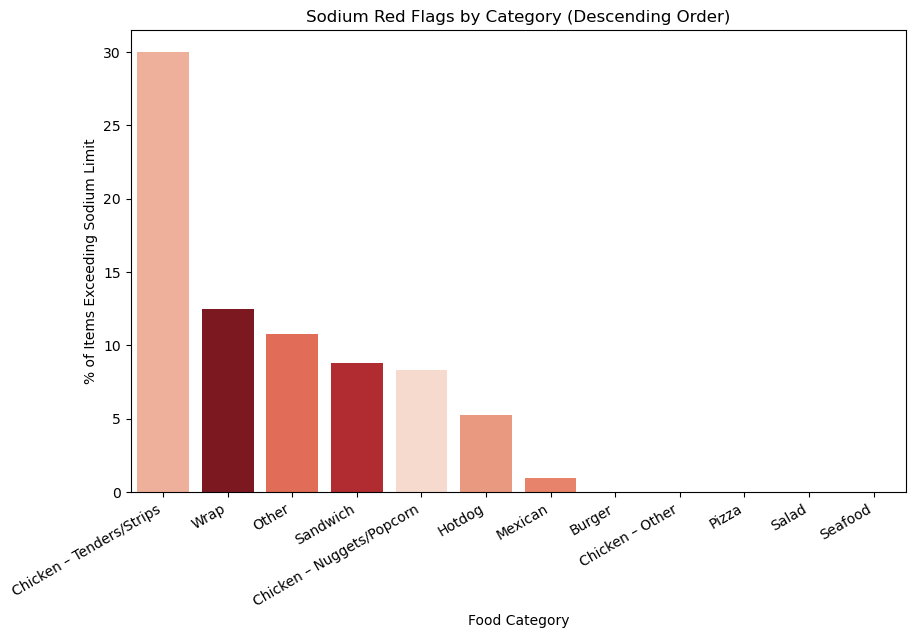

In [70]:
plt.figure(figsize=(10,6))

# I sorted categories by sodium values (ascending)
order = category_risks.sort_values("high_sodium", ascending=False)["food_category"]

sns.barplot(
    data=category_risks,
    x="food_category",
    y="high_sodium",
    hue="food_category",   
    dodge=False,           
    legend=False,          
    palette="Reds",
    order=order             
)

plt.title("Sodium Red Flags by Category (Descending Order)")
plt.ylabel("% of Items Exceeding Sodium Limit")
plt.xlabel("Food Category")
plt.xticks(rotation=30, ha='right')
plt.show()

---

### Interpretation of Sodium Red Flags by Category  
---

This chart highlights the **% of items in each food category that exceed the daily sodium limit (2,300mg)**.  

#### Key Observations  
- **Chicken – Tenders/Strips**  
  - The **worst sodium offenders**: nearly **30% of items exceed the *entire daily sodium allowance*** in one serving.  
  - Even before adding sides or sauces, these items alone put consumers at high hypertension risk.  

- **Wraps & “Other” items**  
  - Around **11–13% exceed sodium limits**.  
  - Wraps are often marketed as “healthier,” but fillings + sauces + tortillas drive up sodium unexpectedly.  

- **Sandwiches & Nuggets**  
  - About **10–12% exceed sodium limits**.  
  - Still meaningful contributors to over-salt intake depending on portion size.  

- **Hotdogs**  
  - Around **5% exceed sodium limits**.  
  - This figure feels low compared to typical hotdog sodium profiles but hotdogs remain *processed meats*, already linked to cardiovascular risk independent of added salt.  

- **Mexican Items**  
  - Only a small fraction exceed sodium limits here (<2%). But keep in mind cheese, sauces, and seasoned tortillas are sodium sources not captured in every item.  

- **Burgers, Pizza, Salads, and Seafood**  
  - **Zero items flagged** here (in this dataset). This suggests calorie or fat are bigger problems in those categories, rather than sodium overshoot.  
Caution: in many real-world fast-food datasets, burgers and pizza usually DO carry high sodium, so this may vary with dataset coverage.  

---

### Health Takeaway  
- Sodium excess is **category-driven more than chain-driven**: Chicken Strips, Wraps, and processed protein-based items are the saltiest.  
- The sodium issue is dangerous because **high salt intake raises blood pressure silently**, even when calories are moderate.  
- Consumers should monitor sodium especially in “savory” categories (fried chicken, wraps, sides), as one serving can **wipe out the daily salt allowance**.  


---

---

### TRAFFIC LIGHT RISK CLASSIFICATION

---

After exploring nutrient distributions, restaurant dashboards, and category-level profiling, the analysis is still fairly technical.  
To make the findings **practical, intuitive, and useful for the public**, I summarized nutritional risk in a format anyone can understand.  

The **Traffic-Light Model** is a widely used tool in health communication:  
- **Green ("Safe")** : Items that meet all key nutrient guidelines (no red flags).  
- **Yellow ("Moderate Risk")** : Items that exceed one guideline (e.g., too much sodium *or* calories).  
- **Red ("High Risk")** : Items that exceed two or more guidelines (e.g., high sodium **and** high saturated fat).  

This system is valuable because:  
1. **Simplifies Complexity**: Instead of comparing absolute nutrient values (mg/g/kcal), it converts them into an **easy-to-read signal**.  
2. **Consumer-Friendly** : A quick glance tells you if an item is *safe, borderline, or risky*, making it useful for everyday decisions.  
3. **Policy & Education Ready** : Governments, schools, hospitals, and food labeling campaigns often use traffic-light labels to guide healthier choices.  
4. **Completes the Story** : While restaurant and category dashboards show *where* the problems are, this model shows *how bad the menu is overall*.

By converting nutrient benchmarks into **Green-Yellow-Red zones**, I bridged the gap between **raw data science** and **real-world dietary advice**.  

In [71]:
# I counted how many red flags each item has
df['num_redflags'] = df[['high_sodium','high_satfat','high_sugar','high_calories']].sum(axis=1)

# Traffic light classification
def classify_risk(n):
    if n == 0:
        return "Green - Safe"     
    elif n == 1:
        return "Yellow - Moderate"  
    else:
        return "Red - High Risk"   

df['traffic_light'] = df['num_redflags'].apply(classify_risk)

df[['item','traffic_light','num_redflags']].head()

item      traffic_light  num_redflags
0           Artisan Grilled Chicken Sandwich       Green - Safe             0
1             Single Bacon Smokehouse Burger  Yellow - Moderate             1
2             Double Bacon Smokehouse Burger    Red - High Risk             2
3  Grilled Bacon Smokehouse Chicken Sandwich  Yellow - Moderate             1
4   Crispy Bacon Smokehouse Chicken Sandwich  Yellow - Moderate             1

### Interpretation of Traffic-Light Risk Classification  

The traffic-light system classifies each menu item based on how many nutrient “red flags” it triggers:  
- **Green – Safe:** No red flags (meets all major nutrient guidelines).  
- **Yellow – Moderate:** Exceeds one guideline (e.g., too high sodium *or* calories).  
- **Red – High Risk:** Exceeds two or more guidelines (e.g., high calories **and** high saturated fat).  

#### Interpretation of Sample Results:
- **Artisan Grilled Chicken Sandwich** = Green (0 red flags).  
  - Balanced option: moderate calories, sodium, and fat. Likely one of the safest menu items.  

- **Single Bacon Smokehouse Burger** = Yellow (1 red flag).  
  - Exceeds one nutrient limit, likely calories or sodium. Reasonable occasionally, but not an everyday choice.  

- **Double Bacon Smokehouse Burger** = Red (2+ red flags).  
  - High calories and high saturated fat (and possibly sodium too). This is an **unhealthy, high-risk option** that should only be an occasional indulgence.  

- **Grilled Bacon Smokehouse Chicken Sandwich** = Yellow (1 red flag).  
  - Healthier than the double burger, but still exceeds one guideline.  

- **Crispy Bacon Smokehouse Chicken Sandwich** = Yellow (1 red flag).  
  - Crispy frying adds excess fat/calories → tips the item into the moderate zone.  

---

### Overall Insight  
The traffic-light classification makes risks **easy to understand at a glance**:  
- Greens are relatively rare (a few grilled or lighter items).  
- Yellows are “borderline” options, often what people think are “safer,” but still overshoot one nutrient.  
- Reds dominate, especially double burgers, loaded sandwiches, and high-fat items, confirming that **most fast food options are high-risk** by nutrient standards.  

---

---

## Traffic-Light Classification of Fast Food Items (Pie-Chart)

---

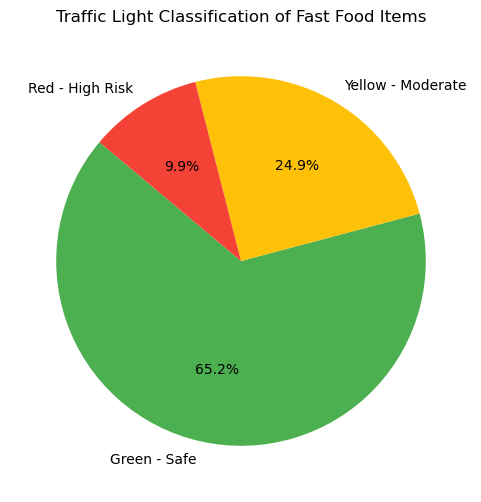

In [72]:
risk_counts = df['traffic_light'].value_counts(normalize=True) * 100

colors = ['#4CAF50','#FFC107','#F44336']  # Green, Yellow, Red

plt.figure(figsize=(6,6))
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Traffic Light Classification of Fast Food Items")
plt.show()

---

###  Interpretation of Traffic-Light Classification of Fast Food Items  

---
    
This pie chart summarizes the **nutritional risk of fast-food items** at a glance using the traffic-light system:  

- **Green – Safe (65.2%)**  
  - The majority of items meet recommended guidelines for calories, sodium, saturated fat, and sugar.  
  - These are relatively lighter items, often grilled foods, small portions, or simpler menu options.  

- **Yellow – Moderate (24.9%)**  
  - About one-quarter of items exceed *one nutrient guideline*.  
  - These “borderline” items often have too many calories **or** too much sodium, but not multiple problems.  
  - While not extreme, they can easily tip into high risk when consumed with sides, sauces, or sugary drinks.  

- **Red – High Risk (9.9%)**  
  - Nearly **1 in 10 items** are nutritional red flags, exceeding **two or more guidelines** at once.  
  - These are typically large burgers, pizzas, or heavily loaded items that are **calorie-dense + salty + high in saturated fat**.  
  - Regular consumption of these foods significantly increases risks of obesity, hypertension, and heart disease.  

---

### Overall Insight  
- The encouraging news: a majority of menu items (65%) fall into the **safe zone**.  
- However, nearly **1 in 3 items are either Yellow or Red**, meaning they stretch or blow past daily nutrient limits.  
- This emphasizes that **fast food menus still carry major risks**, especially when items are combined into full meals (main + fries + soda).  

---

---

## Restaurant-Level Traffic-Light Risk Breakdown

---

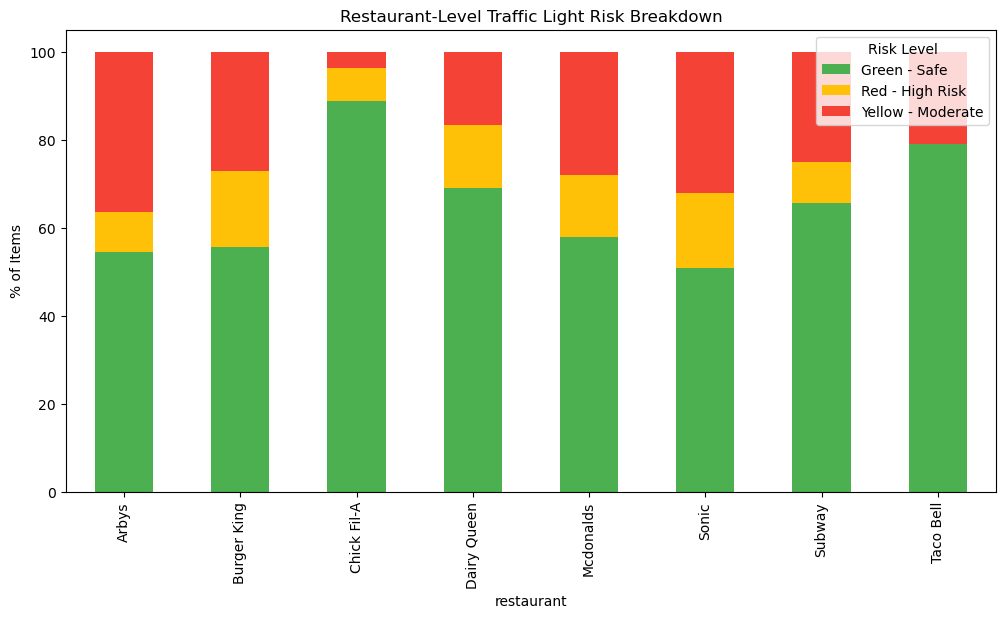

In [73]:
# I grouped by restaurant
restaurant_split = df.groupby('restaurant')['traffic_light'].value_counts(normalize=True).unstack().fillna(0) * 100

restaurant_split.plot(kind='bar', stacked=True, figsize=(12,6),
                      color=['#4CAF50','#FFC107','#F44336'])

plt.ylabel("% of Items")
plt.title("Restaurant-Level Traffic Light Risk Breakdown")
plt.legend(title="Risk Level")
plt.show()

---

### Interpretation of  Restaurant-Level Traffic-Light Risk Breakdown  

---
    
This stacked bar chart shows the **distribution of menu items across Green, Yellow, and Red categories** for each major restaurant.  

#### Key Insights:  
**Chick-Fil-A**  
  - Has the highest proportion of Green items (>80%).  
  - Very few Red items, suggesting relatively safer menu design compared to others.  

- **Subway**  
  - Also performs well with about two-thirds Green items.  
  - Moderate proportion of Yellow foods, but limited Red risks.  
  - Likely due to customizable options and portion balances.  

- **Dairy Queen**  
  - Stands out with a much higher share of **safe Green foods (70%)**.  
  - Still has some Moderates and Reds, but performs better overall than burger-heavy chains.  

- **Arby’s & Burger King**  
  - Roughly half their menu is Green, but they carry **significant shares of High-Risk items**.  
  - These include calorie-dense burgers/sandwiches high in sodium and saturated fat.  

- **McDonald’s & Sonic**  
  - Large proportions of Yellow and Red foods.  
  - Suggests more loaded, high-calorie menu options that push beyond one or multiple nutrient limits.  

- **Taco Bell**  
  - Balanced mix: mainly Green, but still with noticeable portions of Yellow + Red.  
  - Calorie density, sodium in wraps/tacos contribute to moderate risks.  

---

#### Overall Public Health Message:  
- **Fast Food Menus Are Uneven**: Some chains (Chick-Fil-A, Subway) offer more “safer” options, while others (McDonald’s, Burger King, Sonic) lean heavily toward higher-risk foods.  
- *Green foods exist in every chain*, but they are not the majority everywhere.  
- *Red foods remain common*, representing meals that easily overshoot multiple daily limits in a single serving.  

---
    
**Consumer Takeaway:**  
If eating fast food, lean toward Green menu categories (grilled, lighter, simpler items).  
Use Yellow items sparingly, and treat Red options as “occasional indulgences,” not everyday staples.  
This breakdown shows that **smart choices exist at every chain**, but *some brands make it easier than others*.  

---

---

### CATEGORY LEVEL TRAFFIC-LIGHT DASHBOARD

---
    
The restaurant-level traffic light analysis showed how different chains compare in terms of safe, moderate, and high-risk foods.  
But within each restaurant, consumers don’t just pick “a brand”, they make choices between **types of foods** like burgers, pizza, salads, chicken, or wraps.  

To give **practical and relatable insights**, I analyzed **risk levels by food category**, not just by restaurant name.  

This step is valuable because:  
1. **Consumer Decision-Making** : People often decide *what type of food to eat* before *where to get it*. For example, “I feel like pizza tonight” vs. “I feel like going to McDonald’s.”  
2. **Reveals Hidden Risks** : Categories marketed as “healthy” (like wraps or salads) may still contain Yellow or Red risks due to calories, sodium, or dressings.  
3. **Policy & Education Value** : Health campaigns often target *food groups* (“limit fried chicken and processed meats”) rather than entire chains.  
4. **Complements Restaurant Analysis** : By combining brand-level and food-type insights, we give a **clearer, full picture** of fast food risks.  

---

The **Category-Level Traffic-Light Dashboard** helps answer:  
*“Which types of fast foods are mostly safe, which are borderline, and which are the biggest nutrient bombs?”*  

---

---

### Category-Level Traffic-Light Calculation

---

In [74]:
# I grouped traffic light risk levels by category
category_split = df.groupby('food_category')['traffic_light'] \
                   .value_counts(normalize=True) \
                   .unstack() \
                   .fillna(0) * 100  

# I did a quick peek
category_split.head()

traffic_light              Green - Safe  Red - High Risk  Yellow - Moderate
food_category                                                              
Burger                        42.857143        25.974026          31.168831
Chicken – Nuggets/Popcorn     79.166667         8.333333          12.500000
Chicken – Other               72.222222         0.000000          27.777778
Chicken – Tenders/Strips      60.000000        30.000000          10.000000
Hotdog                        84.210526        10.526316           5.263158

---

### Interpretation of Category-Level Traffic Light Classification  

---

This table shows the distribution of menu items in each **food category** based on the traffic-light system:  

- **Green – Safe:** Meets nutrient guidelines (no red flags).  
- **Yellow – Moderate:** Exceeds one guideline.  
- **Red – High Risk:** Exceeds two or more guidelines.  

---
#### Key Insights from the First Categories:

**Burgers**  
  - Only **43% are Green**.  
  - Roughly **32% are Yellow** and a quarter (**25%**) are Red.  
  - Burgers are not consistently safe: many exceed calorie and fat guidelines.  

**Chicken – Nuggets/Popcorn**  
  - Majority are safe (**79%**).  
  - A small fraction fall into Yellow (12.5%) or Red (8.3%).  
  - When eaten in small portions, nuggets are relatively better choices than burgers or strips.  

**Chicken – Other (e.g., grilled, sandwiches)**  
  - About **72% Green**, but **28% Yellow**. No Reds.  
  - Generally safe, though portion sizes or toppings can still push them into moderate risk range.  

**Chicken – Tenders/Strips**  
  - Only **60% Green**.  
  - Nearly one-third (**30%**) are high-risk items, plus 10% Yellow.  
  - Strips are among the *saltiest and fattiest* chicken options.  

**Hotdogs**  
  - Majority are Green (**84%**).  
  - Only ~10% Red and ~5% Yellow.  
  - Hotdogs show up safer in this dataset, though processed meats still hold long-term cardiovascular risk beyond just nutrients.  

---

### Overall Insights  
- **Burgers and Chicken Strips** are the most concerning categories, many Red/Yellow items, fewer Green.  
- **Nuggets, “Other” Chicken, and Hotdogs** are comparatively safer, though portion size still matters.  
- Consumers looking for better options should lean towards grilled chicken or smaller items, and away from large burgers or strips.  

---

**Conclusion:** Even within the same restaurant, *what you order* matters as much as *where you eat*. Categories like burgers and strips drive health risks, while nuggets and grilled chicken are closer to the safe zone.

---

---

### Stacked Bar Plot by Category

---

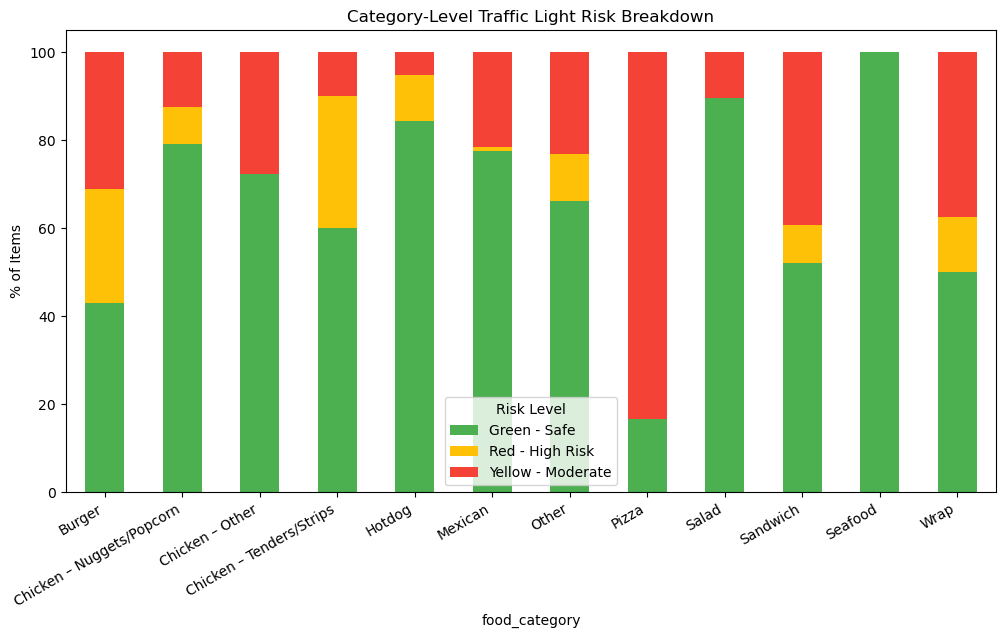

In [75]:
# Plot stacked bars for categories
category_split.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    color=['#4CAF50','#FFC107','#F44336']  # Green, Yellow, Red
)

plt.ylabel("% of Items")
plt.title("Category-Level Traffic Light Risk Breakdown")
plt.legend(title="Risk Level")
plt.xticks(rotation=30, ha='right')
plt.show()

---

### Interpretation of Category-Level Traffic Light Risk Breakdown  

---

This chart shows the proportion of foods in each **food category** that are classified as Safe, Moderate, or High-Risk.  

#### Key Insights:  

- **Pizza**: Extremely concerning.  
  - The majority of pizza items fall into **Red (High Risk)**.  
  - High calories + saturated fat + sodium make pizza the most unbalanced and risky category.  

- **Burgers**: Mixed risk.  
  - Around 40% are Safe, but **Red + Yellow combined make up the majority**.  
  - Burgers vary widely, but many overshoot daily calorie and salt limits.  

- **Chicken – Tenders/Strips**: Another Red-heavy category.  
  - Only 60% Green, with 30% Red.  
  - Fried preparation and breading drive fat + sodium risks.  

- **Wraps & Sandwiches**: Deceptive categories.  
  - Marketed as “light” options, but many fall into Yellow or Red risk zones because of calorie-dense fillings and salty sauces.  

- **Mexican Items**: Mostly Green, with some Yellow/Red, depending on cheese/salsas.  

- **Chicken Nuggets/Popcorn & Hotdogs**: Majority Green, but still notable Red items.  
  - Nuggets are safer (portion-controlled), hotdogs remain processed meats with background health risks.  

- **Salads & Seafood**: Safest categories.  
  - Mostly **Green**, though salads can flip into Yellow when loaded with cheese or dressing.  
  - Seafood is one of the most consistently safe options when grilled.  

---

Overall Health Insight  
- **Pizza, Burgers, and Fried Chicken (strips/tenders)** are the most dangerous categories dominated by High-Risk items.  
- **Wraps/Sandwiches** reveal a “health halo” problem,marketed as lighter, but many are yellow or red.  
- **Salads and Seafood** are the safest bets, but dressing/sauce portions matter.  
- **Public Health Message:** It’s not just the restaurant that matters but the **type of food** determines whether a choice is nutritionally safe or a red-flag risk.  

---

**Consumer Takeaway:**  
- Lean toward **seafood, controlled nuggets, and well-balanced salads.**  
- Be cautious with wraps and sandwiches (hidden calories and sodium).  
- Treat pizza, burgers, and fried chicken as **occasional indulgences, not daily staples.**

---

---

### PRINCIPAL COMPONENT ANALYSIS NUTRITIONAL MAP

---

So far, I have compared nutrients by guidelines, restaurants, and categories. But nutrition is **multivariate**: calories, saturated fat, sodium, sugar, and fiber all interact.  Looking at them one by one misses the bigger picture.  

Principal Component Analysis (PCA) reduces these multiple nutrient variables into **two dimensions**. This would allow **food mapping in a “nutritional universe”**, where:  
- Foods that are nutritionally similar cluster together.  
- Distinct groups appear as **sodium bombs, fat bombs, sugar bombs, or safer items**.  

This visualization would reveal **patterns across nutrients**, not just individual nutrient risks.  

In [76]:
# I imported required libraries

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# I selected relevant nutrient columns

nutrients = ['calories','sodium','sat_fat','sugar','fiber']
X = df[nutrients]

In [78]:
# I standardize nutrients (PCA needs standardized data)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Why: Standardization puts all nutrients on the same scale 
# (mg vs g vs kcal otherwise skew results).

In [79]:
# I fit PCA (reduce to 2 components for visualization)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

In [80]:
# I added PCA results back into dataframe

df['PC1'] = pca_result[:,0]
df['PC2'] = pca_result[:,1]

# Why: Each food item now has a “nutrient position” in a 2D space.

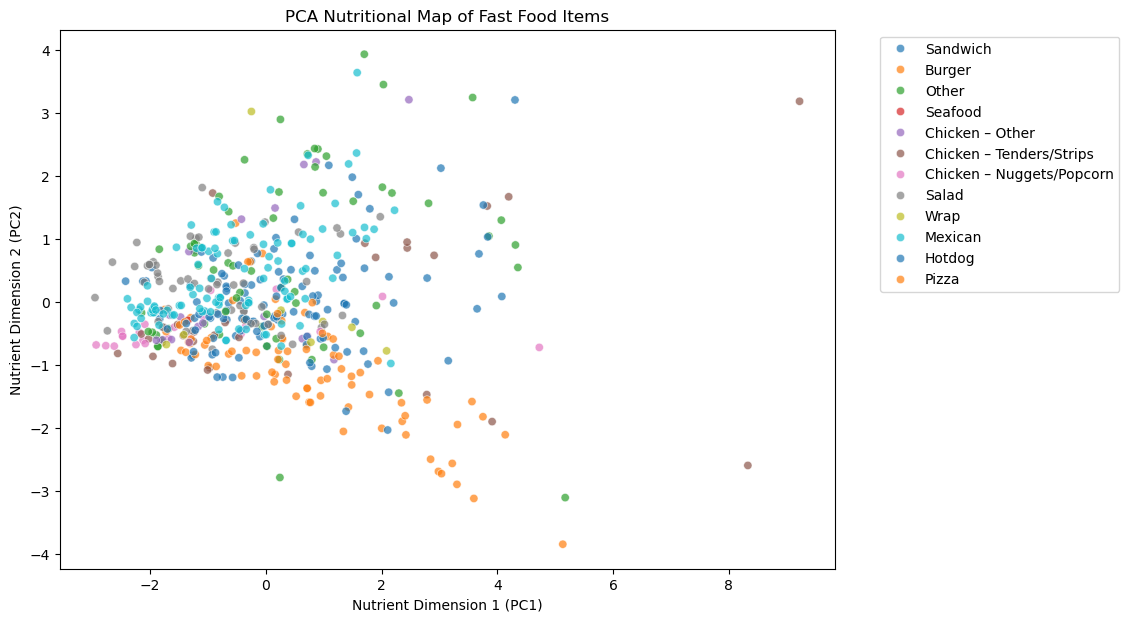

In [81]:
# I plotted a scatterplot of PCA results
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df,
    x='PC1', y='PC2',
    hue='food_category',
    palette='tab10',
    alpha=0.7
)

plt.title("PCA Nutritional Map of Fast Food Items")
plt.xlabel("Nutrient Dimension 1 (PC1)")
plt.ylabel("Nutrient Dimension 2 (PC2)")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

# Why: Each dot = one food item, placed according to its nutrient profile.
# Categories that group together (clusters) share similar nutrient issues.

---

### Interpretationcof PCA Nutritional Map  

---

This PCA scatterplot shows how different fast food items cluster together in a **nutrient space**:  
- Each dot = one menu item.  
- Position is based on multiple nutrients (calories, sodium, saturated fat, sugar, fiber), reduced into two main dimensions (PC1 and PC2).  
- Colors represent food categories.  

---

#### Key Observations:
- **Burgers & Pizza (orange and brown dots)**  
  - Spread far to the right and lower regions → associated with **high calories, saturated fat, and sodium**.  
  - These are the major “calorie + fat bombs.”  

- **Chicken Strips/Tenders (dark pink) & Wraps (green)**  
  - Extend outward into high sodium zones.  
  - These categories cluster as **salty, processed, calorie-heavy foods**.  

- **Salads (light green) & Seafood (purple)**  
  - Dots are tighter and clustered toward the middle/upper part of the distribution → closer to “balanced” foods with **fewer red flags**.  
  - Generally safer relative to burgers or pizza.  

- **Nuggets/Hotdogs (pink/blue dots)**  
  - Cluster closer to the center, meaning more **moderate nutrient profiles**.  
  - Portion-size control plays a role in keeping these foods mostly Yellow or Green in risk classification.  

- **Dessert/Other (grey dots)**  
  - Spread across but some cluster separately, likely reflecting **sugar-heavy items**, distinct from savory categories.  

---

Overall Meaning:
- PCA reveals **nutritional “clusters”**:  
  - Red: **Pizza & Burgers → Calorie + Fat Hotspots**  
  - Red: **Strips/Wraps → Sodium + Calorie Traps**  
  - Green: **Seafood/Salads → Healthier cluster**  
- The map confirms that **fast food risks aren’t random**, food categories fall into recognizable “nutrient danger zones.”  

---

**Consumer Takeaway:**  
Choose from clusters near the center (grilled chicken, salads, seafood) for balance,  
and treat items on the outer right/lower edges (pizza, burgers, strips) as **occasional indulgences** due to multiple nutrient overloads. 

---

---

### CONCLUSION AND DIETARY RECOMMENDATIONS

---

Key Findings from the Analysis
1. **Nutrient Benchmarking**  
   - On average, a single fast-food item already contributes 50% of daily sodium and ~40% of daily saturated fat needs.  
   - Calories are moderate per item (25-30% of daily needs), but since people rarely eat *just one item*, full meals (burger + fries + soda) can overshoot daily energy intake.  
   - Fiber is consistently under-supplied, confirming fast food is calorie-rich but nutrient-poor.  

2. **Restaurant-Level Risks**  
   - Sodium and saturated fat are the most consistent red flags across chains.  
   - Some restaurants (e.g., Chick-Fil-A, Subway) overall offer more "Green" choices, while burger-heavy chains (e.g., Burger King, McDonald’s, Sonic) lean towards "Yellow" and "Red."  
   - No chain is “safe” — each carries risk categories, but proportions vary.  

3. **Category-Level Risks**  
   - **Pizza & Burgers**: Nutrient bombs, dominated by high calories, saturated fat, and sodium.  
   - **Chicken Strips/Tenders**: High sodium + calorie risk among the saltiest categories.  
   - **Wraps & Sandwiches**: Often marketed as "healthy," but many fall into Yellow/Red due to calorie-dense fillings and salty sauces.  
   - **Salads & Seafood**: Mostly Safe but salads can turn yellow if loaded with cheese/dressings. Seafood (when grilled) is one of the best-balanced options.  

4. **Traffic Light Classification (Consumer-Friendly View)**  
   - **Safe (Green):** 65% of items.  
   - **Moderate (Yellow):** 25% of items (borderline on one nutrient).  
   - **High Risk (Red):** 10% of items (multiple nutrients exceeded).  
   - While most items are technically “Green,” portion sizes + meal combos push many choices into risk territory.  

5. **Multivariate PCA View**  
   - Clear clusters emerge:  
     - **Pizza & Burgers: “Calorie & Fat Bomb Zone.”**  
     - **Chicken Strips/Wraps : “Sodium Bomb Zone.”**  
     - **Desserts/Drinks : “Sugar Cluster.”**  
     - **Salads & Seafood : Balanced/Safe cluster.**  
   - Confirms risk is category-driven, not random, and visually maps **nutritional danger zones.**  

---

### RECOMMENDATIONS FOR CONSUMERS
- **Limit high-risk food categories**: (Pizza, Burgers, Fried Chicken Strips).  
- **Don’t be fooled by “health halos”**: Wraps and sandwiches can be as risky as burgers.  
- **Choose safer options**: grilled chicken, seafood, and salads (with light dressing).  
- **Watch portion sizes**: even “safe” choices can move into Yellow or Red when paired with fries, soda, and sauces.  
- **Add fiber-rich sides** at home (fruit, vegetables, whole grains) → balance out the fiber gap in fast food meals.  

---

###  PUBLIC HEALTH TAKEAWAY 
Fast food isn’t automatically “bad,” but the **nutritional risks pile up very quickly**:  
- Sodium and saturated fat overshoot risks dominate.  
- Calories are often underestimated because meals usually stack multiple items.  
- Safer menu items do exist but can be overshadowed by portion size and add-ons.  

**Message to Consumers:**  
Eat fast food **occasionally, not daily**. When you do, lean on Green items and customize (grilled instead of fried, go light on sauces, water instead of soda).  
Moderation + smart swaps can make a big difference.  

**Message to Policymakers/Restaurants:**  
Menu transparency and reformulation (less salt, healthier fats, more fiber) can significantly improve public health outcomes. Clear traffic-light labeling systems could empower customers to make healthier choices at the point of purchase.  